# Impact of Store Layout on Sales Performance

**Goal :**  
    The objective of this project is to evaluate the impact of a new store layout on sales performance in selected retail stores. This involves selecting appropriate control stores based on pre-trial performance metrics, comparing key performance indicators (KPIs) between trial and control stores during the trial period, and using statistical methods to determine if the new layout leads to significant improvements in sales, customer count, and transaction frequency. Additionally we aim to provide a data-driven recommendation on whether the new layout should be implemented across all stores.

## **About Dataset:**  
This dataset is provided by Quantium as part of the Forage data analytics simulation. It includes transaction and customer data from a retail store, capturing information about product sales, dates, and customer interactions. The datasets are structured to help analyze sales trends and customer behavior.
Key features corresponding to our current analysis include:
* Transaction ID: Unique identifier for each transaction
* Transaction Date: The date on which the transaction occurred.
* Sales Amount: The total sales value for each transaction.
* Store Number: Unique identifier for each Store.

## Importing Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

## Importing Dataset

In [2]:
file_path='C:/Users/obalabi adepoju/Downloads/QVI_data.csv'
df=pd.read_csv(file_path)

Now let's begin, shall we?

## Data Inspection and Cleaning

We'll first take a look at first 10 records in our dataset then a general description of each column in the data.

In [3]:
df.head(10)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget
7,1007,2018-12-05,1,8,10,RRD SR Slow Rst Pork Belly 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Budget
8,1009,2018-11-20,1,9,20,Doritos Cheese Supreme 330g,1,5.7,330,DORITOS,NEW FAMILIES,Premium
9,1010,2018-09-09,1,10,51,Doritos Mexicana 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Mainstream


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
print("This dataset curently has 264,834 records with 10 columns and no null values")

This dataset curently has 264,834 records with 10 columns and no null values


In [6]:
# We'll first of all rename some of our columns for easier referencing
df.rename(columns={'LYLTY_CARD_NBR':'CARD_NBR','LIFESTAGE':'STAGE','PREMIUM_CUSTOMER':'CUSTOMER'},inplace=True)

We saw earlier that our date column is of an object data type so let's change that

In [7]:
df['DATE'] = pd.to_datetime(df.DATE)

In [8]:
df['DATE']

0        2018-10-17
1        2018-09-16
2        2019-03-07
3        2019-03-08
4        2018-11-02
            ...    
264829   2018-12-08
264830   2018-10-01
264831   2018-10-24
264832   2018-10-27
264833   2018-12-14
Name: DATE, Length: 264834, dtype: datetime64[ns]

Let's determine the timeframe of our dataset, we need to identify the range of dates covered by the data. Specifically, we want to find the earliest and latest dates in the dataset to understand the period it spans.

In [9]:
print(f"Range : {df.DATE.min()} --- {df.DATE.max()}")

Range : 2018-07-01 00:00:00 --- 2019-06-30 00:00:00


This dataset contains information about customer transactions from the 1st of July, 2018 to the 30th of June, 2019.  
We'll take a look at total number of transactions that occured over this time frame.

In [10]:
tran=df.groupby('DATE').agg(Total=('DATE','count')).reset_index()

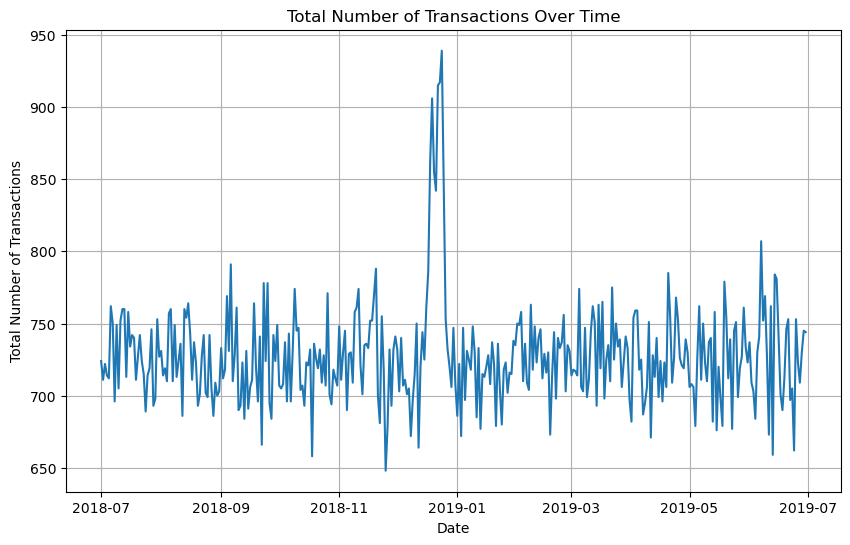

In [11]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(tran['DATE'], tran['Total'], linestyle='-')

# Adding titles and labels
plt.title('Total Number of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Total Number of Transactions')
plt.grid(True)

# Show plot
plt.show()


It’s notable that there is a significant increase in purchases towards the end of 2018. This surge is commonly associated with the festive season, which typically drives a positive influence on sales.

In [12]:
''' We're only focusing on chips as requested by our category manager so we'll be checking to see if there are any non chip 
brands in our data '''
df['BRAND'].unique()

array(['NATURAL', 'RRD', 'GRNWVES', 'WOOLWORTHS', 'CHEETOS', 'INFUZIONS',
       'DORITOS', 'OLD', 'SMITHS', 'KETTLE', 'CCS', 'TOSTITOS', 'COBS',
       'BURGER', 'THINS', 'TYRRELLS', 'CHEEZELS', 'TWISTIES', 'SUNBITES',
       'PRINGLES', 'FRENCH'], dtype=object)

We've confirmed every brand in our data produces chips so we'll carry on with our inspection.

## Selecting Control Stores

We've identified the trial stores as stores 77, 86, and 88. The next phase of our project involves selecting control stores for each of these trial stores. The control store selection will be based on metrics determined before the trial period, which occurred from March 2019 to June 2019.

### Objectives

1. **Evaluate Metrics**: Determine and evaluate the metrics used for selecting control stores to ensure they accurately reflect the performance of the trial stores before the trial period.
2. **Identify Control Stores**: Select control stores that closely match the trial stores based on key performance metrics.

### Pre Trial Period

- **Start Date**: July 2018
- **End Date**: Feb 2019

By focusing on this timeframe, we can accurately select our control-trial store pairs.


The metrics we'll be looking at include:
*    Total sales revenue
*    Total number of customers

In [43]:
# We'll add a new column to our data which consists of the year-month of each transaction
df['YMONTH'] = df['DATE'].dt.to_period('M')
df

,CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,STAGE,CUSTOMER,YMONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,2018-12
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,2018-10
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,2018-10
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,2018-10


Next we want to look at the total sales and number of customers for each store up to february 2019 and we'll achieve this using the following lines of code.

In [24]:
data = df[(df.STORE_NBR.isin([77,86,88])) & (df.YMONTH < '2019-03' )]
data1 =  df[(~df.STORE_NBR.isin([77,86,88])) & (df.YMONTH < '2019-03' )]

In [36]:
# To calculate total sales for each store on a monthly basis
store1 = data1.groupby(['STORE_NBR','YMONTH']).agg(Total=('TOT_SALES','sum')).reset_index()

# To calculate number of customers for each store on a monthly basis
store2 = data1.groupby(['STORE_NBR','YMONTH']).agg(Total=('CARD_NBR','nunique')).reset_index()

In [37]:
#Pivoting our data so it can be loaded into our function for further calculations

store1 = store1.pivot_table(index='YMONTH', columns='STORE_NBR', values='Total', fill_value=0).reset_index()

store2 = store2.pivot_table(index='YMONTH', columns='STORE_NBR', values='Total', fill_value=0).reset_index()

In [38]:
# A general overview of what our data looks like, it's a bit ugly but it's necessary
store1

STORE_NBR,YMONTH,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2018-07,206.9,150.8,1205.70,1399.9,812.0,260.0,1024.7,381.6,289.7,...,38.7,232.6,247.8,127.3,6.2,224.00,982.0,962.80,956.6,433.10
1,2018-08,176.1,193.8,1079.75,1259.5,745.1,203.2,1119.9,383.0,327.5,...,28.0,203.3,227.1,154.5,24.9,322.65,835.1,1003.75,683.9,372.85
2,2018-09,278.8,154.4,1021.50,1198.6,896.0,207.7,1147.3,293.0,369.7,...,21.8,199.5,133.5,139.0,23.3,174.40,886.0,845.40,798.4,304.70
3,2018-10,188.1,167.8,1037.90,1346.4,798.0,292.4,1063.9,422.8,361.0,...,36.6,170.0,162.9,170.4,14.4,237.60,1078.4,816.40,790.0,430.60
4,2018-11,192.6,162.9,1008.00,1212.0,771.4,255.3,1076.5,349.2,374.4,...,15.8,184.5,282.8,144.2,40.3,225.40,967.2,965.00,886.4,376.20
5,2018-12,189.6,136.0,1121.60,1185.6,879.2,209.1,906.1,356.4,382.6,...,24.6,288.5,205.3,157.8,15.4,207.30,935.4,1038.00,807.4,403.90
6,2019-01,154.8,162.8,1051.70,1525.0,838.0,191.1,975.1,445.0,399.4,...,21.3,247.3,176.7,148.7,34.4,157.70,980.4,1066.60,842.4,423.00
7,2019-02,225.4,139.4,1197.70,883.4,727.0,224.0,1026.4,345.4,259.4,...,37.4,175.2,212.7,119.7,23.0,165.00,955.2,868.40,746.2,395.50


In [39]:
store2

STORE_NBR,YMONTH,1,2,3,4,5,6,7,8,9,...,263,264,265,266,267,268,269,270,271,272
0,2018-07,49,39,112,128,93,48,100,40,46,...,9,53,51,31,2,48,103,96,96,48
1,2018-08,42,39,112,123,97,44,109,46,52,...,6,40,51,37,5,50,109,122,84,44
2,2018-09,59,36,102,119,101,38,111,36,55,...,4,45,30,36,5,31,100,101,91,32
3,2018-10,44,41,104,123,88,52,108,45,55,...,8,38,37,38,4,47,111,96,93,44
4,2018-11,46,39,101,118,85,50,111,39,61,...,2,35,58,36,9,49,106,101,98,41
5,2018-12,42,35,111,104,95,38,95,36,58,...,6,55,46,43,5,42,107,101,98,47
6,2019-01,35,43,102,134,92,35,102,47,65,...,5,48,33,44,9,37,110,117,92,46
7,2019-02,52,29,116,91,87,40,98,37,43,...,6,42,41,34,5,36,103,94,86,45


Now we want to perform this same process for our trial store

In [40]:
# To calculate total sales for each store on a monthly basis
trial1 = data.groupby(['STORE_NBR','YMONTH']).agg(Total=('TOT_SALES','sum')).reset_index()

# To calculate number of customers for each store on a monthly basis
trial2 = data.groupby(['STORE_NBR','YMONTH']).agg(Total=('CARD_NBR','nunique')).reset_index()

#Pivoting our data so it can be loaded into our function for further calculations

trial1 = trial1.pivot_table(index='YMONTH', columns='STORE_NBR', values='Total', fill_value=0).reset_index()

trial2 = trial2.pivot_table(index='YMONTH', columns='STORE_NBR', values='Total', fill_value=0).reset_index()

In [41]:
trial1

STORE_NBR,YMONTH,77,86,88
0,2018-07,296.8,892.20,1310.0
1,2018-08,255.5,764.05,1323.8
2,2018-09,225.2,914.60,1423.0
3,2018-10,204.5,948.40,1352.4
4,2018-11,245.3,918.00,1382.8
5,2018-12,267.3,841.20,1325.2
6,2019-01,204.4,841.40,1266.4
7,2019-02,235.0,913.20,1370.2


In [48]:
trial2

STORE_NBR,YMONTH,77,86,88
0,2018-07,51,99,129
1,2018-08,47,94,131
2,2018-09,42,103,124
3,2018-10,37,109,123
4,2018-11,41,100,130
5,2018-12,46,98,126
6,2019-01,35,94,117
7,2019-02,45,107,124


### Creating Our Selection Function

In [108]:

def selectControl(store1, store2, trial1, trial2, num):
    correlations = {}
    
    for store in store1:
        # Calculate correlations
        sales_corr = store1[store].corr(trial1[num])
        customer_corr = store2[store].corr(trial2[num])
        
        # Average correlation
        avg_corr = (sales_corr + customer_corr) / 2
        
        # Calculate distances
        sales_dist = np.linalg.norm(store1[store] - trial1[num])
        customer_dist = np.linalg.norm(store2[store] - trial2[num])
        
        # Average distance
        avg_dist = (sales_dist + customer_dist) / 2
        
        # Combine scores
        # Using inverse distance to ensure higher scores for closer matches
        combined_score = avg_corr / (1 + avg_dist)
        
        # Store the combined score
        correlations[store] = combined_score
    
    # Select the store with the highest combined score
    control_store = max(correlations, key=correlations.get)
    
    return control_store
        
        

In [199]:
#Let's find the control store for trial store 77
print(selectControl(store1,store2,trial1,trial2,77))

233


* **We'll be plotting a line chart to visualize the trend of total sales for store 77 and 233 to determine if our selection of control store is accurate.**

### Creating our Visualization Functions

In [112]:
def vizTotalSale(num1,num2):

    stores_of_interest = [num1, num2]
    sub = df[(df['STORE_NBR'].isin(stores_of_interest)) & (df.DATE < '2019-03-01')]

    # Aggregate data by Year-Month for each store
    monthly_sales = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('TOT_SALES', 'sum')).reset_index()

    # Convert Year-Month to datetime for plotting
    monthly_sales['YMONTH'] = monthly_sales['YMONTH'].dt.to_timestamp()
    
    palette = {num1: 'blue', num2: 'red'}

    # Plotting
    plt.figure(figsize=(14, 7))

    # Plot the sales data for each store
    sns.lineplot(data=monthly_sales, x='YMONTH', y='Total', hue='STORE_NBR',marker='o',palette=palette)

    # Customize plot
    plt.title('Trial Store vs Control Store (Total Sales)')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Store Number')
    plt.tight_layout()

    # Show the plot
    plt.show()

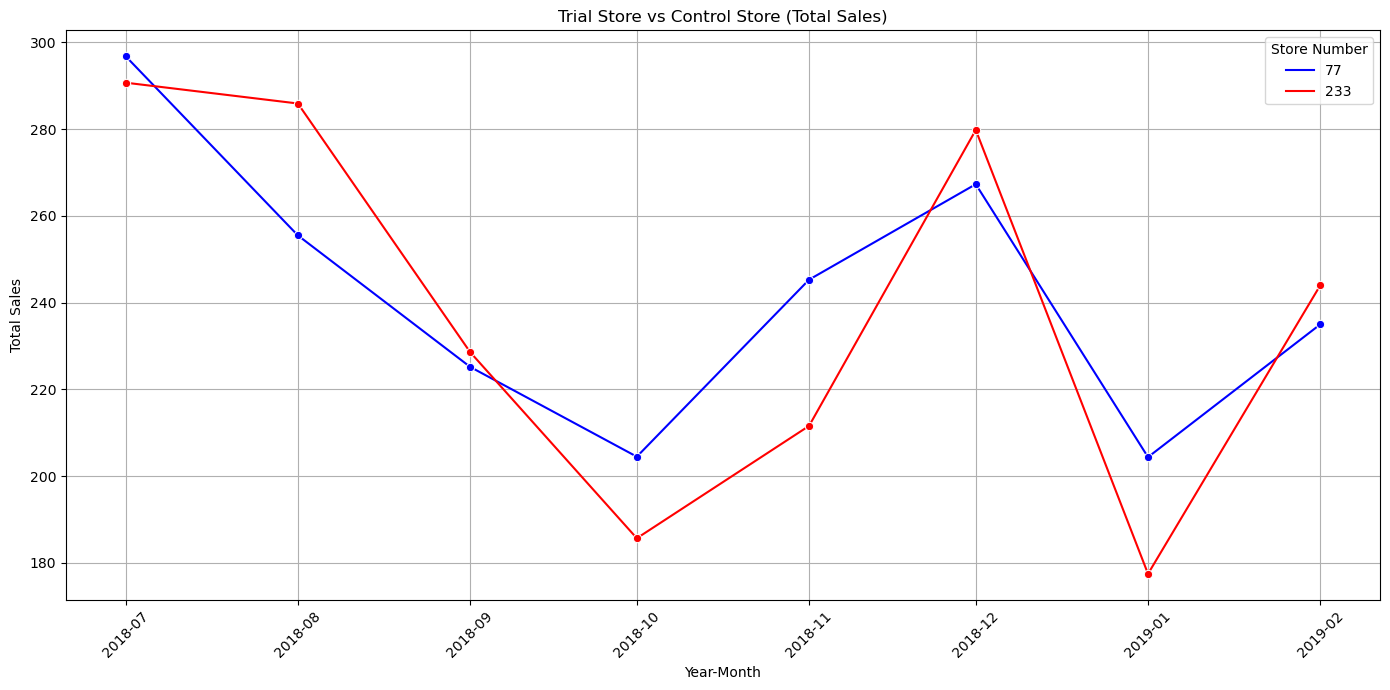

In [119]:
vizTotalSale(77,233)

We see that the trends of both stores over the course of 8 months with respect to total sales is quite similar with one store having their sales rise as the other one follows suit and vice versa.  
  
Next we want to check if this is the same occurence with respect to number of customers. 

In [114]:
def vizNumber(num1,num2):
    
    stores_of_interest = [num1, num2]
    sub = df[(df['STORE_NBR'].isin(stores_of_interest)) & (df.DATE < '2019-03-01')]

    # Aggregate data by Year-Month for each store
    monthly_sales = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('CARD_NBR', 'nunique')).reset_index()

    # Convert Year-Month to datetime for plotting
    monthly_sales['YMONTH'] = monthly_sales['YMONTH'].dt.to_timestamp()
    
    palette = {num1: 'green', num2: 'purple'}

    # Plotting
    plt.figure(figsize=(14, 7))

    # Plot the sales data for each store
    sns.lineplot(data=monthly_sales, x='YMONTH', y='Total', hue='STORE_NBR',marker='o',palette=palette)

    # Customize plot
    plt.title('Trial Store vs Control Store (No of Customers)')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Customers')
    plt.grid(True)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABW4AAAKyCAYAAABFb0fEAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMiwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8pXeV/AAAACXBIWXMAAA9hAAAPYQGoP6dpAAEAAElEQVR4nOzddXzV5f//8cc562Kjx4jR3Z2ju1NSSkQlVExUUhQFRASkW1K6u5sRAwQkpDvHYL2d9+8Pf+z7mQwYcLazwfN+u+2m5/2+4nW9z7UxXlznukyGYRiIiIiIiIiIiIiISJJhtnUAIiIiIiIiIiIiIhKbErciIiIiIiIiIiIiSYwStyIiIiIiIiIiIiJJjBK3IiIiIiIiIiIiIkmMErciIiIiIiIiIiIiSYwStyIiIiIiIiIiIiJJjBK3IiIiIiIiIiIiIkmMErciIiIiIiIiIiIiSYwStyIiIiIiIiIiIiJJjBK3IiIi8kpMJlO8vrZt2xZn/SpVqlClSpVX6ju+dSMjI5k4cSKlSpUiVapUuLq64uvrS+PGjVm6dGlMuevXrzNw4EACAgJeKZ43wc6dO2nVqhUZM2bE0dERT09Pypcvz/jx4wkODk6wfk+ePMnAgQO5ePFigrRvMpkYOHDgC8vdu3ePvn37kj9/ftzc3PD09CRv3rx06NCBY8eOxZTbs2cPAwcOJDAwMEHitYbq1avzwQcfxLzetm1bzPfj3r17nyrfqVMn3N3dEzPEGJs3b6ZkyZK4ublhMplYtmzZc8vfunWLr7/+mkKFCuHu7o6zszO5cuXi448/5uzZswkSY0LP0aRk6tSpZMyYMUG/50VERCT+7G0dgIiIiCRP/00Aff/992zdupUtW7bEup4/f/44648bNy7BYnuiQ4cOLFmyhE8++YRBgwbh5OTE+fPnWbduHevXr6dp06bAv4nbQYMGkTVrVooWLZrgcSU1AwYMYPDgwZQvX57vv/+eHDlyEBISEpOkPHPmDL/++muC9H3y5EkGDRpElSpVyJo1a4L08SKPHz+mbNmyPH78mC+++IIiRYoQGhrKmTNnWLJkCQEBARQuXBj4N3E7aNAgOnXqhJeXl03ifZ7ly5eze/duZs2aFef9L7/8kp07dyZyVHEzDINWrVqRO3duVqxYgZubG3ny5Hlm+QMHDtCgQQMMw6Bnz56UK1cOR0dHTp8+zezZsyldujQPHjywepxJYY4mlo4dO/Lzzz8zbNgwBg0aZOtwRERE3npK3IqIiMgrKVu2bKzXadOmxWw2P3X9v0JCQnB1dX1mQtdaLly4wIIFC+jfv3+sBET16tXp1q0bFoslQfuH/xtrUrZw4UIGDx5M165dmTx5MiaTKeZe3bp1+fLLL+NcpWkrCfFMFy5cyLlz59iyZQtVq1aNda9Pnz7Jaq78+OOPNG3alIwZMz51r06dOqxbt46VK1fSsGHD1+7rdV2/fp379+/TtGlTqlev/tyyQUFBNG7cGGdnZ/bs2UOmTJli7lWpUoXu3buzaNGihA45WYqOjiYqKgonJ6cXlrW3t6d79+58//33fPXVV0n+55eIiMibTlsliIiISIKpUqUKBQsWZMeOHZQvXx5XV1e6dOkSc++/2x0MGjSIMmXKkCpVKlKkSEHx4sWZOnUqhmG8dN/37t0DIEOGDHHeN5v//TVo27ZtlCpVCoDOnTvHfKT8fz9ev2LFCsqVK4erqyseHh7UrFnzqWTmwIEDMZlMHD58mBYtWpAyZUpy5MgB/LuycNy4cRQtWhQXFxdSpkxJixYtOH/+/HPHsGzZMkwmE5s3b37q3vjx4zGZTDEf4z9//jytW7fGx8cHJycn0qdPT/Xq1V+4/cPgwYNJmTIlo0ePjpW0fcLDw4NatWrFvA4LC6Nv375ky5YNR0dHMmbMSI8ePZ7aOiBr1qw0aNCAdevWUbx4cVxcXMibNy/Tpk2LKTNjxgxatmwJQNWqVWOe/YwZM4Dnz5/Lly/Tvn170qVLh5OTE/ny5eOXX355pSRrfOfKwIED+eKLLwDIli3bU9uBWCwWhg0bRt68eXFyciJdunS8++67XL16NVZ7zxtXUFAQn3/+eazn+8knn8Tro+tHjhzhwIEDdOjQIc77nTp1In/+/PTt25fo6OjnthXfsTzLrl27qF69Oh4eHri6ulK+fHlWr14dc3/gwIExydevvvoKk8n03NWskydP5ubNmwwbNixW0vZ/tWjRIub/n7WdSqdOnZ7qZ/z48RQpUgR3d3c8PDzImzcv33zzDfDiOQowbdo0ihQpgrOzM6lSpaJp06acOnXqqX7d3d35+++/qV27Nm5ubmTIkIGffvoJgH379lGxYkXc3NzInTs3M2fOfCr2mzdv0r17dzJlyoSjoyPZsmVj0KBBREVFxZS5ePEiJpOJYcOGMWTIELJly4aTkxNbt27FYrEwZMgQ8uTJg4uLC15eXhQuXJjffvstVj/t2rUjKCiI+fPnx/mcRUREJBEZIiIiIlbQsWNHw83NLda1ypUrG6lSpTIyZ85sjBkzxti6dauxffv2mHuVK1eOVb5Tp07G1KlTjY0bNxobN240vv/+e8PFxcUYNGjQU+3+t+5/PX782PDy8jK8vb2NiRMnGhcuXIiz3MOHD43p06cbgPHdd98Ze/fuNfbu3WtcuXLFMAzDmDNnjgEYtWrVMpYtW2YsWLDAKFGihOHo6Gjs3Lkzpp0BAwYYgOHr62t89dVXxsaNG41ly5YZhmEY3bp1MxwcHIzPPvvMWLdunTF37lwjb968Rvr06Y2bN28+cwyRkZFGunTpjHbt2j11r3Tp0kbx4sVjXufJk8fImTOn8ccffxjbt283Fi9ebHz22WfG1q1bn9n+9evXDcB45513nvcoY1gsFqN27dqGvb290a9fP2PDhg3GiBEjDDc3N6NYsWJGWFhYTFlfX18jU6ZMRv78+Y1Zs2YZ69evN1q2bGkAMXPg9u3bxo8//mgAxu+//x7z7G/fvm0YxrPnz+3bt42MGTMaadOmNSZMmGCsW7fO6NmzpwEYH374YayYAWPAgAHPHdeuXbsMwChVqpSxdOlS4+7du3GWu3LlitGrVy8DMJYsWRIT78OHDw3DMIz333/fAIyePXsa69atMyZMmGCkTZvWyJw5s3Hnzp2Ydp41ruDgYKNo0aJGmjRpjJEjRxqbNm0yfvvtN8PT09OoVq2aYbFYnjuOwYMHG3Z2dsajR49iXd+6dasBGAsXLjSWL19uAMbUqVNj7sf1vRvfscRl27ZthoODg1GiRAljwYIFxrJly4xatWoZJpPJmD9/fsyzXLJkiQEYvXr1Mvbu3WscPnz4mW3WqlXLsLOzMx4/fvzcvp941s+Ijh07Gr6+vjGv582bFxPDhg0bjE2bNhkTJkwwevfubRjGi+fok3tt2rQxVq9ebcyaNcvInj274enpaZw5cyZWv46Ojka+fPmM3377zdi4caPRuXNnAzD69u1r5M6d25g6daqxfv16o0GDBgZgHDx4MKb+jRs3jMyZMxu+vr7GxIkTjU2bNhnff/+94eTkZHTq1Cmm3IULFwzAyJgxo1G1alVj0aJFxoYNG4wLFy4YQ4cONezs7IwBAwYYmzdvNtatW2eMGjXKGDhw4FPPKV++fEazZs3i9axFREQk4ShxKyIiIlbxrMQtYGzevPmp8i9KvkZHRxuRkZHG4MGDjdSpU8dKWsUncWsYhrF69WojTZo0BmAARurUqY2WLVsaK1asiFXO39/fAIzp06c/FYOPj49RqFAhIzo6Oub6o0ePjHTp0hnly5ePufYkcdu/f/9Ybezdu9cAjF9++SXW9StXrhguLi7Gl19++dwx9OnTx3BxcTECAwNjrp08edIAjDFjxhiGYRh37941AGPUqFEvfCb/a9++fQZgfP311/Eqv27dOgMwhg0bFuv6ggULDMCYNGlSzDVfX1/D2dnZuHTpUsy10NBQI1WqVEb37t1jri1cuNAA4kwwP2v+fP311wZg7N+/P9b1Dz/80DCZTMbp06djrsUncWsY/yY9HR0dY+ZKtmzZjA8++MA4evRorHLDhw83gKf+IeDUqVMGYHz00Uexru/fv98AjG+++eaF4xo6dKhhNpsNf3//WNcXLVpkAMaaNWueO4a6desaefPmfer6/yZuDcMwKlasaGTKlMkIDQ01DOPp792XGUtcypYta6RLly5WAjkqKsooWLCgkSlTppjv5SdJxuHDhz+3PcMwjLx58xre3t4vLPdEfBO3PXv2NLy8vJ7b1rPm6IMHDwwXFxejXr16sa5fvnzZcHJyMtq2bRurX8BYvHhxzLXIyEgjbdq0BhAraX3v3j3Dzs7O6NOnT8y17t27G+7u7rG+nwzDMEaMGGEAxokTJwzD+L9nmiNHDiMiIiJW2QYNGhhFixZ97lifaNeunZE+ffp4lRUREZGEo60SREREJEGlTJmSatWqxavsli1bqFGjBp6entjZ2eHg4ED//v25d+8et2/ffum+69Wrx+XLl1m6dCmff/45BQoUYNmyZTRq1IiePXu+sP7p06e5fv06HTp0iPm4PIC7uzvNmzdn3759hISExKrTvHnzWK9XrVqFyWSiffv2REVFxXx5e3tTpEiRmI/ZP0uXLl0IDQ1lwYIFMdemT5+Ok5MTbdu2BSBVqlTkyJGD4cOHM3LkSI4cOZIg+7I+OXiuU6dOsa63bNkSNze3p7Z0KFq0KFmyZIl57ezsTO7cubl06VK8+4xr/mzZsoX8+fNTunTpWNc7deqEYRhPHZAXH/369ePy5ctMmzaN7t274+7uzoQJEyhRogTz5s17Yf2tW7fGxPC/SpcuTb58+Z56NnGNa9WqVRQsWJCiRYvGmiu1a9eOtSXDs1y/fp106dK9MNaff/6Zq1evPvUR+Vcdy/8KDg5m//79tGjRAnd395jrdnZ2dOjQgatXr3L69OkXxphYSpcuTWBgIG3atGH58uXcvXs33nX37t1LaGjoU88pc+bMVKtW7annZDKZqFevXsxre3t7cubMSYYMGShWrFjM9VSpUpEuXbpY3yerVq2iatWq+Pj4xJobdevWBWD79u2x+mrUqBEODg5PjfXo0aN89NFHrF+/nqCgoGeOLV26dNy+fTvWNgwiIiKS+JS4FRERkQT1rH1D/+vAgQMxe6lOnjyZ3bt34+/vz7fffgtAaGjoK/Xv4uJCkyZNGD58ONu3b+fcuXPkz5+f33//nRMnTjy37vP2PvXx8cFisTx1iv1/y966dQvDMEifPj0ODg6xvvbt2/fCRFGBAgUoVaoU06dPB/49aGj27Nk0btyYVKlSAcTsg1u7dm2GDRtG8eLFSZs2Lb179+bRo0fPbPtJUvXChQvPjeGJe/fuYW9vT9q0aWNdN5lMeHt7xzyvJ1KnTv1UG05OTi/1Xsb17O/du/fM9+TJ/VeRPn16OnfuzIQJEzh27Bjbt2/H0dGRjz/++IV1XzRX/htTXOVu3brFsWPHnponHh4eGIbxwrkSGhqKs7PzC2MtX748TZo04aeffnpq/r7KWP7XgwcPMAzD6u9PlixZuHPnTrz2+n0ZHTp0YNq0aVy6dInmzZuTLl06ypQpw8aNG19Y92Wfk6ur61Pvj6OjY8z38X+vh4WFxby+desWK1eufGpuFChQAOCpuRFXTH379mXEiBHs27ePunXrkjp1aqpXr87BgwefKuvs7IxhGLFiEBERkcRnb+sARERE5M0W14FXcZk/fz4ODg6sWrUqVnJj2bJlVo0nS5YsvP/++3zyySecOHEiJvERlyeJxxs3bjx17/r165jNZlKmTBnr+n/HmyZNGkwmEzt37ozzVPf4nPTeuXNnPvroI06dOsX58+e5ceMGnTt3jlXG19eXqVOnAnDmzBn+/PNPBg4cSEREBBMmTIiz3QwZMlCoUCE2bNhASEjIC0+QT506NVFRUdy5cydW8tYwDG7evBlzyJs1xTV/UqdO/cz3BP595tbg5+dHrVq1WLZsGbdv337uatb/nSv/PTzr+vXrT8UU17jSpEmDi4tLrAPc/nv/edKkScP9+/efW+aJoUOHUrBgQX788cen7r3sWP5XypQpMZvNVn9/ateuzYYNG1i5ciWtW7d+YXlnZ2cePnz41PW4kt+dO3emc+fOBAcHs2PHDgYMGECDBg04c+YMvr6+z+zjRT8frDUP4d9nVrhwYX744Yc47z9Jij8R1/yyt7enT58+9OnTh8DAQDZt2sQ333xD7dq1uXLlSqzv//v37+Pk5BRr1bSIiIgkPq24FRERkSTBZDJhb2+PnZ1dzLXQ0FD++OOPV2rv0aNHPH78OM57T058f5LseJI8/e9K0Dx58pAxY0bmzp2LYRgx14ODg1m8eDHlypV7YbKzQYMGGIbBtWvXKFmy5FNfhQoVeuFY2rRpg7OzMzNmzGDGjBlkzJgxZnVyXHLnzs13331HoUKFOHz48HPb7tevHw8ePKB3796xxvjE48eP2bBhAwDVq1cHYPbs2bHKLF68mODg4Jj7L+NZz/55qlevzsmTJ58a26xZszCZTFStWvWlYrh161acW0tER0dz9uxZXF1d8fLyem68T7Y9+O+z8ff359SpU/F6Ng0aNOCff/4hderUcc6VrFmzPrd+3rx5OX/+/Av7eVK2S5cujBkzhsuXL1ttLG5ubpQpU4YlS5bEekYWi4XZs2eTKVMmcufOHa8Y/1fXrl3x9vbmyy+/5Nq1a3GWWbJkScz/Z82alTNnzhAeHh5z7d69e+zZs+e5sdetW5dvv/2WiIiImBX5z3rPy5Urh4uLy1PP6erVq2zZsuWVvh+epUGDBvz111/kyJEjzrnx38Tti3h5edGiRQt69OjB/fv3uXjxYqz758+fJ3/+/FaLX0RERF6NVtyKiIhIklC/fn1GjhxJ27Ztef/997l37x4jRoyI14rUuJw+fZratWvTunVrKleuTIYMGXjw4AGrV69m0qRJVKlShfLlywOQI0cOXFxcmDNnDvny5cPd3R0fHx98fHwYNmwY7dq1o0GDBnTv3p3w8HCGDx9OYGAgP/300wvjqFChAu+//z6dO3fm4MGD+Pn54ebmxo0bN9i1axeFChXiww8/fG4bXl5eNG3alBkzZhAYGMjnn38ea8/dY8eO0bNnT1q2bEmuXLlwdHRky5YtHDt2jK+//vq5bbds2ZJ+/frx/fff8/fff9O1a1dy5MhBSEgI+/fvZ+LEibzzzjvUqlWLmjVrUrt2bb766iuCgoKoUKECx44dY8CAARQrVowOHTrE452JrWDBggBMmjQJDw8PnJ2dyZYtW5zbLDzx6aefMmvWLOrXr8/gwYPx9fVl9erVjBs3jg8//PClE4N//PEHEydOpG3btpQqVQpPT0+uXr3KlClTOHHiBP3798fR0REgJtH+22+/0bFjRxwcHMiTJw958uTh/fffZ8yYMZjNZurWrcvFixfp168fmTNn5tNPP31hHJ988gmLFy/Gz8+PTz/9lMKFC2OxWLh8+TIbNmzgs88+o0yZMs+sX6VKFaZNm8aZM2fi9QwGDhzInDlz2Lp1K25ubjHXX3csQ4cOpWbNmlStWpXPP/8cR0dHxo0bx19//cW8efPivQr/f3l6erJ8+XIaNGhAsWLF6NmzJ+XKlcPR0ZGzZ88ye/Zsjh49SrNmzYB/t0CYOHEi7du3p1u3bty7d49hw4aRIkWKWO1269YNFxcXKlSoQIYMGbh58yZDhw7F09MzZgX58+Zov379+Oabb3j33Xdp06YN9+7dY9CgQTg7OzNgwICXHuezDB48mI0bN1K+fHl69+5Nnjx5CAsL4+LFi6xZs4YJEyY8tTr6vxo2bEjBggUpWbIkadOm5dKlS4waNQpfX19y5coVU85isXDgwAG6du1qtfhFRETkFdnsWDQRERF5o/z3ZHrD+Pdk9wIFCsRZPq5T36dNm2bkyZPHcHJyMrJnz24MHTrUmDp1qgEYFy5ceG7d/3rw4IExZMgQo1q1akbGjBkNR0dHw83NzShatKgxZMgQIyQkJFb5efPmGXnz5jUcHBwMwBgwYEDMvWXLlhllypQxnJ2dDTc3N6N69erG7t27Y9UfMGCAARh37tyJM55p06YZZcqUMdzc3AwXFxcjR44cxrvvvmscPHjwueN4YsOGDQZgAMaZM2di3bt165bRqVMnI2/evIabm5vh7u5uFC5c2Pj111+NqKioeLW/fft2o0WLFkaGDBkMBwcHI0WKFEa5cuWM4cOHG0FBQTHlQkNDja+++srw9fU1HBwcjAwZMhgffvih8eDBg1jt+fr6GvXr13+qn7jeu1GjRhnZsmUz7OzsDMCYPn16TNlnzZ9Lly4Zbdu2NVKnTm04ODgYefLkMYYPH25ER0fHKvff9zIuJ0+eND777DOjZMmSRtq0aQ17e3sjZcqURuXKlY0//vjjqfJ9+/Y1fHx8DLPZbADG1q1bDcMwjOjoaOPnn382cufObTg4OBhp0qQx2rdvb1y5cuWpZ/CscT1+/Nj47rvvjDx58hiOjo6Gp6enUahQIePTTz81bt68+dxxPHz40HB3dzeGDRsW6/rWrVsNwFi4cOFTdb755hsDeOp7N75jeZadO3ca1apVi5nvZcuWNVauXBmrzIULFwzAGD58eLzaNAzDuHnzpvHVV18ZBQoUMFxdXQ0nJycjZ86cRvfu3Y3jx4/HKjtz5kwjX758hrOzs5E/f35jwYIFRseOHQ1fX99YZapWrWqkT5/ecHR0NHx8fIxWrVoZx44di9XWs+aoYRjGlClTjMKFC8e8X40bNzZOnDgRq35cPx8N49lzIa7vnzt37hi9e/c2smXLZjg4OBipUqUySpQoYXz77bfG48ePDcN4/jP95ZdfjPLlyxtp0qQxHB0djSxZshhdu3Y1Ll68GKvc5s2bDcA4dOjQU22IiIhI4jIZRhyfiRMRERERkWSnV69ebN68mRMnTrzSylaRDh06cP78eXbv3m3rUERERN56StyKiIiIiLwhbt26Re7cuZk6dSotWrSwdTiSzPzzzz/ky5ePLVu2ULFiRVuHIyIi8tbT4WQiIiIiIm+I9OnTM2fOnJc67E3kicuXLzN27FglbUVERJIIrbgVERERERERERERSWK04lZEREREREREREQkiVHiVkRERERERERERCSJUeJWREREREREREREJImxt3UACc1isXD9+nU8PDwwmUy2DkdERERERERERETeUoZh8OjRI3x8fDCbn7+m9o1P3F6/fp3MmTPbOgwRERERERERERERAK5cuUKmTJmeW+aNT9x6eHgA/z6MFClS2DiahBcZGcmGDRuoVasWDg4Otg5HJF40byW50ZyVpEzzU5IbzVlJyjQ/JbnRnJXk6G2bt0FBQWTOnDkmZ/k8b3zi9sn2CClSpHhrEreurq6kSJHirZjs8mbQvJXkRnNWkjLNT0luNGclKdP8lORGc1aSo7d13sZnS1cdTiYiIiIiIiIiIiKSxChxKyIiIiIiIiIiIpLEKHErIiIiIiIiIiIiksS88XvcioiIiIiIiIiIvCmio6OJjIy0dRhWExkZib29PWFhYURHR9s6nNfm4OCAnZ2dVdpS4lZERERERERERCSJMwyDmzdvEhgYaOtQrMowDLy9vbly5Uq8DuxKDry8vPD29n7t8ShxKyIiIiIiIiIiksQ9SdqmS5cOV1fXNybJabFYePz4Me7u7pjNyXtXV8MwCAkJ4fbt2wBkyJDhtdpT4lZERERERERERCQJi46Ojknapk6d2tbhWJXFYiEiIgJnZ+dkn7gFcHFxAeD27dukS5futbZNSP5PQ0RERERERERE5A32ZE9bV1dXG0ci8fHkfXrdvYiVuBUREREREREREUkG3pTtEd501nqflLgVERERERERERERSWKUuBUREREREREREZE3nslkYtmyZbYOI96UuBUREREREREREUnGbt++Tffu3cmSJQtOTk54e3tTu3Zt9u7dG1PG1knLgQMHYjKZ+OCDD2JdDwgIIGXKlFy8eNE2gSVhStyKiIiIiIiIiIgkY82bN+fo0aPMnDmTM2fOsGLFCqpUqcL9+/et3tfrHLjl7OzM1KlTOXPmjBUjsq2IiIgEa1uJWxERERERERERkWQqMDCQXbt28fPPP1O1alV8fX0pXbo0ffv2pX79+gBkzZoVgKZNm2IymWJeA4wfP54cOXLg6OhInjx5+OOPP2K1bzKZmDBhAo0bN8bNzY0hQ4YAsHLlSkqUKIGzszPZs2dn0KBBREVFPTfWPHnyULVqVb777rtnlpkxYwZeXl6xri1btizWgV8DBw6kaNGiTJs2jSxZsuDu7s6HH35IdHQ0w4YNw9vbm3Tp0vHDDz881f6NGzeoW7cuLi4uZMuWjYULF8a6f+3aNd555x1SpkxJ6tSpady4cazVwJ06daJJkyYMHToUHx8fcufO/dwxvw4lbkVERERERERERJIpd3d33N3dWbZsGeHh4XGW8ff3B2D69OncuHEj5vXSpUv5+OOP+eyzz/jrr7/o3r07nTt3ZuvWrbHqDxgwgMaNG3P8+HG6dOnC+vXrad++Pb179+bkyZNMnDiRGTNmxJko/a+ffvqJxYsXx8Twqv755x/Wrl3LunXrmDdvHtOmTaN+/fpcvXqV7du38/PPP/Pdd9+xb9++WPX69esXs0K5ffv2tGnThlOnTgEQEhJC1apVcXd3Z8eOHezatQt3d3fq1KkTa2Xt5s2bOXXqFBs3bmTVqlWvNY7nUeJWREREREREREQkmbK3t2fGjBnMnDkTLy8vKlSowDfffMOxY8diyqRNmxYALy8vvL29Y16PGDGCTp068dFHH5E7d2769OlDs2bNGDFiRKw+2rZtS5cuXciePTu+vr788MMPfP3113Ts2JHs2bNTs2ZNvv/+eyZOnPjCeIsXL06rVq34+uuvX2vcFouFadOmkT9/fho2bEjVqlU5ffo0o0aNIk+ePHTu3Jk8efKwbdu2WPVatmzJe++9R+7cufn+++8pWbIkY8aMAWD+/PmYzWamTJlCoUKFyJcvH9OnT+fy5cux2nFzc2PKlCkUKFCAggULvtY4nkeJWxERERERERERkWSsefPmXL9+nRUrVlC7dm22bdtG8eLFmTFjxnPrnTp1igoVKsS6VqFChZgVqE+ULFky1utDhw4xePDgmNW+7u7udOvWjRs3bhASEvLCeIcMGcLOnTvZsGFD/AYYh6xZs+Lh4RHzOn369OTPnx+z2Rzr2u3bt2PVK1eu3FOvn4z30KFDnDt3Dg8Pj5hxpUqVirCwMP7555+YOoUKFcLR0fGVY48v+wTvQURERERERERERBKUs7MzNWvWpGbNmvTv35/33nuPAQMG0KlTp+fW+9+9YwEMw3jqmpubW6zXFouFQYMG0axZszjjeJEcOXLQrVs3vv76ayZPnhzrntlsxjCMWNfiOhDNwcHhqXHEdc1isbwwnifjtVgslChRgjlz5jxV5skqZXj6eSQUrbh9A3l7e9s6BBERERERERERsaH8+fMTHBwc89rBwYHo6OhYZfLly8euXbtiXduzZw/58uV7btvFixfn9OnT5MyZ86mv/13x+jz9+/fnzJkzLFiwINb1tGnT8ujRo1ixBwQExKvN+Pjvnrf79u0jb968wL/jOnv2LOnSpXtqXJ6enlaLIb604vYNEvooFEcnRwpkLYDZMBP6KBQXDxdbhyUiIiIiIiIiIgnk3r17tGzZki5dulC4cGE8PDw4ePAgw4YNo3HjxjHlsmbNyubNm6lQoQJOTk6kTJmSL774glatWlG8eHGqV6/OypUrWbJkCZs2bXpun/3796dBgwZkzpyZli1bYjabOXbsGMePH2fIkCHxijt9+vT06dOH4cOHx7pepkwZXF1d+eabb+jVqxcHDhx44ZYPL2PhwoWULFmSihUrMmfOHA4cOMDUqVMBaNeuHcOHD6dx48YMHjyYTJkycfnyZZYsWcIXX3xBpkyZrBZHfGjF7RsiMjSSvcP3MiL9CH7x/oUR6Uewd8ReIkOfXkouIiIiIiIiIiJvBnd3d8qUKcOvv/6Kn58fBQsWpF+/fnTr1o2xY8fGlPvll1/YuHEjmTNnplixYgA0adKE3377jeHDh1OgQAEmTpzI9OnTqVKlynP7rF27NqtWrWLjxo2UKlWKsmXLMnLkSHx9fV8q9i+++AJ3d/dY11KlSsXs2bNZs2YNhQoVYt68eQwcOPCl2n2eQYMGMX/+fAoXLszMmTOZM2cO+fPnB8DV1ZUdO3aQJUsWmjVrRr58+ejSpQuhoaGkSJHCajHEl8n476YRb5igoCA8PT15+PChTR5wYgh9FMre4XvZ+f3Op+5V6l+Jcp+X08pbSdIiIyNZs2YN9erVe2o/GpGkSHNWkjLNT0luNGclKdP8lORGc/bNFRYWxoULF8iWLVu89pBNTiwWC0FBQaRIkSLe2ywkdc97v14mV/lmPI23nKOTI/5j/OO85z/aH0enhD/lTkRERERERERERKxHids3QGhgKGGBYXHeCwsMIzQwNJEjEhERERERERERkdehxO0bwMXLBWevuJfJO3s54+ThpOStiIiIiIiIiIhIMqLE7RsgIjyCUr1LxXmvdM/S/LP+H0ZlG8W+3/YRHRGdyNGJiIiIiIiIiIjIy1Li9g3g4uFCpa8rUal/pZiVt85ezlTqX4nyX5Vn6cilRARGsP6T9YwrMI5TS0/xhp9JJyIiIiIiIiIikqzZ2zoAsQ4HFwfKfV6Oyt9WJjQwFBcvFyLCIwg2B7Ox80Yeej2k2pZqcA7+bPYnvn6+1PqlFj4lfWwduoiIiIiIiIiIiPyHVty+QVw8XLCYLJy4cAKLyYKLhwupXFOxseNGGvZpyJjeY9jut51oh2gu7bjE5FKTWdphKQ+vPLR16CIiIiIiIiIiIvI/lLh9A928eTPWazuzHQOrDGRNtzWcanSK33r+xl9F/wLg2OxjjM09li3fbSH8UbgtwhUREREREREREZH/UOL2LVItWzUCugdQulhpFjVZxMT3JxJaIJSosCh2/rCTMbnGcGjSISxRFluHKiIiIiIiIiIi8lZT4vYtk949PevareP7qt9zK+Mtfm7xM7u67cI9uzvBt4JZ1X0VE4tN5Nz6c7YOVURERERERERE5K2lxO1byM5sx3d+37Hl3S34pPBhU8ZNDHh3AJ6fe+KSyoXbf91mTp05zK4zm9t/3bZ1uCIiIiIiIiIi8hbKmjUrJpPpqa8ePXoAxHnPZDIxfPhwG0duHUrcvsUqZ61MQPcAaueoTTDBfOr+KX/9+hclPi6B2cHMP+v/YUKRCazsvpLHtx7bOlwREREREREREXmL+Pv7c+PGjZivjRs3AtCyZUuAWPdu3LjBtGnTMJlMNG/e3JZhW40St2+5tG5pWdNuDUOrD8XOZMcfF/7gs5yfUX1ndfI1z4dhMTg86TBjco5hxw87iAyNtHXIIiIiIiIiIiLyFkibNi3e3t4xX6tWrSJHjhxUrlwZINY9b29vli9fTtWqVcmePbuNI7cOJW4Fs8nM1xW/ZlunbWRKkYkz985QbWM1Hnz9gE47OpGxdEYiHkew9butjM09lmOzj2FYDFuHLSIiIiIiIiIir8AwDIIjgm3yZRivllOKiIhg9uzZdOnSBZPJ9NT9W7dusXr1arp27fq6jyfJsLd1AJJ0VMxSkSPdj9BpWSdWn13NB6s/4J0C7zBx20QuL7vM5q838/DyQ5Z2WMr+3/ZT65da+Pr52jpsERERERERERF5CSGRIbgPdbdJ34/7PsbN0e2l6y1btozAwEA6deoU5/2ZM2fi4eFBs2bNXjPCpEMrbiWWNK5pWNFmBcNrDsfebM+CEwsoOaUkUVWi6PF3D6oPrY6jhyPXD15nRuUZLGi2gHtn79k6bBEREREREREReYNNnTqVunXr4uPjE+f9adOm0a5dO5ydnRM5soSjFbfyFLPJzOflP6dC5gq0Xtyac/fPUXZqWUbWGslHX31EsS7F2DZwG4cmHuLvpX9zZuUZSvUoReX+lXFJ5WLr8EVERERERERE5DlcHVx53Nc2B9G7Ori+dJ1Lly6xadMmlixZEuf9nTt3cvr0aRYsWPC64SUpStzKM5XLXI4j3Y/QeXlnVpxeQc+1Pdl2aRtTGk6h/rj6lO5Zmo1fbOTsmrPs/20/R2cexa+/H6V7lMbO0c7W4YuIiIiIiIiISBxMJtMrbVdgK9OnTyddunTUr18/zvtTp06lRIkSFClSJJEjS1jaKkGeK5VLKpa9s4yRtUbiYHZg0clFFJtYjIPXD5I2f1rarm5L+w3tSVcoHWGBYWzos4Hf8//OycUnX3mzaREREREREREREQCLxcL06dPp2LEj9vZPr0ENCgpi4cKFvPfeezaILmEpcSsvZDKZ+LTcp+zqsousXlm5EHiB8lPL89u+3zAMgxw1c9D9SHcaTmmIu7c7D/55wMIWC5nhN4Nr/tdsHb6IiIiIiIiIiCRTmzZt4vLly3Tp0iXO+/Pnz8cwDNq0aZPIkSU8JW4l3kpnLM2R7kdolq8ZkZZIPln/Cc3+bMaD0AeY7cwU71qcXmd74dfPD3sXey7vusyU0lNY0m4JDy8/tHX4IiIiIiIiIiKSzNSqVQvDMMidO3ec999//31CQkLw9PRM5MgSnhK38lK8nL1Y1HIRY+qOwdHOkWV/L6PYxGLsv7ofAEd3R6oOrkqvM70o0rEImOD43OOMyT2GTX03ER4UbuMRiIiIiIiIiIiIJH1K3MpLM5lM9Czdkz1d9pAjZQ4uPbxExekVGbl3ZMy+tikypaDJjCa8f/B9slbJSnR4NLt/2s3onKM5OOEgliiLjUchIiIiIiIiIiKSdClxK6+shE8JDr1/iFYFWhFlieKzDZ/ReH5j7ofejymToXgG3t3yLq2XtyZ17tSE3Alh9YermVBkAmfXntUBZiIiIiIiIiIiInFQ4lZei6ezJ/Obz2d8/fE42Tmx8sxKik4oyp4re2LKmEwm8jTKw4d/fUjdMXVxSe3CnZN3mFtvLrNrz+bWsVs2HIGIiIiIiIiIiEjSo8StvDaTycQHJT9g33v7yJUqF1eCruA33Y9hu4dhMf5vSwQ7BztK9yxN73O9Kfd5Oewc7Ti/8TwTi01kRbcVPL752IajEBERERERERERSTqUuBWrKepdlEPvH6JNwTZEG9F8tekrGsxtwN2Qu7HKOXs5U2t4LXqc6kH+lvkxLAZHphxhdM7RbP9+O5EhkTYagYiIiIiIiIiISNKgxK1YlYeTB3OazWFSg0k42zuz9txaik4oys5LO58qmzJ7Slr+2ZIuu7uQqWwmIoMj2dZ/G2Nyj+HorKMYFu1/KyIiIiIiIiIibyclbsXqTCYT3Up0Y/97+8mTOg/XHl2j6syq/Ljzx1hbJzyRuXxmuuzpQvP5zfH09eTRtUcs67iMyaUmc3HbxcQfgIiIiIiIiIiIiI3ZNHE7cOBATCZTrC9vb++Y+4ZhMHDgQHx8fHBxcaFKlSqcOHHChhHLyyicvjAH3z9Ih8IdiDai+XbLt9SZXYfbwbefKmsymSj4TkF6/t2TGj/XwCmFEzcO32Bm1ZnMbzyfu6fvxtGDiIiIiIiIiIjIm8nmK24LFCjAjRs3Yr6OHz8ec2/YsGGMHDmSsWPH4u/vj7e3NzVr1uTRo0c2jFhehrujOzObzGRao2m42Luw8fxGik4oyraL2+Isb+9sT4UvK9DrXC9KflQSk52J0ytOM77geNb2XkvIvZDEHYCIiIiIiIiIiIgN2Dxxa29vj7e3d8xX2rRpgX9X244aNYpvv/2WZs2aUbBgQWbOnElISAhz5861cdTyMkwmE52Ldca/mz/50+bnxuMbVJ9VncHbBxNtiY6zjltaN+r/Xp8Pj39I7ga5sURZODDmAKNzjGbPiD1EhUcl8ihERERERERERCQxDR06lFKlSuHh4UG6dOlo0qQJp0+fjlVm4MCB5M2bFzc3N1KmTEmNGjXYv39/rDLdu3cnR44cuLi4kDZtWho3bszff/+dmEN5JTZP3J49exYfHx+yZctG69atOX/+PAAXLlzg5s2b1KpVK6ask5MTlStXZs+ePbYKV15DgXQFOPDeAToX7YzFsDBg2wBqza7Fzcc3n1knbb60tFnZhg6bOpC+SHrCH4az8YuN/J7vd04sPIFh6AAzEREREREREZE30fbt2+nRowf79u1j48aNREVFUatWLYKDg2PK5M6dm7Fjx3L8+HF27dpF1qxZqVWrFnfu3IkpU6JECaZPn86pU6dYv349hmFQq1YtoqPjXlCYVNjbsvMyZcowa9YscufOza1btxgyZAjly5fnxIkT3Lz5bzIvffr0seqkT5+eS5cuPbPN8PBwwsPDY14HBQUBEBkZSWRkZAKMIml5MsakOlZHkyMT602kUuZK9FzXky0XtlB0QlFmNppJtWzVnlkvs19mOu/rzPHZx9nefzuBFwJZ1GoRmcplovqw6mQskzERRyHWltTnrch/ac5KUqb5KcmN5qwkZZqfktxozr65IiMjMQwDi8WCxfL0we/J2ZNFeU/G97/WrFkT6/XUqVPx9vbG398fPz8/AFq3bh2rzIgRI5g6dSoBAQFUr14dgPfeey/mfpYsWRg8eDDFihXj/Pnz5MiRw+pjslgsGIZBZGQkdnZ2se69zPenyUhCSxaDg4PJkSMHX375JWXLlqVChQpcv36dDBkyxJTp1q0bV65cYd26dXG2MXDgQAYNGvTU9blz5+Lq6ppgscvLuxp2lWEXh3E57DImTLRM35J3vN/BzmT33HrRYdHcXnqbO8vuYAn/9xvaq5IXGdpnwCm9U2KELiIiIiIiIiKSaJ5sNZo5c2YcHR1fuz3DMIgKsc02lPau9phMpleqe/78eUqUKMHu3bvJnz//U/cjIiKYOHEiI0aM4PDhw6ROnfqpMsHBwfzwww+sWbOGAwcOWOV5xhXHlStXuHnzJlFRsZ9zSEgIbdu25eHDh6RIkeK57SSpxC1AzZo1yZkzJ1988QU5cuTg8OHDFCtWLOZ+48aN8fLyYubMmXHWj2vFbebMmbl79+4LH8abIDIyko0bN1KzZk0cHBxsHc4LhUaG0mdjH6YGTAXAL4sfsxrPwsfD54V1H117xPaB2zk26xgYYOdkR6mepSj/dXmcPZ0TOnSxouQ2b0U0ZyUp0/yU5EZzVpIyzU9JbjRn31xhYWFcuXKFrFmz4uz8+jmPiOAIfk7xsxUie3lfBX2Fo9v/JUsNw+DRo0d4eHg8N6FrGAZNmjQhMDCQ7du3x7q3atUq2rZtS0hICBkyZGDJkiWUKlUqVpnx48fz1VdfERwcTN68eVmxYkWCrLaFf9+vixcvkjlz5qfer6CgINKkSROvxK1Nt0r4r/DwcE6dOkWlSpXIli0b3t7ebNy4MSZxGxERwfbt2/n552dPLCcnJ5ycnl516eDg8Fb90Eou43VwcGBK4ylUy16N7qu6s+PyDkpNLcUfTf+gds7az62bKmsqms5oSrlPyrHhsw1c2HKBfb/s49jMY1QZVIUS75fAbG/zbZzlJSSXeSvyhOasJGWan5LcaM5KUqb5KcmN5uybJzo6GpPJhNlsxmx+/VyHNdp4nb7/t/8n2yM8Gd+z9OjRI2Yf2/+Wq169OgEBAdy9e5fJkyfTunVr9u/fT7p06WLKtG/fnlq1anHjxg1GjBhB69at2b17t1US4f9lNpsxmUxxfi++zPemTRO3n3/+OQ0bNiRLlizcvn2bIUOGEBQURMeOHTGZTHzyySf8+OOP5MqVi1y5cvHjjz/i6upK27ZtbRm2JIC2hdpS0qckrRa24uito9SZU4e+FfsyuOpg7M3Pn6beRb3psKkDZ1efZeMXG7n7913W9FjDgTEHqDmiJrnq5XrlJfgiIiIiIiIiIm8aB1cH+j7ua7O+X1avXr1YsWIFO3bsIFOmTE/dd3NzI2fOnOTMmZOyZcuSK1cupk6dSt++/zdGT09PPD09yZUrF2XLliVlypQsXbqUNm3avNZ4EpJNE7dXr16lTZs23L17l7Rp01K2bFn27duHr68vAF9++SWhoaF89NFHPHjwgDJlyrBhwwY8PDxsGbYkkNypc7PvvX30Wd+H8QfHM3TXUHZe3sm85vPIlOLpb8r/ZTKZyN0gNzlq5+Dw5MNsG7CNu3/fZV6DeWSrno1av9TCu4h3Io1ERERERERERCTpMplMsbYrSKoMw6BXr14sXbqUbdu2kS1btnjX+9+tVF+1jK3Z9HPk8+fP5/r160RERHDt2jUWL14ca2Nhk8nEwIEDuXHjBmFhYWzfvp2CBQvaMGJJaM72zoyrP44FLRbg4ejBrsu7KDqhKGvOrnlxZcDOwY5SH5Wi17lelP+yPHaOdlzYfIGJxSayvMtyHl1/lMAjEBERERERERERa+jRowezZ89m7ty5eHh4cPPmTW7evEloaCjw70Fj33zzDfv27ePSpUscPnyY9957j6tXr9KyZUvg3wPNhg4dyqFDh7h8+TJ79+6lVatWuLi4UK9ePVsO74W0AagkSa0KtOJI9yMUz1Cce6H3qD+3Pl9u/JLI6Mh41Xf2dKbmzzXp8XcPCrxTAAwImB7AmFxj2DZoGxHBEQk8AhEREREREREReR3jx4/n4cOHVKlShQwZMsR8LViwAAA7Ozv+/vtvmjdvTu7cuWnQoAF37txh586dFChQAABnZ2d27txJvXr1yJkzJ61atcLNzY09e/bE2gM3KUpSh5OJ/K8cqXKwp8sevtj4BWMOjGH4nuHsuryL+S3mk8UzS7zaSJktJS3mt6DsJ2VZ32c9V/deZfvA7RyedJiqQ6pS5N0imO307xciIiIiIiIiIkmNYRjPve/s7MySJUueW8bHx4c1a+L3Se6kRhkrSdKc7J0YXXc0i1stxtPJk71X91J0QlFWnl75Uu1kKpuJLru70OLPFnhl8+LR9Ues6LKCySUnc2HLhQSKXkRERERERERE5NUocSvJQrN8zTjS/QilfErxIOwBjeY34rP1nxERHf8tD0wmEwVaFqDHqR7UHF4TJ08nbgbcZFb1WcxrOI+7f99NwBGIiIiIiIiIiIjEnxK3kmxkS5mNXV128UmZTwAYuW8klaZX4sKDl1sxa+9kT/nPy9P7XG9K9SyFyc7EmVVnGFdwHGt6riH4TnACRC8iIiIiIiIiIhJ/StxKsuJo58ivdX5l2TvL8HL24sC1AxSbWIylp5a+dFuuaVypN6YeH534iDyN8mBEG/j/7s+YnGPYPWw3UWFRCTACERERERERERGRF1PiVpKlxnkbE9A9gLKZyvIw/CHN/mxG77W9CY8Kf+m20uRJQ+vlrXl3y7t4F/MmPCicTV9t4vd8v/PXgr9euBG2iIiIiIiIiIiItSlxK8mWr5cvOzrt4PNynwMw5sAYKkyrwD/3/3ml9rJVzcb7B9+n8YzGeGT0IPBiIItbL2Za+Wlc2XvFmqGLiIiIiIiIiLw0i8Vi6xAkHqz1PtlbpRURG3Gwc2B4reFUyVqFd5e9y6Ebhyg+qThTGk6hZYGWL92eyWyiaMeiFGhZgD2/7GH3z7u5uu8q08pPo0CrAlT/qTops6VMgJGIiIiIiIiIiMTN0dERs9nM9evXSZs2LY6OjphMJluHZRUWi4WIiAjCwsIwm5P3GlPDMIiIiODOnTuYzWYcHR1fqz0lbuWNUD93fQK6B9BmcRt2X9lNq0Wt+OjiR/xS+xec7Z1fuj0HVwcq96tM8feKs7XfVo5MO8KJP0/w97K/Kd27NH7f+uHs9fLtioiIiIiIiIi8LLPZTLZs2bhx4wbXr1+3dThWZRgGoaGhuLi4vDHJaFdXV7JkyfLaiWglbuWNkdkzM1s7bqX/1v78tPsnxh0cx56re/izxZ/kSp3rldr0yOBBoymNKN2rNBs/38j5TefZO2IvAdMDqDKwCiW6l8DOwc7KIxERERERERERic3R0ZEsWbIQFRVFdHS0rcOxmsjISHbs2IGfnx8ODg62Due12dnZYW9vb5UktBK38kZxsHNgaI2hVM5amQ5LOxBwM4Dik4ozueFkWhds/crtehfxpv2G9pxbe44Nn2/g7qm7rO21lgNjD1BzWE1yN8z9xvyrkIiIiIiIiIgkTSaTCQcHhzciwfmEnZ0dUVFRODs7v1HjsobkvXGEyDPUyVmHgO4B+Pn68TjiMW0Wt6H7yu6ERoa+cpsmk4lc9XLx4bEPqTeuHq5pXbl3+h7zG89nVvVZ3Dhyw4ojEBERERERERGRt5kSt/LGypgiI5vf3cx3lb7DhIlJhydRdmpZTt89/Vrtmu3NlPqwFL3O9qLC1xWwc7Lj4taLTCoxiWWdlhF0LchKIxARERERERERkbeVErfyRrM32/N9te9Z33496dzScezWMUpMKsHsY7Nfu21nT2dqDK1Bz9M9KdimIBhwdOZRxuQaw9YBW4l4HGGFEYiIiIiIiIiIyNtIiVt5K9TMUZOA7gFUzVqV4MhgOiztQNflXQmJDHnttr18vWg+tzld93Ulc4XMRIVGsWPwDsbkHsPhqYexRFusMAIREREREREREXmbKHErb40MHhnY2GEjAysPxISJaQHTKD25NCfvnLRK+5nKZKLzzs60XNSSlNlT8vjGY1a+t5JJxSdxftN5q/QhIiIiIiIiIiJvByVu5a1iZ7ZjQJUBbH53M97u3py4c4JSk0sxI2CGVdo3mUzkb56fj05+RK1fauHs5cytY7f4o+YfzK0/lzsn71ilHxERERERERERebMpcStvparZqhLQPYCa2WsSEhlC5+Wd6bisI8ERwVZp397JnnJ9ytHrXC9K9y6N2d7M2TVnGV94PKs/Wk3wbev0IyIiIiIiIiIibyYlbuWtld49Pevar2NI1SGYTWZmHZ1FycklOX7ruNX6cE3tSt3f6vLRiY/I2yQvRrTBwfEHGZ1zNLt+2kVUWJTV+hIRERERERERkTeHErfyVjObzHzr9y1bO27Fx8OHv+/+TekppZlyeAqGYVitn9S5U/PO0nfouK0jGYpnIOJRBJv7bmZsnrEcn3fcqn2JiIiIiIiIiEjyp8StCODn60dA9wDq5KxDWFQY3VZ2o/3S9jwKf2TVfrJWzko3/240mdWEFJlS8PDyQ5a0XcLUslO5vPuyVfsSEREREREREZHkS4lbkf8vrVtaVrddzU/Vf8LOZMfc43MpObkkR28etWo/JrOJIh2K0PN0T6p+XxUHNweuHbjG9IrTWdhyIff/uW/V/kREREREREREJPlR4lbkf5hNZr6q+BXbO20nU4pMnLl3hjJTyjDh4ASrb2fg4OqA33d+9D7Xm+LdimMymzi56CS/5/ud9Z+tJ/RBqFX7ExERERERERGR5EOJW5E4VMhSgYDuAdTPVZ/w6HA+XP0hrRe3Jig8yOp9uXu703BSQ7oHdCdHrRxYIi3sG7mPMTnHsO+3fURHRFu9TxERERERERERSdqUuBV5htSuqVnRZgXDaw7H3mzPnyf+pPjE4hy+cThB+ktfKD3t17en3dp2pC2QltD7oaz/ZD3jCo7j72V/6wAzEREREREREZG3iBK3Is9hNpn5vPzn7Oy8kyyeWfjnwT+Um1qOsQfGJlgiNWednHwQ8AENJjbALZ0b98/eZ0HTBcysOpPrh64nSJ8iIiIiIiIiIpK0KHErEg9lM5XlSPcjNMrTiIjoCHqt7UXLhS0JDAtMkP7M9mZKvF+CXmd7UfGbitg723Np+yUml5zM0neX8vDKwwTpV0REREREREREkgYlbkXiKZVLKpa9s4xfa/+Kg9mBxacWU3xicfyv+SdYn04pnKj+Q3V6nu5JoXaFADj2xzHG5h7Lln5bCH8UnmB9i4iIiIiIiIiI7ShxK/ISTCYTn5T9hN1ddpPVKysXAi9QYVoFftv3W4LuQeuZxZNms5vx3oH3yFIpC1FhUewcspMxucZwaPIhLNGWBOtbREREREREREQSnxK3Iq+gVMZSHOl+hGb5mhFpieST9Z/Q7M9mPAh9kKD9ZiyVkU7bO9FqcStS5UxF8K1gVr2/iolFJ/LPhn8StG8REREREREREUk8StyKvCIvZy8WtVzEmLpjcLRzZNnfyyg2sRj7r+5P0H5NJhP5muXjoxMfUfvX2jindOb2X7eZXXs2c+rO4faJ2wnav4iIiIiIiIiIJDwlbkVeg8lkomfpnuzpsoccKXNw6eElKk6vyC97fknQrRMA7BztKPtJWXqf602ZT8pgdjBzbt05JhSewMruK3l863GC9i8iIiIiIiIiIglHiVsRKyjhU4JD7x+iVYFWRFmi+Hzj5zSa34h7IfcSvG+XVC7U+bUOPU72IF+zfBgWg8OTDjMm5xh2/riTyNDIBI9BRERERERERESsS4lbESvxdPZkfvP5jK8/Hic7J1adWUWxicXYfXl3ovSfKmcqWi1uRacdnfAp6UPE4wi2fLuFsXnGcmz2MQxLwq4AFhERERERERER61HiVsSKTCYTH5T8gH3v7SNXqlxcCbpC5RmV+WnXT1gMS6LE4FvJl/f2v0fT2U1JkTkFQVeCWNphKVPKTOHSzkuJEoOIiIiIiIiIiLweJW5FEkBR76Icev8QbQu1JdqIpu/mvtSfW587wXcSpX+T2UThdoXpebon1X6shqO7I9cPXmeG3wwWNFvAvbMJv4WDiIiIiIiIiIi8OiVuRRKIh5MHs5vOZnLDyTjbO7Pu3DqKTizKjks7Ei0GBxcHKvWtRK9zvSjRvQQms4m/l/7NuALjWPfpOkLvhyZaLCIiIiIiIiIiEn9K3IokIJPJxHvF3+PAewfImyYv1x9dp+rMqvyw44dE2zoBwD29Ow0mNOCDox+Qs05OLJEW9o/az+ico9n7616iI6ITLRYREREREREREXkxJW5FEkGh9IXw7+bPu0XexWJY+G7rd9SZXYdbj28lahzpCqaj3dp2tF/fnnQF0xH2IIwNfTYwrsA4Ti05hWHoADMRERERERERkaRAiVuRROLu6M7MJjOZ3ng6LvYubDy/kaITi7L1wtZEjyVHrRx0D+hOg0kNcEvvxv1z9/mz+Z/MqDyDa/7XEj0eERERERERERGJTYlbkUTWqWgnDr5/kPxp83Pz8U1q/FGDQdsGEW1J3O0KzHZmSnQrQa+zvaj0XSXsXey5vPMyU0pPYUn7JTy8/DBR4xERERERERERkf+jxK2IDeRPmx//bv50KdoFi2Fh4PaB1Jpdi5uPbyZ6LE4eTlT7vho9T/ekcIfCAByfc5yxecay+ZvNhAeFJ3pMIiIiIiIiIiJvOyVuRWzE1cGVqY2nMqvJLNwc3NhyYQtFJhRh0/lNNonHM7MnTWc1pdvBbvhW9iUqLIpdQ3cxJtcYDk48iCUq8Q5TExERERERERF52ylxK2JjHYp04OD7BymUrhC3g29T649a9NvSjyhLlE3i8SnhQ8etHXln2TukypWK4NvBrP5gNROKTODcunM2iUlERERERERE5G2jxK1IEpA3TV72v7efbsW7YWAwZOcQqs+qzvVH120Sj8lkIm/jvHz010fU+a0OLqlcuHPyDnPqzmF27dncOn7LJnGJiIiIiIiIiLwtlLgVSSJcHFyY1HASc5vNxd3RnR2XdlBkQhHWn1tvs5jsHO0o07sMvc71omyfspgdzPyz4R8mFp3Iim4reHzzsc1iExERERERERF5kylxK5LEtCnUhkPvH6JI+iLcDblLnTl16Lupr822TgBwSelC7V9q0+NUD/K3yI9hMTgy5Qijc45mx5AdRIZE2iw2EREREREREZE3kRK3IklQ7tS52ffePj4s+SEAP+3+iaozq3I16KpN40qVIxUtF7ak887OZCydkcjgSLb228rYPGM5OusohsWwaXwiIiIiIiIiIm8KJW5Fkihne2fG1R/HghYL8HD0YNflXRSdUJTVZ1bbOjSyVMxC171daTa3GZ5ZPAm6GsSyjsuYXGoyF7dftHV4IiIiIiIiIiLJnhK3IklcqwKtONL9CCUylOBe6D0azGvAFxu+IDLattsTmMwmCrUpRI+/e1B9aHUcPRy5cfgGM6vMZH6T+dw7c8+m8YmIiIiIiIiIJGdK3IokAzlS5WB3l930Kt0LgBF7R+A3w49LgZdsHBk4uDhQ8euK9D7Xm5IflsRkZ+L08tOMKzCOtR+vJeReiK1DFBERERERERFJdpS4FUkmnOydGF13NItbLcbTyZN9V/dRbGIxlv+93NahAeCWzo364+rz4bEPyVUvF5YoCwdGH2BMzjHs+WUPUeG2O1xNRERERERERCS5UeJWJJlplq8ZR7ofoZRPKR6EPaDJgiZ8uu5TIqIjbB0aAGnzp6Xt6rZ02NiB9IXTExYYxsbPNzIu/zhOLjqJYcR9gJmHh0ciRyoiIiIiIiIiknQlmcTt0KFDMZlMfPLJJzHXHj9+TM+ePcmUKRMuLi7ky5eP8ePH2y5IkSQiW8ps7Oqyi0/LfgrAqP2jqDitIhceXLBxZP8ne43svH/4fRpNbYS7tzsPzj9gYcuFTK80nav7r8aUiwiOwGyYKZGvBGbDTERw0khAi4iIiIiIiIjYUpJI3Pr7+zNp0iQKFy4c6/qnn37KunXrmD17NqdOneLTTz+lV69eLF+eND4aLmJLjnaOjKw9kuWtl5PSOSX+1/0pNrEYS04tsXVoMcx2Zop1KUavs73w6++HvYs9V3ZfYWrZqWz4fAORIZHsHrabEelHMMpnFCPSj2DPsD1EhWlbBRERERERERF5u9k8cfv48WPatWvH5MmTSZkyZax7e/fupWPHjlSpUoWsWbPy/vvvU6RIEQ4ePGijaEWSnkZ5GnGk+xHKZirLw/CHNP+zOb3W9CI8KtzWocVwdHek6qCq9DrTiyIdi4AJslTKwq6hu9gxeAdhgWEAhAWGsX3wdnYN3aWVtyIiIiIiIiLyVrO3dQA9evSgfv361KhRgyFDhsS6V7FiRVasWEGXLl3w8fFh27ZtnDlzht9+++2Z7YWHhxMe/n8Jq6CgIAAiIyOJjIxMmEEkIU/G+DaMVf6Pj5sPm9ttpt/2fozcN5Kx/mPZc2UPc5rOIUfKHLYOL4ZLehfqT65Pqd6lSJc3Hcs7xb16fv/o/VT6tpLmsSRZ+lkrSZnmpyQ3mrOSlGl+SnKjOSvJ0ds2b19mnDZN3M6fP5/Dhw/j7+8f5/3Ro0fTrVs3MmXKhL29PWazmSlTplCxYsVntjl06FAGDRr01PUNGzbg6upqtdiTuo0bN9o6BLEBP/xwzebKb5d/4/DNw5SYWIIeWXpQwauCrUOLxcPDA/dA95iVtv8VFhhG8L1gDp46yKNHjxI5OpH4089aSco0PyW50ZyVpEzzU5IbzVlJjt6WeRsSEhLvsjZL3F65coWPP/6YDRs24OzsHGeZ0aNHs2/fPlasWIGvry87duzgo48+IkOGDNSoUSPOOn379qVPnz4xr4OCgsicOTO1atUiRYoUCTKWpCQyMpKNGzdSs2ZNHBwcbB2O2EA96tElqAvtl7Vnz9U9DL84nKDiQQyvMRxn+7i/12zBbJhx9nKOM3nr7OWMW2o3KlWqZIPIRF5MP2slKdP8lORGc1aSMs1PSW40ZyU5etvm7ZPdAeLDZonbQ4cOcfv2bUqUKBFzLTo6mh07djB27FgePnzIN998w9KlS6lfvz4AhQsXJiAggBEjRjwzcevk5ISTk9NT1x0cHN6KN/+Jt228Elu21NnY3nk7/bf2Z+iuoUw8PJH91/fzZ4s/yZU6l63DAyAiOIIyvcuwffD2p+6V6V2G6MhoHN0cbRCZSPzpZ60kZZqfktxozkpSpvkpyY3mrCRHb8u8fZkx2uxwsurVq3P8+HECAgJivkqWLEm7du0ICAggOjqayMhIzObYIdrZ2WGxWGwUtUjyYW+258fqP7Ku3TrSuKYh4GYAxScVZ97xebYODQBHN0cq9q1I5f6Vcfb6dyWws5czft/5Ubp3aTBsHKCIiIiIiIiIiA3ZbMWth4cHBQsWjHXNzc2N1KlTx1yvXLkyX3zxBS4uLvj6+rJ9+3ZmzZrFyJEjbRGySLJUO2dtAroH0HZJW3Zc2kHbJW3ZenErv9X5DRcHF5vGZu9sT/kvy1Pp20oE3wvGNZUr5zedZ3rF6aTIlIK2q9ti52hn0xhFRERERERERGzBZitu42P+/PmUKlWKdu3akT9/fn766Sd++OEHPvjgA1uHJpKsZEyRkc3vbua7St9hwsTkw5MpM6UMf9/929ah4ejmiMVk4eCpgxhmA/f07jy88pDzm86zvMtyDIuW3oqIiIiIiIjI28dmK27jsm3btlivvb29mT59um2CEXnD2Jvt+b7a91TOWpl2S9px/PZxSk4qyfj64+lQpIOtw+PRo0cA+JT0odWiVsxrOI/jc47j4eNBzWE1bRydiIiIiIiIiEjiStIrbkXE+mpkr0FA9wCqZq1KcGQw7y57ly7LuxAcEWzr0GLkrJOThlMaArBn+B72/bbPxhGJiIiIiIiIiCQuJW5F3kIZPDKwscNGBlYeiAkT0wOmU3pKaU7cPmHr0GIU7ViUaj9WA2D9p+s58WfSiU1EREREREREJKEpcSvylrIz2zGgygA2v7sZb3dvTt45SanJpZh+ZDqGkTT2la34dUVK9SgFBiztsJSL2y7aOiQRERERERERkUShxK3IW65qtqoEdA+gZvaahEaF0mVFFzou68jjiMe2Dg2TyUSd3+qQr1k+oiOimd9kPreO37J1WCIiIiIiIiIiCU6JWxEhvXt61rVfxw/VfsBsMvPHsT8oNbkUx28dt3VomO3MNJ3dlCwVsxD+MJw5debw8PJDW4clIiIiIiIiIpKglLgVEQDMJjPfVPqGrR234uPhw993/6b0lNJMPjTZ5lsnOLg40HpFa9LmT8uj64+YU3cOofdDbRqTiIiIiIiIiEhCUuJWRGLx8/UjoHsAdXLWISwqjPdXvU+7Je14FP7IpnG5pHSh3bp2eGT04M7JO8xvPJ/I0EibxiQiIiIiIiIiklCUuBWRp6R1S8vqtqv5qfpP2JnsmPfXPEpMKkHAzQCbxuWZ2ZN2a9vh5OnE5V2XWdp+KZZoi01jEhERERERERFJCErcikiczCYzX1X8iu2dtpMpRSbO3j9L2SllGe8/3qZbJ6QvlJ7Wy1pj52jHqSWnWPfxOptv5SAiIiIiIiIiYm1K3IrIc1XIUoGA7gE0yN2A8OhwPlrzEa0Xt+ZhmO0OCMtaJStN/2gKJvD/3Z9dP+2yWSwiIiIiIiIiIglBiVsReaHUrqlZ0XoFI2qOwN5sz58n/qTEpBIcun7IZjEVaFWA2r/WBmDLN1sImBlgs1hERERERERERKxNiVsRiReTycRn5T9jZ+ed+Hr68s+Dfyg/rTxjD4y12VYFZT8uS/kvygOwousKzq07Z5M4RERERERERESsTYlbEXkpZTOV5Uj3IzTO05iI6Ah6re1Fi4UtCAwLtEk8NX6qQaF2hTCiDf5s8SfXD163SRwiIiIiIiIiItakxK2IvLSULilZ+s5SRtUehYPZgSWnllB8YnH8r/kneiwms4nG0xqTvUZ2IoMjmVt/Lvf/uZ/ocYiIiIiIiIiIWJMStyLySkwmEx+X/ZjdXXaTzSsbFwIvUGFaBUbtG5XoWyfYOdrRanErvIt6E3w7mNm1ZxN8OzhRYxARERERERERsSYlbkXktZTKWIrD3Q/TPF9zIi2RfLr+U5osaML90MRd9eqUwol2a9vhldWLB/88YG6DuUQ8jkjUGERERERERERErEWJWxF5bV7OXixsuZCxdcfiaOfIitMrKDaxGHuv7E3UONy93Wm3rh0uqV247n+dha0WEh0ZnagxiIiIiIiIiIhYgxK3ImIVJpOJHqV7sLfrXnKkzMHlh5fxm+HH8N3DsRiWRIsjTZ40tF3VFnsXe86tPceq91cl+tYNIiIiIiIiIiKvS4lbEbGq4hmKc7j7YVoVaEWUJYovN31Jo3mNuBtyN9FiyFQ2Ey0WtMBkNhEwI4Ct/bcmWt8iIiIiIiIiItagxK2IWF0KpxTMbz6f8fXH42TnxOqzqyk2sRi7Lu9KtBjyNMxD/Qn1Adg5ZCcHJxxMtL5FRERERERERF6XErcikiBMJhMflPyAfe/tI1eqXFwNukqVGVX4addPibZ1QoluJag8oDIAa3qs4e9lfydKvyIiIiIiIiIir0uJWxFJUEW9i3Lo/UO0LdSWaCOavpv7Un9ufe4E34lVzsPDI0H6rzygMsW7FcewGCxus5jLuy8nSD8iIiIi8mZKqN9TRUREXkSJWxFJcB5OHsxuOpspDafgbO/MunPrKDqxKP7X/AmOCMYwG+QrkQ/DbBAcEWzVvk0mE/XH1Sd3g9xEhUUxr+E87py68+KKIiIiIvJWiwiOwGyYKZGvBGbDTERwhK1DEhGRt4wStyKSKEwmE12Ld8W/mz950+QlhVMKsnpl5efdP5N+RHp8RvmQfkR6hu0ZRlhUmFX7NtubaT6/ORnLZCTsQRhz6szh0fVHVu1DRERERN4cUWFR7B62mxHpRzDKZxQj0o9gz7A9RIVF2To0ERF5iyhxKyKJqmC6ghzsdpCZTWYy+sBovt/xPYFhgQAEhgUyePtghu4aavWVt45ujrRd1ZbUuVPz8PJD5tSdQ9hD6yaIRURERCT5iwiOYOfQnewYvIOwwH9/XwwLDGP74O3sGrpLK29FRCTRKHErIonOzdGNot5FGXtgbJz3R+8fjYOdg9X7dU3jSrt17XD3dufWsVssaLqAqHCtmhARERGR/2PnYMeB0QfivLd/9H7sHOwSOSIREXlbKXErIjYRGBYYs9I2rnsPwx4mSL8ps6Wk7Zq2OLo7cnHrRZZ1XIZhMRKkLxERERFJfsICw2JW2sZ5T5/aEhGRRKLErYjYhJezF17OXs+85+nsmWB9ZyiWgVZLWmG2N3NiwQk2fL4hwfoSERERkeTF2csZZy/nZ9/zjPueiIiItSlxKyI2ERkdSe8yveO817N0T24/vp2g/eeomYPGMxoDsO/XfewduTdB+xMRERGR5CHwYiCle5aO816Z3mWIjoxO5IhERORtpcStiNiEm6MbfSv2pX/l/jErb72cvejn14/epXvTYF4DVp1ZlaAxFG5XmBrDagCw4bMNHJ93PEH7ExEREZGk7fZft1nYaiGle5fGr59fzMpbZy9n/L7zo8LXFXB0c7RxlCIi8rawt3UAIvL2crZ35svyX/JtpW+5F3yP1G6pCY8K5+vNX3P01lGaLmjKzCYzaVuobYLFUP7z8gRdDeLA6AMs67gMt3RuZK+ePcH6ExEREZGkKSI4goWtFnL31F22fLuF2r/Wxu87P4LvBeOcwpl/NvzD+Y3nydMoj61DFRGRt4RW3IqITbk5umGymDh18BQmiwkPJw9G1R5F+8LtibJE0X5Je8b5j0uw/k0mE3V+rUP+lvmxRFpY0HQBN4/eTLD+RERERCRpWttrLXdP3cXDx4NqP1TD0c0Ri8nCwVMH8Z/gz5/N/mTbgG0Yhg62FRGRxKHErYgkCY8ePYr5fwc7B2Y2mUnPUj0xMOixpgc/7PghwX5JNplNNJ3VFN/KvkQ8imBO3TkEXgxMkL5EREREJOk5NvsYAdMDMJlNNJvTDLe0bjH3Hj16RMF2BbF3sedmwE0ubrtou0BFROStosStiCRJZpOZ0XVH08+vHwDfbf2OLzZ+kWDJW3tne1ova026gul4fOMxs+vMJuReSIL0JSIiIiJJx70z91j1wb9nK/j19yNrlaxPlXFN7UrRzkUB2DdyXyJGJyIibzMlbkUkyTKZTAyuOpiRtUYC8MveX+i2shvRloQ5ydfZy5l2a9uRIlMK7p2+x7yG84gMiUyQvkRERETE9qLColjYaiGRwZFkrZIVv+/8nlm27MdlwQRnVp3h7t93EzFKERF5WylxKyJJ3qflPmVao2mYTWamHpnKO4veITwqPEH6SpEpBe3WtcPZy5mre6+yuM1iLFGWBOlLRERERGxr/WfruXX0Fq5pXWk2pxlmu2f/FTl17tTkafjvwWT7RmnVrYiIJDwlbkUkWehcrDMLWy7E0c6RxacW02h+I4IjghOkr3QF0tF6RWvsnOw4veI0a3qu0SEUIiIiIm+Yk4tPcnDcQQCazmqKh4/HC+uU+6wcAEdnHiXkrrbVEhGRhKXErYgkG83yNWN129W4Obix4Z8N1PyjJg9CHyRIX76VfGk+tzmY4NDEQ+wYsiNB+hERERGRxPfgwgNWdF0BQIWvKpCzTs541ctSKQsZSmQgKiwK//H+CRmiiIiIErcikrzUyF6DTe9uIqVzSvZe3UuVmVW4+fhmgvSVr1k+6o6pC8C2/ts4Mu1IgvQjIiIiIoknOiKaxa0XE/4wnEzlMlH1+6rxrmsymWJW3fqP9ScqLCqhwhQREVHiVkSSn7KZyrK903a83b05dusYlaZX4mLgxQTpq3SP0lTsWxGAle+v5MzqMwnSj4iIiIgkjs3fbubagWs4eznTfF5z7BzsXqp+/hb5SZEpBcG3gzk+73gCRSkiIqLErYgkU4XSF2JX511k88rGufvnqDCtAifvnEyQvqr9UI0i7xbBiDZY1GoR1w5cS5B+RERERCRhnVl9hr0j9gLQeHpjvHy9XroNOwc7SvcuDcC+kft0FoKIiCQYJW5FJNnKkSoHOzvvJH/a/Fx/dB2/6X74X7P+XmMmk4mGUxqSo3YOIkMimVt/LvfO3rN6PyIiIiKScIKuBrGs4zIASvcuTd4meV+5rRLdSuDo7sjtv25zfuN5K0UoIiISmxK3IpKsZUyRkR2ddlDKpxT3Qu9RbVY1tl3cZvV+7BzsaLWoFRlKZCDkbgiza8/m8a3HVu9HRERERKzPEmVhcdvFhN4LJUPxDNQcVvO12nP2cqZY12IA7P1lrzVCFBEReYoStyKS7KV2Tc3mdzdTLVs1Hkc8ps7sOqw4vcLq/Ti6O9J2dVtSZk9J4IVA5tabS/ijcKv3IyIiIiLWtX3wdi7vvIyjhyMtFrTA3sn+tdss83EZTGYT/2z4h9t/3bZClCIiIrEpcSsibwQPJw9Wt11N4zyNCY8Op9mCZsw+Ntvq/bind6fduna4pnHlxuEbLGyxkOiIaKv3IyIiIiLWcX7zeXYM2QFAw0kNSZUzlVXaTZktJfma5QNg769adSsiItanxK2IvDGc7Z1Z1GoR7xZ5l2gjmg5LOzD2wFir95M6V2rarm6Lg6sD/2z4hxXvrdChFCIiIiJJ0ONbj1nSbgkYUOy9YhRsXdCq7ZftUxaA47OP8/imttESERHrUuJWRN4o9mZ7pjeeTu/SvQHotbYXQ3YMsXpiNWPpjLRc2BKTnYljfxxj8zebrdq+iIiIiLwew2KwtMNSgm8Fk7ZAWur+VtfqfWQul5lMZTMRHRGN/zjrH5IrIiJvNyVuReSNYzaZGVVnFAMrDwSg39Z+fLbhM6snb3PVy0XDyQ0B2P3Tbg6MPWDV9kVERETk1e36eRfnN57H3sWeln+2xMHVIUH6KfdZOQD8x/kTGRqZIH2IiMjbSYlbEXkjmUwmBlQZwKjaowD4dd+vdF3RlShLlFX7Kda5GFW/rwrA2t5rObn4pFXbFxEREZGXd3n3Zbb22wpAvd/rkTZ/2gTrK2+TvHhl9SL0XihHZx1NsH5EROTto8StiLzRPi77MTMaz8BsMjM9YDrvLHqH8Khwq/ZR6dtKlPigBBiwpN0SLu28ZNX2RURERCT+Qu6FsLjNYoxog0LtClG0U9EE7c9sb6bMx2UA2PfrPgyLzj4QERHrUOJWRN54HYt2ZHGrxTjaObLk1BIazGvA4wjrHR5hMpmoN7YeeRrnITo8mvmN5nP7xG2rtS8iIiIi8WMYBss7LyfoShCpcqWi/vj6mEymBO+3WNdiOKVw4t7pe5xdezbB+xMRkbeDErci8lZokrcJa9quwc3BjU3nN1Hzj5rcD71vtfbNdmaaz2tO5vKZCQsMY06dOTy88tBq7YuIiIjIi+3/bT9nVp7BzsmOln+2xMnDKVH6dfJwovj7xQHY+8veROlTRETefErcishbo3r26mx+dzMpnVOy7+o+Ks+ozI1HN6zWvoOLA21WtiFN3jQEXQ1iTt05hAWGWa19EREREXm26wevs/HLjQDU+qUW3kW9E7X/Mr3KYLIzcXHrRW4csd7vmCIi8vZKMonboUOHYjKZ+OSTT2JdP3XqFI0aNcLT0xMPDw/Kli3L5cuXbROkiCR7ZTKVYUfnHWRwz8Bft/+i4vSKXHhwwWrtu6Ryod26drhncOfOiTvMbzyfqDDrHogmIiIiIrGFPQxj0TuLsERayNcsH6U+KmW1tj08POJVzjOLJwVaFQD+3etWRETkdSWJxK2/vz+TJk2icOHCsa7/888/VKxYkbx587Jt2zaOHj1Kv379cHZ2tlGkIvImKJiuILu67CJ7yuycf3CeCtMqcOL2Cau17+XrRbu17XBK4cSlHZdY2mEplmiL1doXERERkf9jGAar3l/Fg/MP8MrqRaOpjayyr21wRDCG2SBfiXwYZoPgiOAX1inXpxwAf837i6BrQa8dg4iIvN1snrh9/Pgx7dq1Y/LkyaRMmTLWvW+//ZZ69eoxbNgwihUrRvbs2alfvz7p0qWzUbQi8qbInjI7uzrvomC6gtx4fAO/GX4cuHbAau17F/HmnaXvYHYwc3LRSdZ/uh7D0AnDIiIiItZ2aNIhTvx5ArO9mebzm+Ps9foLfcKiwhi2exjpR6THZ5QP6UekZ9ieYYRFPX8bLJ+SPmSplAVLlIUDY633u6WIiLydbJ647dGjB/Xr16dGjRqxrlssFlavXk3u3LmpXbs26dKlo0yZMixbtsw2gYrIGyeDRwa2d9pOmYxluB96n+qzqrPlwhartZ+tWjaazmoKwIExB9gzfI/V2hYRERERuHXsFus/WQ9A9aHVyVQm02u3GRwRzNCdQxm8YzCBYYEABIYFMnj7YIbuGvrClbflPvt31e2hCYeIeBzx2vGIiMjby96Wnc+fP5/Dhw/j7+//1L3bt2/z+PFjfvrpJ4YMGcLPP//MunXraNasGVu3bqVy5cpxthkeHk54eHjM66Cgfz+eEhkZSWRkZMIMJAl5Msa3Yazy5rDlvPWw92Btm7W0WNSCLRe3UG9OPeY0nUOj3I2s0n6e5nmoPqw6m7/czKavNuGS1oVC7QtZpW2xHf2slaRM81OSG81ZeVURjyNY2GohUWFR5Kibg5K9SlplHjnYOTD6wOg4743eP5pvK3373H6y1c5GypwpeXDuAYemHqLkRyVfOyaR+NLPVEmO3rZ5+zLjNBk2+uzulStXKFmyJBs2bKBIkSIAVKlShaJFizJq1CiuX79OxowZadOmDXPnzo2p16hRI9zc3Jg3b16c7Q4cOJBBgwY9dX3u3Lm4uromzGBEJNmLtETyy6Vf2PdwH2bM9MrSi6qpqlqt/WvTrnFnxR2wgxz9cuBRNH6HXIiIiIhI3C79dokHWx/gkMqBPKPyYJ/i9dcleXh4kK9EPnxG+TyzzPVPr3Pq4CkePXr0zDJ319zl6qSrOHo7ku/3fJjsXn/PXREReTOEhITQtm1bHj58SIoUKZ5b1maJ22XLltG0aVPs7OxirkVHR2MymTCbzQQHB+Pu7s6AAQP47rvvYsp89dVX7Nq1i927d8fZblwrbjNnzszdu3df+DDeBJGRkWzcuJGaNWvi4OBg63BE4iWpzNsoSxQfrPmAWcdmATCy5kh6lupplbYNi8Hyd5dz8s+TOLo70n5ze7yLeVulbUl8SWXOisRF81OSG81ZeRXH/zjOyq4rMZlNtNvYjiyVslitbYvJgvcv3jHbJPwvL2cvbn1+C5Pl+YnYiOAIxmYfS9iDMJovbE6exnmsFp/I8+hnqiRHb9u8DQoKIk2aNPFK3Npsq4Tq1atz/PjxWNc6d+5M3rx5+eqrr3BycqJUqVKcPn06VpkzZ87g6+v7zHadnJxwcnJ66rqDg8Nb8eY/8baNV94Mtp63Djgwvcl0UrmkYtT+UfTZ2IegiCD6V+5vlZOJm85qSsidEC5uvciCRgvouqcrKbOnfHFFSbJsPWdFnkfzU5IbzVmJr7t/32Vd73UAVB5YmRzVclit7WO3jnEt6Bo9S/dkyI4hT93vXaY3kdGRuDm6PbcdBy8HSn5Qkl1Dd+H/mz8FWxS0Wowi8aGfqZIcvS3z9mXGaLPErYeHBwULxv7Dy83NjdSpU8dc/+KLL3jnnXfw8/OjatWqrFu3jpUrV7Jt2zYbRCwibwOzyczI2iNJ5ZKK/tv6M3D7QB6EPWBk7ZGYTa93nqO9kz3vLH2HGX4zuHXsFrPrzKbL7i64pX3+L/4iIiIi8q/I0EgWvbOIyOBIslXLRqVvKlmt7UPXD1Frdi3SuaVjV+ddmE1mRu8fTWBYIF7OXvQs3ZOvK3yNi4NLvNor3bM0e0bs4fKuy1w7cI2MpTNaLVYREXk7vF4WIoE1bdqUCRMmMGzYMAoVKsSUKVNYvHgxFStWtHVoIvIGM5lM9Kvcj9F1/j2U4rf9v9FleReiLFGv3bazpzPt1rbD09eT+2fvM6/BPCKCddqwiIiISHys77OeW8du4ZrWlaazm2K2s85fafdc2UO1WdW4H3ofTydP7M32fFn+S259fovrn17n6qdXKe5dnOWnl8e7TQ8fDwq1+fdQ2r0j91olThERebskqcTttm3bGDVqVKxrXbp04ezZs4SGhhIQEEDjxo1tE5yIvHV6lenFrCazsDPZMfPoTFoubElYVNhrt+vh40H7de1xSeXCtQPXWNx6MZYoixUiFhEREXlznVh4gkMTDgHQbHYzPDJY57DXbRe3UeuPWgSFB+Hn68fGDhvxdPbEzdENk8XEqYOn+CPgD5r92YyvN31NZHT8TwMv26csACcXnSTwUqBV4hURkbdHkkrciogkNR2KdGBxq8U42Tmx7O9l1J9bn0fhzz5BOL7S5E1Dm5VtsHe258yqM6z6YBU2OitSREREJMl7cP4BK99bCUDFvhXJUcs6+9quP7eeunPqEhwZTI3sNVjbbi0eTrETwo8ePaJtwbakc0vHpYeXmH1sdrzb9y7iTbbq2TCiDQ6MOWCVmEVE5O2hxK2IyAs0ztuYte3W4u7ozpYLW6jxRw3uh95/7XYzl89M8/nNMZlNHJl6hO2DtlshWhEREZE3S3RENIveWUR4UDiZK2Sm6uCqVml3xekVNJrfiLCoMOrnqs/KNitxdXCNs6yLgwufl/scgB93/fhSW2iV61MOgMOTDxMeFP76gYuIyFtDiVsRkXiomq0qW97dQiqXVBy4dgC/6X5cf3T9tdvN2zgv9cbVA2D7oO0cmnTotdsUEREReZNs6ruJ6wev45zSmeZzm2O2f/2/xi48sZDmfzYnIjqC5vmas+SdJTjbOz+3zoelPiS1S2rO3T/Hgr8WxLuvnHVykiZvGsKDwjk89fDrhi4iIm8RJW5FROKpVMZS7Oi0Ax8PH07cOUHFaRU5/+D8a7dbsntJKn3374nIqz9czekVp1+7TREREZE3wemVp9k3ch8ATWY0wTOL52u3+cfRP2i9uDVRlijaFmrL/BbzcbRzfGE9d0d3Pi37KQA/7PwBixG/MwpMZlPMXrf7f9uvsw1ERCTelLgVEXkJBdIVYFfnXeRImYMLgReoOK0if93+67XbrTq4KkW7FMWwGCxqvYgre69YIVoRERGR5OvhlYcs77QcgDKflCFPozyv3eakQ5PouKwjFsNC12JdmdVkFvZm+3jX71m6J55Onpy6e4olp5bEu17h9oVxTePKw0sPObXk1KuELiIibyElbkVEXlK2lNnY2XknhdIV4sbjG/hN92P/1f2v1abJZKLBhAbkqpeLqNAo5jWYx93Td60UsYiIiEjyYomysLjNYkLvh5KhRAZq/FTjtdscvX803Vd1x8CgR6keTGo4CTuz3Uu14ensSe8yvQEYsmNIvA+XdXBxoORHJQHY+8teHUorIiLxosStiMgryOCRgW2dtlE2U1kehD2g+qzqbDq/6bXatHOwo8WfLfAp5UPo/VBm157NoxuPrBSxiIiISPKxbeA2ruy+gqOHIy0WtMDeKf6rYuPy866f+XjdxwB8Xu5zxtQdg9n0an8d/qTsJ7g7unP01lFWnlkZ73qlPiqFnZMd1w5c4+req6/Ut4iIvF2UuBUReUWpXFKxqcMmamavSXBkMPXn1mfpqaWv1aajmyNtV7clVc5UPLz0kDl15+j0YREREXmr/LPxH3b+uBOARlMakSpHqlduyzAMBm4byNebvwagv19/htUchslkeuU2U7mkokepHsDLrbp1T+9O4faFgX9X3YqIiLyIErciIq/BzdGNlW1W0jzfv6cSt1jYghkBM16vzbRutF/fHrd0btw6eosFzRYQHRFtnYBFREREkrDHNx+ztP1SMKBE9xIUaFXgldsyDIOvN33NoO2DAPix2o8MqjrotZK2T/Qp1wcXexf8r/uz4Z8N8a5X9tN/Dyk7tfQU9/+5/9pxiIjIm02JWxGR1+Rk78T8FvPpUrQLFsNC5+WdGbVv1Gu1mTJ7StquaYuDmwMXNl9geeflGBbthSYiIiJvLku0hSXtlxB8O5h0hdJR+9far96WYaH32t4M2zMMgFG1R9G3Ul9rhUo6t3R0L9EdgO93fB/vVbfpCqQjZ52cYMD+0a93RoKIiLz5lLgVEbECe7M9UxpNoU/ZPgB8uv5TBmwd8FoHT/iU8KHV4laY7c0cn3ucjV9ttFa4IiIiIknOrp92cWHzBRxcHWixoAUOLg6v1E60JZruK7sz1n8sABPqT+Djsh9bM1QAvqjwBU52Tuy+spttF7fFu17ZPv+uuj0y9QihD0KtHpeIiLw5lLgVEbESk8nEiFojGFJ1CACDdwzm43UfYzEsr9xmzto5aTS1EQB7R+xl36h9VolVREREJCm5tPMS2/pvA6DeuHqkzZf2ldqJskTRaXknphyZgtlkZkbjGXQv2d2Kkf4fHw8fuhbrCsCQnUPiXS97jeykK5SOyOBIDk8+nCCxiYjIm0GJWxERKzKZTHzr9y1j6/67wmPMgTF0WtaJKEvUK7dZ5N0iVB9aHYD1fdZz4s8TVolVREREJCkIuRvC4jaLMSwGhTsUpmjHoq/UTkR0BG0Wt2H2sdnYmeyY22wuHYt2tG6w//FVxa+wN9uz5cIW9lzZE686JpOJcn3KAf9ulxAdqbMMREQkbkrciogkgB6lezC76b9/afjj2B80/7M5YVFhr9xeha8qUKpHKTBgaYelXNh6wYrRioiIiNiGYRgs67SMR9cekTp3auqPq/9K7YRFhdHizxYsOrkIRztHFrdazDsF37FytE/L4pmFjkX+TQ5/v+P7eNcr2KYg7t7uPLr2SP8oLyIiz6TErYhIAmlXuB1L31mKk50TK06voN6cejwKf/RKbZlMJur8Vod8zfMRHRHNgiYLuHXslpUjFhEREUlc+37dx9nVZ7FzsqPFny1wdHd86TZCIkNoNK8RK8+sxNnemeWtl9M4b+MEiDZufSv2xc5kx7pz6/C/5h+vOvZO9pTqWQqAfSP3vda5CCIi8uZS4lZEJAE1zNOQde3X4eHowdaLW6k+qzr3Qu69UltmOzPNZjcjS6UshAeFM6fuHB5efmjliEVEREQSx7UD19j01SYA6oyqg3cR75du41H4I+rOqcvG8xtxc3BjTds11MlZx9qhPleOVDloW6gtAD/s/CHe9Up2L4m9iz03Dt/g0vZLCRWeiIgkYy+duF23bh27du2Kef37779TtGhR2rZty4MHD6wanIjIm6BK1ips6biF1C6p8b/uj98MP64FXXultuyd7Wm9vDVp86fl0fVHzK4zm9D7Oo1YREREkpewwDAWtV6EJcpC/hb5KdG9xEu3ERgWSK3ZtdhxaQcpnFKwvv16qmarmgDRvtg3lb7BhInlp5dz7NaxeNVxTeNKkY5FANg7cm9ChiciIsnUSyduv/jiC4KCggA4fvw4n332GfXq1eP8+fP06dPH6gGKiLwJSvqUZGfnnWT0yMjJOyepOL0i5+6fe6W2XFK60G5dOzwyenD31F3mNZpHZGiklSMWERERSRiGYbCy20oCLwTilc2LhpMbYjKZXqqNeyH3qD6rOvuu7iOlc0o2v7uZClkqJFDEL5Y3TV5aFmgJwJAdQ+Jdr9yn/x5SdmblGe6debVPZYmIyJvrpRO3Fy5cIH/+/AAsXryYBg0a8OOPPzJu3DjWrl1r9QBFRN4U+dLmY1eXXeRMlZOLgRepOK1ivFdk/JdnZk/ar2uPk6cTV3ZfYUm7JViiLVaOWERERMT6Dk44yMlFJzE7mGmxoAXOXs4vVf/W41tUmVmFwzcOk9Y1LVs7bqWkT8mECfYlfFfpOwAWnVzEqTun4lUnde7U5G6YG4C9v2rVrYiIxPbSiVtHR0dCQkIA2LRpE7Vq1QIgVapUMStxRUQkblm9srKz804Kpy/MreBbVJ5Rmb1XXu2X9HQF09F6eWvsHO34e+nfrO29VgdbiIiISJJ28+hN1n+6HoAaP9UgY6mML1X/WtA1Ks+ozF+3/yKDewa2d9pOEe8iCRHqSyuUvhBN8jbBwODHXT/Gu165Pv+uuj068yghd0MSKjwREUmGXjpxW6FCBfr06cP333/PgQMHqF+/PgBnzpwhU6ZMVg9QRORN4+3uzfZO2ymfuTyBYYHU+KMGG//Z+EptZa2claazm4IJDo47yK6hu15cSURERMQGIh5HsKjVIqLDo8ndIDdlPy37UvUvBl7Eb4Yfp++dJotnFnZ03kG+tPkSKNpX82TV7dzjc+O9LZZvZV8yFM9AVGgUByceTMjwREQkmXnpxO3vv/+Og4MDixYtYvz48WTM+O+/kK5du5Y6dRL39E4RkeTKy9mLDe03UCtHLUIiQ6g/tz6LTy5+pbYKtCxAnVH//vzd8u0WAmYEWDFSERERkddnGAarP1zNvTP3SJEpBY1nNH6pfW3P3juL33Q/zj84T/aU2dnRaQc5U+VMwIhfTQmfEtTNWReLYWHozqHxqmMymSjb598ktv9Yf6LCoxIyRBGRJMnb29vWISRJL5W4jYqKYuvWrUyaNImjR4/StWvXmHu//voro0ePtnqAIiJvKjdHN1a0XkHL/C2JtETSalErph2Z9kptleldhvJflgdgxXsrOLv2rDVDFREREXktR2ce5djsY5jMJprNbYZratd41z155yR+M/y4EnSFvGnysqPTDny9fBMw2tfTz68fALOOzeJi4MV41SnQqgAeGT14fPMxf837KwGjExFJWkIfhWI2zBTIWgCzYSb0UaitQ0pSXipxa29vz4cffkhERERCxSMi8lZxsndiXvN5dC3WFYthoeuKrozcO/KV2qoxtAaF2hXCiDZY2HIh1/yvWTlaERERkZd359Qd1vRYA0CVwVXwrRT/pGvAzQAqz6jMzcc3KZSuENs6biNjipfbFzexlctcjurZqhNliWLY7mHxqmPnYEeZ3mUA2Dtyr84tEJG3QmRoJHuH72VE+hH84v0LI9KPYO+IvUSGRto6tCTjpbdKKFOmDEeOHEmIWERE3kp2ZjsmN5zM5+U+B+CzDZ/Rb0u/l/6F3WQ20XhaY7LXzE5kcCRz68/l/rn7CRGyiIiISLxEhkayqNUiIkMiyV4jOxW/rhjvuv7X/Kk6syp3Q+5SIkMJtnbcSnr39AkYrfU8WXU79chUrgXF7x/Ti3crjoObA7eP3+b8pvMJGZ6IiM2FPgpl59Cd7Px+J2GBYQCEBYaxc/BOdv60Uytv/7+XTtx+9NFHfPbZZ4wdO5a9e/dy7NixWF8iIvLyTCYTw2oO48dq/55APGTnEHqt7YXFsLxUO3aOdrRa3ArvYt6E3Alhdp3ZBN8OToiQRURERF5o3SfruP3XbdzSu9H0j6aY7eL3V9Bdl3dRfVZ1AsMCKZepHJvf3Uxq19QJHK31+Pn6UTFLRSKiIxi+Z3i86rikdKFYl2IA7Bu5LyHDExGxOUcnR/zH+Md5z3+0P45OjokcUdL00onbd955hwsXLtC7d28qVKhA0aJFKVasWMx/RUTk1ZhMJvpW6su4euMwYeJ3/995d+m7REa/3MdEnDycaLemHV5ZvXjwzwPm1p9LxGNtcSMiIiKJ668Ff3F40mEwQbPZzXD3do9XvS0XtlB7dm0eRTyiStYqbOiwAU9nzwSO1rpMJlPMqtuJhyZy6/GteNUr+0lZMMG5dee4feJ2QoYoImJToYGhMStt/yssMIzQQK24hVdI3F64cOGpr/Pnz8f8V0REXs+HpT5kTrM52JvtmXN8Ds3/bE5o5Mv9oeXu7U779e1xSe3C9YPXWdhyIdGR0QkUsYiIiEhs9/+5z8puKwGo9E0lstfIHq96a8+upd6ceoREhlArRy1Wt12Nu2P8Er5JTc3sNSmdsTRhUWHxPsMgZfaU5GuaD4B9v2rVrYi8uVy8XHD2co7znrOXMy5eLokcUdL00olbX1/f536JiMjra1OoDcveWYazvTMrz6yk7py6BIUHvVQbqXOnpu3qtti72HNu3TlWvb9KB12IiIhIgosKj2LRO4uIeBRBlopZqDKwSrzqLT21lMbzGxMeHU6jPI1Y0XoFrg6uCRtsAvrfVbe/+//OvZB78apXtk9ZAI7NPsbjW48TLD4REVuKCI+gVK9Scd4r1bsUEeH61Ci8QuIW4I8//qBChQr4+Phw6dIlAEaNGsXy5cutGpyIyNusfu76rG+/Hg9HD7Zf2k71WdW5G3L3pdrIVCYTLf9siclsImBGAFv7bU2gaEVERET+temrTdw4dAOXVC40n9ccs/2L/9o5/6/5tFzYkkhLJC3zt2RRy0U42TslQrQJq36u+hT1LkpwZDCj9o2KV53M5TOTsUxGosOjOTj+YMIGKCJiI0FBQZTpVQa/7/xiVt46ezlTqX8lKvWthIuHVtzCKyRux48fT58+fahXrx6BgYFER//70VsvLy9GjRpl7fhERN5qfr5+bO24lTSuaTh4/SB+0/24GnT1pdrI3SA3DSY2AGDnDzvxHx/3BvAiIiIir+v0itPs/20/AI1nNCZFphQvrDMjYAbtlrQj2oimQ+EOzG0+Fwc7h4QONVGYTCa+q/QdAKMPjCYwLDBedcr1KQeA/+/+RIa+3HkHIiLJwaieo5jhN4NMlTPx+a3P+ezWZ3x+63PKfV4OB+c3488Aa3jpxO2YMWOYPHky3377LXZ2djHXS5YsyfHjx60anIiIQAmfEuzsvJNMKTJx6u4pKk6ryNl7Z1+qjeLvFafywMoArOmxhlNLTyVEqCIiIvIWe3j5Ics6LQP+/bh/noZ5XlhnvP94Oi/vjMWw8H7x95nRZAb2ZvsEjjRxNc3XlAJpCxAUHsTYA2PjVSdfs3x4+noScjeEY7OPJXCEIiKJ669jf2G/0p67f98l4FoAFpOFExdOYDFZtNL2P17pcLJixYo9dd3JyYng4GCrBCUiIrHlTZOXXZ13kStVLi49vESl6ZU4evPoS7VRuX9lincrDgYsbrOYy7suJ1C0IiIi8raJjoxmcZvFhD0Iw6eUDzWG1nhhnV/3/spHaz4CoHfp3kxoMAGz6ZV280vSzCYz31b6FoBf9/3Ko/BHL65jb6bMx2UA2DdyH4ZF5xSIyJtjRu8Z2Efb8yD/A1p2bAnAzZs3bRxV0vTSfypmy5aNgICAp66vXbuW/PnzWyMmERGJg6+XLzs776Sod1FuBd+iyswq7LmyJ971TSYT9cfVJ3fD3ESHRzOv0TzunLyTcAGLiIjIW2PbgG1c2XMFpxROtJjfAjtHu+eW/3Hnj/TZ0AeAryp8xag6ozCZTIkRqk20KtCKXKlycT/0PuMPjo9XneJdi+OUwom7f9/l3LpzCRyhiEji2Ll1J+7b3QFoMKKBjaNJ+l46cfvFF1/Qo0cPFixYgGEYHDhwgB9++IFvvvmGL774IiFiFBGR/y+9e3q2dtxKhcwVCAwLpMasGqw/tz7e9c32ZlrMb0GmspkIexDG7DqzCboWlIARi4iIyJvu3Ppz7Bq6C4CGUxqSMnvKZ5Y1DIN+W/rx7ZZ/V6AOqjKIodWHvtFJWwA7sx3fVPoGgF/2/kJIZMgL6zilcPr301LA3pF7EzQ+EZHEsqTPEkyYeFj2ITXqvvjTGW+7l07cdu7cmQEDBvDll18SEhJC27ZtmTBhAr/99hutW7dOiBhFROR/eDl7saHDBurkrENoVCgN5zVk4YmF8a7v4OpAm5VtSJ07NUFXgphTdw5hD8MSMGIRERF5Uz268YilHZYCUPLDkhRoWeCZZQ3D4IuNXzBk5xAAhtUYRv/K/d/4pO0T7Qq1I6tXVm4H32byocnxqlO6V2lMdiYubL7A/2PvvsOiONu+j393l6VXsfdesTdsiL137F2jJrGbxBKNiYklGjXWaOy9gr1jRRSwYu+iYm/0zu6+f/CE9+ERFRQYyvk5jjnuOHPOzA+ZG9lzr72ul77yMWIhRMa2Z9sebH1t0av19JzfU+k4GcIXTSA0aNAgHj9+zOvXr3n58iX+/v4MHDgwpbMJIYT4CHOtObu77aZLuS7E6GPo5taNFZdWJP387Ob0OtwLy9yWvL72mq3ttxIbFZuKiYUQQgiR2eh1enb22kn4m3ByVchFs7nNPl5r0DPswDDmeM0BYGGLhfxUJ2t9YlOr0TKh7gQAZp2dRWTs5984ty1kS1mXuCkJvf/2TtV8QgiRmvR6PScmnAAgslkkVWtUVThRxvBVM79nz56dnDlzplQWIYQQyWCsMWZTx00MrjIYvUHPoL2DmH12dpLPty1sS48DPTC2MubRyUfs6rNLFr4QQgghRJKdnn4av+N+aC20uGx1wcjUKNE6nV7HN3u+4Z8L/6BCxfI2yxlWY1gap00f+lbsS37r/DwPec7qy6uTdE6tMbUAuLb5GiHPP7+wmRBCpEfr/1mP7UNborXRDJ4/WOk4GUayG7fv3r1j6NChlC1bluzZs5MtW7YEmxBCiLSjUWtY2nop4+qMA+An95+YeGwiBkPSGrB5Kueh646uqLVqbmy7weEfDif5XCGEEEJkXY9OPeLUb6cAaLWkFdlLZ0+0LkYXQ++dvVntuxq1Ss26Duv4pso3aRk1XTExMmFs7bEA/HnmT2J0MZ89J1+NfBSsWxB9jJ5zi86ldkQhhEhx0dHRXJl2BQBNZw3FShRTOFHGkfhbop/Qq1cvHjx4wMCBA8mVK1eWmY9ICCHSK5VKxZ+N/8TO1I7xx8Yz3XM6AZEBLGq5CLXq8+/PFW1clHar27Gz10585vlgnd+a2j/UToPkQgghhMiIwt6EsaPHDgx6AxX7VqRi74qJ1kXrounm2o2dt3dipDZic6fNuJR1SeO06c83Vb5h2ulpPAl6wvqr6xlQecBnz3Ec48gTzydcWHqBehPrYWxhnAZJhRAiZSydthSblzZEmEcwZu4YpeNkKMlu3Hp6euLp6UnFion/4yyEEEIZ4+qOw9bUlu/2f8eSC0sIigpiTbs1aDXaz55boWcFQp6HcHTsUdx/dMcqjxXle5RPg9RCCCGEyEgMegO7+u4i5HkI2Utnp+WilonWRcZG0mlbJw7cO4CxxhjXzq60KdUmjdOmT2ZaM36q/RM/uv/I9NPT6VOxD0bqT780L9W2FHbF7Ah4EMCVtVeo/n31NEorhBBfJzg4GP/5/lhiie1AW3LmkilXkyPZUyWULl2aiIiI1MgihBDiKw2pNoRNnTZhpDZi07VNdNjagYiYpP3Mrv1jbWqOrAnArn67eHjsYWpGFUIIIUQG5DXXi/sH72NkaoTLVheMLT8c+RkWHUbrTa05cO8AZkZm7Ou+T5q2/8eQakOwN7PnQcADtlzf8tl6tUaN4yhHIG6RMr1On9oRhRAiRSyasAjLIEtCbUMZNj1rzm/+NZLduP3nn3+YOHEip06d4t27dwQHByfYhBBCKKubQzd2d9uNqZEp++/tp/nG5gRFBn32PJVKRbO5zSjXpRz6GD1bO2zlpe/LNEgshBBCiIzgqfdTjk04BkDz+c3JVSHXBzXBUcE039icY37HsDS25GDPgzQp1iSto6Z7lsaWjKkV93HhaaenoTd8vhFbqV8lTG1NeX//PXf33U3tiEII8dVevXxFyOq4RRULjS6EpaWlwokynmQ3bm1tbQkKCqJhw4bkzJkTOzs77OzssLW1xc7OLjUyCiGESKaWJVpypNcRrE2s8XjsQcN1DXkT9uaz56nUKtqva09h58JEh0SzscVGAh8Fpn5gIYQQQqRrEQERuHZzRR+rp1yXclQZVOWDmoCIAJqsb4LnE09sTGw40usI9QvXVyBtxjCsxjBsTW25/fY2bjfdPltvbGlM1W+rAuA91zu14wkhxFdbNHoRphGmBOUJYsiEIUrHyZCS3bjt2bMnxsbGbNq0iWPHjnH8+HGOHz/OiRMnOH78eGpkFEII8QXqFarHyb4nyWGeg0svLlFvdT38g/w/e56RiRFdd3YlZ/mchL4MZUPzDYS/C0+DxEIIIYRIjwwGA3u/2UvQ4yDsitrRelnrDxapfhP2hobrGnLu2Tnszew53vc4tQrUUihxxmBtYs3ImiMBmHp6apJG3dYYVgO1kZrHHo95fuF5akcUQogvdvf2XQxuBgAq/1IZrfbza6+IDyW7cXv9+nVWr15N165dcXZ2pn79+gk2IYQQ6UflPJU53f80BawLcOfdHeqursvdd5//aJ2prSk9D/bEuoA17+68Y3ObzcSEx6RBYiGEEEKkN+f/Oc+tHbdQa9W4bHXB1MY0wfEXIS9wXuuM70tfclrk5GS/k1TJ8+GIXPGhETVHYGlsydVXV9l7Z+9n663zWePQzQGIm29YCCHSqxUjV6CN0RJQPICeQ3oqHSfDSnbjtlq1avj7f37ElhBCiPShVPZSeA7wpKR9SZ4EPaHe6nr4vvT97HnW+azpdagXpramPPV6ilt3N/SxshCGEEIIkZW8uPyCI2OOANBkVhPyVsub4Lh/kD/119Tn5pub5LPKh0c/DxxyOigRNUPKZpaNYdXjFuuZenoqBoPhs+c4jolbpOzGthsE+X9+HQMhhEhr573PY3bUDIAmfzZBrU52+1H8j2T/zQ0fPpyRI0eyZs0aLl68yNWrVxNsQggh0p+CNgU53f80lXNX5nXYa5zXOOP5xPOz5+Uom4Pue7ujMdFwZ88d9g/dn6QXFEIIIYTI+KJConDt6oouWkeptqWoObJmguN+AX44rXHi3vt7FLIphEd/D0plL6VQ2oxrTK0xmBmZceH5BQ4/OPzZ+jyV81C4QWEMOgM+C3zSIKEQQiTP5lGbUevVBFYJpFWnVkrHydCS3bjt2rUrt27dYsCAAVSvXp1KlSpRuXLl+P8VQgiRPuW0yMmJvieoV7AeQVFBNF3flEP3D332vIJ1C9JpUydQwaVll/D4wyMN0gohhBBCSQaDgf3f7uf9vfdYF7Cm3ep2Cea1vfvuLvVW1+NR4COKZyuOR38PitoVVTBxxpXDIgffVvsWgD88/kjSm+S1xsTNH3xp2SWiQqJSNZ8QQiTH4b2HsfGxQa/S4zLXRek4GV6yG7d+fn4fbA8fPoz/XyGEEOmXjakNh3odomWJlkTERtB2c1u2Xt/62fPKdCxDi4UtADj560kurbyU2lGFEEIIoSDf1b5c23QNlUZFp82dMMtmFn/s+uvrOK124lnIM8pkL4NHPw8K2hRUMG3G91PtnzDRmHDW/ywnHp34bH2JliWwL2VPVHAUl1ddToOEQgjxeXq9noNjDwIQ1iCMOvXrKJwo40t247ZQoUKf3IQQQqRv5lpzdnbdSTeHbsToY+ju1p3lF5d/9rwaQ2tQd0JdAPYN2cfd/Z9f5EwIIYQQGc+bm284MOwAAA3+aEDBOv+/KXv5xWWc1zjzKuwVFXNV5GS/k+SxyqNU1Ewjj1UevqnyDQBTPaZ+tl6lVuE4Om6uW595PrIOgRAiXdi2Zht2t+2INYplwPwBSsfJFL5oduAHDx4wfPhwGjduTJMmTRgxYgQPHjxI6WxCCCFSibHGmA0dNvBt1W8xYGDwvsHMOjPrs+c1nNaQin0rYtAZ2N55O099nqZBWiGEEEKklZjwGLZ32U5sRCxFmxSl7ri68ce8n3rTYG0D3kW8o3re6hzve5ycFjkVTJu5jK0zFq1ay4lHJzjz5Mxn6yv2roiZvRmBjwK5vet2GiQUQoiP0+l0+PwaN++2rq2Osg5lFU6UOSS7cXv48GHKli3LuXPnqFChAg4ODvj4+FCuXDnc3d1TI6MQQohUoFFr+KfVP0yoOwGAcUfHMeHohE/Oq6ZSqWizvA3FmxcnNiKWza038+7uu7SKLIQQQohUdnDkQd7ceINlbks6rO+ASh03r63HYw+arG9CUFQQdQrU4Wifo2Qzy6Zw2syloE1B+lbsC8TNdfs5WnMt1b+vDoDXHK9UzSaEEJ+z/K/l2D61Jcokiu/nfa90nEwj2Y3b8ePHM3r0aHx8fJg7dy5///03Pj4+jBo1inHjxqVGRiGEEKlEpVIxvdF0ZjaeCcCfZ/7ku/3fodPrPnqORquh8/bO5Kmah/C34WxovoHQl6FpFVkIIYQQqeTa5mtcXnEZVNBhQwcsc1kCcPThUZpvaE5odCgNizTkUK9DWJtYK5w2c5pQbwIalYbDDw5z7tm5z9ZX/746GmMNT72f4u/lnwYJhRDiQxEREdyffR8Asz5m5C+QX+FEmUeyG7e3bt1i4MCBH+wfMGAAN2/e/OIgM2bMQKVSMWrUqESPDxkyBJVKxbx58774HkIIIRI3ts5YlrVehgoV/178l547ehKti/5ovbGlMT3298CumB2BfoFsarVJVjQWQgghMrB3996xb/A+AJwmOVG0UVEA9t3dR+tNrYmIjaBF8Rbs674PS2NLJaNmakXtitKzQk8App2e9tl6y9yWlO9VHgDvud6pmk0IIT5m0aRFWL2zIswqjGEzhykdJ1NJduM2R44c+Pr6frDf19eXnDm/bH6j8+fPs2zZMipUqJDo8V27duHj40PevHm/6PpCCCE+b1DVQWxx2YJWrWXrja2039Ke8Jjwj9Zb5rKk16FemOcw58WlF2zrtA1d9MdH6gohhBAifYqNisW1qyvRodEUcipE/cn1AXC76UbHrR2J0kXRvnR7dnbdiZnWTOG0md/PdX9GhYo9d/Zw5eWVz9bXGl0LgFs7bhHgF5Da8YQQIoF3b9/x9t+3AOQemhs7OzuFE2UuyW7cDho0iMGDBzNz5kxOnz6Np6cnf/75J0OGDGHw4MHJDhAaGkrPnj1Zvnx5ot/cZ8+eMWzYMDZu3IhWq0329YUQQiRdl3Jd2NN9D2ZGZhy8f5BmG5oRFBn00fpsxbPRY38PtOZaHro/ZM/APZ+cI1cIIYQQ6Y/7T+68vPwSM3szOm7qiNpIzcarG+nq2pUYfQzdHLqxzWUbJkYmSkfNEkplL0WXcl0AmHp66mfrczrkpFjTYhj0Bnzm+6R2PCGESGDRT4swDzMnOEcw3/8qc9umtGQ3bn/55RcmT57MwoULqV+/Pk5OTixatIjffvuNiRMnJjvA0KFDadWqFY0bN/7gmF6vp3fv3vz000+UK1cu2dcWQgiRfM2LN8e9tzs2JjZ4PvGkwdoGvA57/dH6fNXz0dm1MyqNiqsbrnJswrE0TCuEEEKIr3F7123OLYybS7X92vZY57Nm5aWV9N7ZG51BR79K/djQYQNajQyiSUsT68W9tna76cbNN5+fkrDWD3Gjbi+vvExkYGSqZhNCiP888ntE9Ka4KfbKjCuDqampwokyH6PknqBSqRg9ejSjR48mJCQEACsrqy+6+ZYtW7h06RLnz59P9PjMmTMxMjJixIgRSb5mVFQUUVH/f57F4OBgAGJiYoiJifminBnJf19jVvhaReYhz236UyNPDdx7udN6c2suv7xM3VV1Odj9IAVtCiZaX7hxYVr924p93+zjzMwzmOc2p/rQ6mmcOu3IMyvSM3k+RUYjz6xygh4Hsbv/bgBqjqlJkaZFWOC1gJFHRgIwpMoQ5jebj16nR6/TKxlVMUo9n6WzlaZdyXbsvrubqaemsrbd2k/WF3AuQPay2Xl78y3nl57H8QfHNEoq0hv5mSrS0pKRSzCPNiewUCDjho774ucuqz23yfk6VYZkfqa1YcOG7NixA1tb2wT7g4ODad++PcePH0/Sdfz9/alWrRpHjhyhYsWKADg7O1OpUiXmzZvHxYsXadWqFZcuXYqf27Zw4cKMGjXqowuYAfz2229MmTLlg/2bNm3C3Nw8aV+kEEIIAJ5FPuO3B7/xJuYN2bXZmVJsCvlM8320/uX2l7zc+BJUUPinwtjWtk27sEIIIYRIMkOsgXsT7xF+JxzzkuYUn1acPQF7WPN8DQBtc7Slf97+qFQqZYNmYQ/CH/DD3R9Qo2ZRmUXkNfn0mi/vjr7Df5E/WnstZf8ti8pIvndCiNTz9MlTXo1+hUangfFQybGS0pEyjPDwcHr06EFQUBDW1tafrE1241atVvPy5csPFiJ7/fo1+fLlS3LXeNeuXXTo0AGNRhO/T6fToVKpUKvVzJw5k59++gm1Wp3guFqtpkCBAjx69CjR6yY24rZAgQK8ffv2s38ZmUFMTAzu7u40adJE5gQWGYY8t+mbf7A/LTe35M67O+Qwz8G+bvuonLtyorUGg4HDIw5z6d9LaEw0dD/QnYL1Eh+lm5HJMyvSM3k+RUYjz6wyTvx8Aq/ZXpjYmDDg3AD+efYPUzziBsCMqz2O3+v/Lk1blH8+221tx8EHB+lboS/LWy//ZG1sVCyLiy8m7FUY7da1o1w3mW4wK1L6mRVZx/hG47E+bU1AuQD+uvzXV10rqz23wcHBZM+ePUmN2yRPlXD16tX4/7558yYvX76M/7NOp+PQoUPky/fxUVj/V6NGjbh27VqCff3796d06dKMGzeOPHny0KxZswTHmzVrRu/evenfv/9Hr2tiYoKJyYeT5mu12izxzf9PVvt6ReYgz236VNS+KKf7n6b5xuZcenGJJhubsK/7PuoVqpdofavFrQh/Fc7tXbfZ3nE7AzwHkNMhZ6K1GZ08syI9k+dTZDTyzKad+4fu4zXbC4C2K9oyz38eMzxnADC1wVQmOiV/7ZLMTqnnc7LzZA4+OMjG6xv5rcFvFLYt/NFarVZL9aHVOTn5JOfmn6Nir4rSfM/C5GeqSE0exzywOh03bWrbOW1T7FnLKs9tcr7GJDduK1WqhEqlQqVS0bBhww+Om5mZsXDhwiTf2MrKCgcHhwT7LCwssLe3j99vb2+f4LhWqyV37tyUKlUqyfcRQgjx9XJY5OBE3xO02dwGj8ceNN3QFLcubrQs0fKDWrVGTcdNHVnfZD3+Z/zZ0HwDA70GYlPARoHkQgghhPjfQp6HsLP3TgCqf1+dZZbLmO85H4A5TecwptYYJeOJ/8MxvyONizbm6MOjzPScyZLWSz5ZX+3banhO9+TFxRc8Of2EQk6F0iipECIr2fnDTmyxJbhOMA2bfdgjFClH/fmSOH5+fjx48ACDwcC5c+fw8/OL3549e0ZwcDADBgxIzaxCCCEUZG1izaGeh2hVohWRsZG029KOLde3JFqrNdPSfU93spfOTsizEDa22EhEQEQaJxZCCCHE/6bX6dnRcwfhb8PJVSkXexrtYb5PXNN2ccvF0rRNp35x+gWAVb6reBb87JO1FjksqNg3bg0Zr7leqZ5NCJH17NqyC9srtujUOnrN66V0nEwvyY3bQoUKUbhwYfR6PdWqVaNQoULxW548eRLMVfulTp48ybx58z56/NGjR59cmEwIIUTqMtOasbPrTnqU70GsPpYebj1YemFp4rXZzOh5qCdWea14c+MNW9tvJTYyNo0TCyGEEOI/HlM9eHTyEVoLLRe+ucC/1/5FhYqVbVfyffXvlY4nPsKpkBP1CtYjWhfNrDOzPlvvOMoRgDt77vDu3rvUjieEyEL0ej2nfj4FQFSLKCpXS3ztE5Fykty4/c/atWvZv39//J/Hjh2Lra0ttWvX5vHjxykaTgghRPqj1WhZ32E931f7HgMGvtv/HX96/plorW0hW3oe7ImJtQmPPR6zo9cO9Dp9GicWQgghhN8JP05NiXux/WjgI1a+XYlGpWFjx40MqCyfnEzv/ht1u+zSMl6GvvxkbfbS2SnRqgQYwHued1rEE0JkEWsXrcXWz5ZobTRD5g9ROk6WkOzG7fTp0zEzMwPAy8uLRYsWMWvWLLJnz87o0aNTPKAQQoj0R61Ss6jlIibWi1u8ZMKxCYxzH4fBYPigNleFXHTd1RW1Vs0tt1scGnUo0TohhBBCpI6w12Hs6LkDDPDO+R3Lsy1Hq9ayrfM2upfvrnQ8kQSNizamZr6aRMZGMtdr7mfra/1QCwDf1b5EvJfpqoQQXy86Oprr064DYNTViKLFiiqcKGtIduPW39+f4sWLA7Br1y5cXFwYPHgwM2bM4PTp0ykeUAghRPqkUqmY2nAqs5vMBmDW2VkM2TcEnV73QW2RBkXosK4DAOcXnefMrDNpmlUIIYTIqgx6A7v67iL0RSjhecNZWnspJhoTdnXbRccyHZWOJ5JIpVLFj7r95/w/vA1/+8n6ws6FyV0pN7ERsVxYeiEtIgohMrl/fv8H69fWRJhHMGzuMKXjZBnJbtxaWlry7l3cPDlHjhyhcePGAJiamhIRIe/kCSFEVvND7R9Y0WYFapWa5ZeW02NHD6J10R/UOXRzoOncpgAcG3+MK+uvpHVUIYQQIss5O/ss9w/dR6fVsabdGrQWWvb32E/LEi2VjiaSqWWJllTOXZmwmDDmec/7ZK1KpcJxTNxct+cWniM2StYZEEJ8uaCgIJ4vfA6A3SA7cuTIoXCirCPZjdsmTZrwzTff8M0333D37l1atWoFwI0bNyhcuHBK5xNCCJEBDKwykK0uW+M+dnljG+22tCM8JvyDulqja8V/dG/PgD08OPIgraMKIYQQWYa/lz/Hfj4GwP7m+4koEMGhnodoVLSRwsnEl1CpVExymgTAwnMLCYwM/GS9Q1cHrPJaEfoylOtbrqdBQiFEZrVo/CIsgi0IsQth2DQZbZuWkt24Xbx4MbVq1eLNmze4ublhb28PwMWLF+neXeZHEkKIrMqlrAt7u+/FXGvOofuHaLq+aaIvKJrMaoJDdwf0sXq2ddrGi0sv0j6sEEIIkclFBESwvet2DDoD1xyu8bD2Q9x7u1OvUD2lo4mv0L50exxyOhAcFcxCn4WfrNUYa6gxvAYA3nO9ZY0BIcQXefH8BaFrQgEoMqYIFhYWCifKWpLduLW1tWXRokXs3r2b5s2bx++fMmUKEydOTNFwQgghMpZmxZvh3tsdW1NbzvifwXmNM69CXyWoUalVtFvdjiINixAdGs3GFhsJeBigUGIhhBAi8zEYDGzvs50Q/xDe273nbJeznOh3gpr5ayodTXwltUodvzjsPJ95hESFfLK+6uCqaM21vLr6Cr/jfmkRUQiRySwevRjTSFOC8gYxeNxgpeNkOclu3Hp4eHxyE0IIkbXVLlCbU/1OkcsiF1deXaHe6no8DnycoMbIxIiuO7uSq2Iuwl6HsaHZBsLehCmUWAghhMhc3Ge747fPj1hNLMf7Hsd9iDuVcldSOpZIIZ3LdqakfUneR7znn/P/fLLWLJsZlQZUAsBrjlcapBNCZCZ3bt2BHXH/XfXXqmi1WmUDZUHJbtw6Ozt/sDVo0CB+E0IIISrkqsDp/qcpZFOIe+/vUXd1XW6/vZ2gxsTahJ4HemJTyIb399+zufVmosM+XNRMCCGEEEl36dQlPCd4AnCu7TncJrlRLmc5hVOJlKRRa/i57s8AzPGaQ1j0p9/8dhzpCCq4f/A+b26+SYuIQohMYsWIFWhjtQSUDKD7NzI9qhKS3bgNCAhIsL1+/ZpDhw5RvXp1jhw5khoZhRBCZEAl7EtwZsAZymQvw9Pgp9RbXY+Lzy8mqLHKa0WvQ70wy2bGs3PPcO3qij5Wr1BiIYQQImO79egWG1w2oNFpeFL+CUtWLKGkfUmlY4lU0KN8D4rYFuFN+BuWX1r+ydpsxbNRun1pALzneadFPCFEJuBzxgfzY+YANJvZDLU62S1EkQKS/bduY2OTYMuePTtNmjRh1qxZjB07NjUyCiGEyKDyWefDo78H1fJW4234WxqsbYDH44TT6mQvnZ3ue7tjZGrEvf332DtkryyeIYQQQiTTrTe3mN5hOjZvbQizC+PnPT9TNFtRpWOJVKLVaJlQdwIAs87MIjI28pP1tcbUAuDKuiuEvZbpqYQQn7dl9BbUBjWB1QJp0b6F0nGyrBRrl+fIkYM7d+6k1OWEEEJkEtnNs3OszzGcCzsTEh1Csw3N2H93f4KaArUL0GlLJ1RqFb6rfDn520llwgohhBAZ0NVXV/n2u28p7lscvVpPj+09KFa4mNKxRCrrU7EP+a3z8yL0Basur/pkbYE6BchbPS+6KB3nl5xPo4RCiIzq4K6D2J63Ra/S0/XvrkrHydKS3bi9evVqgu3KlSscOnSI7777jooVK6ZGRiGEEBmctYk1B3ocoE3JNkTGRtJ+a3s2XduUoKZ0u9K0/KclAB6/e3Dh3wtKRBVCCCEylIvPL9JpZifq7a4HQJ3f6lCpUSVlQ4k0YWJkwrg64wD40/NPonUfXytApVJR64e4UbfnF58nNjI2TTIKITIevV7P4fGHAQhvGI5jXUeFE2VtyW7cVqpUicqVK1OpUqX4/27ZsiXR0dGsXLkyNTIKIYTIBMy0Zrh1caNXhV7E6mPptaMXS84vSVBTbUg1nH5xAuDA9we4vft2YpcSQgghBHDW/yxNVzSl6YamaGO1FGxckCYTmygdS6ShgZUHktsyN/7B/qy/sv6TtWU7lcWmoA3hb8K5uuFqGiUUQmQ0W1Zuwe6OHbFGsQyYP0DpOFleshu3fn5+PHz4ED8/P/z8/Hj8+DHh4eGcPXuW0qVLp0ZGIYQQmYRWo2Vt+7UMrT4UAwa+P/A9009PTzCnrfMUZyoPrIxBb8Ctmxv+Z/2VCyyEEEKkUycfnaTp+qbU3VWXnG9yYpHHgi4bu6BSq5SOJtKQmdaMn2r/BMB0z+nE6j8+klZtpKbGiBoAeM31kjUFhBAf0Ol0nJ8SN52Kvr2eMuXKKJxIJLtxW6hQoQRbgQIFMDU1TY1sQgghMiG1Ss3CFgv5xekXACYen8hY97HxLx5UKhWtl7amRMsSxEbGsrnNZt7efqtkZCGEECJdOXz/MC02tqDoxaJUuVwFVNBpYycsclooHU0oYEjVIWQ3z87DgIdsvrb5k7VVvqmCsZUxb2+95cHhB2mUUAiRUSybuQzbZ7ZEmkYydN5QpeMIktG4PX78OGXLliU4OPiDY0FBQZQrV47Tp0+naDghhBCZk0ql4vcGvzO36VwAZnvNZtDeQej0OiBuRIjLNhfy1chHxPsINjTfQMjzECUjCyGEEOnCnjt7aLulLRYvLWh/oD0A9SfXp0iDIsoGE4qxMLZgjOMYAKadnhb/+1RiTG1MqfJNFQC85nilST4hRMYQFhbGg9lxb+hY9LUgb768CicSkIzG7bx58xg0aBDW1tYfHLOxsWHIkCHMnTs3RcMJIYTI3EbXGs3KtitRq9SsvLySbm7diIqNAsDYwpju+7qTrUQ2gh4HsbHlRiKDIhVOLIQQQihn+43tdNrWCX2knm/2fYMmUkNh58Lx88OLrGtojaHYmdpx590d3G65fbK25oiaqNQqHh59yKurr9IooRAivVs8aTFWAVaEWYcxfOZwpeOI/5Hkxu2VK1do3rz5R483bdqUixcvpkgoIYQQWceAygPY3nk7xhpjXG+60nZLW8KiwwCwyGFBr0O9sMhpwasrr9jWcRu66I+PIhFCCCEyq/VX1tPNrRux+liGXRyG2SMzzLOb03FjR9SaZM+AJzIZaxNrRtYcCcBUj6noDfqP1toWtqWsS1kAvP/2TpN8Qoj07c2bN7xf/h6AvMPyYmNjo3Ai8Z8k/wv/6tUrtFrtR48bGRnx5s2bFAklhBAia+lYpiP7uu/DQmvBkQdHaLqhKQERAQDYFbWjx4EeGFsa43fcj139dmHQy2IaQgghso5lF5fRd1df9AY9wyKHYXvIFoAO6ztglddK2XAi3RhRcwRWxlZce32NPXf2fLLWcYwjAFc3XiXkhUxHJURWt/jHxZiFmRGcM5jvf/1e6Tjif0ly4zZfvnxcu3bto8evXr1Knjx5UiSUEEKIrKdJsSYc7XMUW1NbzvqfxXmtMy9DXwKQt2peurh1QW2k5vrm67iPdVc2rBBCCJFGFvgsYMi+IRgwMLzAcPItyQdA7bG1Kd68uMLpRHpiZ2bHsBrDAPjD44/4hV8Tk79mfgrULoA+Rs/5xefTKqIQIh3ye+hHzJYYAMpNKIexsbHCicT/luTGbcuWLZk8eTKRkR/OLxgREcGvv/5K69atUzScEEKIrMUxvyMe/TzIbZmbq6+uUm91PR4FPgKgWNNitF3VFohbTMPrb1lQQwghROY203MmIw/Fffz9x2o/Uv7f8kQFRZHfMT8NpzZUOJ1Ij0Y7jsZca86lF5c4dP/QJ2tr/VALgAtLLhAdFp0W8YQQ6dC/I//FONqYwCKB9BvRT+k44v9IcuN20qRJvH//npIlSzJr1ix2797Nnj17mDlzJqVKleL9+/dMnDgxNbMKIYTIAsrnKs/p/qcpbFuY++/vU3dVXW6+uQlAxd4VafRnIwCOjDnC9a3XlYwqhBBCpAqDwcBvJ39j/LHxAEx2mkyTE014fu45pramdNrSCY1Wo3BKkR7lsMjBd9W+Az4/6rZUu1LYFrEl4n0EV9ZdSauIQoh0xPeiL8YH4kbYOk11Qq2WOdPTmyR/R3LlysXZs2dxcHBgwoQJdOjQgfbt2/Pzzz/j4ODAmTNnyJUrV2pmFUIIkUUUz1Ycz/6elM1Rlmchz3Ba7cSF5xcAqDO2DtWHVQdgV59d+J3wUzKqEEIIkaIMBgPjj45nyqkpAExvOJ1eEb3wmhP3SZO2q9piW8hWwYQivfuh1g+YaEzweurFcb/jH61Ta9Q4joqb69b7b29ZQ0CILGj9qPVo9BoCywfSoUcHpeOIRCSrlV6oUCEOHDjA27dv8fHxwdvbm7dv33LgwAEKFy6cShGFEEJkRfms8+HRz4PqeavzLuIdDdY24OSjk6hUKprPa05Zl7LoonVsbb+Vl1deKh1XCCGE+Gp6g56Rh0Yy6+wsAP5u9jdDiwxlZ5+dANQYXoMyHcooGVFkAHms8jCoyiAgbtTtp1QeUBkTGxPe33vP3X130yKeECKdOHnkJNae1gC0n9te2TDio75oDLSdnR3Vq1enRo0a2NnZpXQmIYQQAgB7c3uO9TlGg8INCI0OpfmG5uy9sxe1Rk2H9R0oWK8gUcFRbGyxkcDHgUrHFUIIIb6YTq9jyN4hLDy3EIClrZYyotoIdvTcQcS7CPJUyUOTv5oonFJkFGPrjEWr1nLq8SlOPz790TpjS2OqDqkKgNdcWT9AiKxk14+7AAiuF0z9xvWVDSM+SiavEEIIka5ZmVhxoOcB2pVqR5Quig5bO7Dh6gaMTI3otrsbOcrlIPRFKBtbbCTifYTScYUQQohki9XH0m93P1ZcXoFapWZNuzUMqTaEU3+c4rHHY4wtjem0pRNGJkZKRxUZRAGbAvSv1B+AqaenfrK25vCaqI3UPD71mOcXn6dFPCGEwnZs3IHdNTt0Gh195vdROo74BGncCiGESPdMjUxx7eJKn4p90Bl09N7Zm0XnFmFmZ0bPgz2xymfF21tv2dxmMzERMUrHFUIIIZIsWhdNd7fubLi6AY1Kw6aOm+hbqS9+x/3w+MMDgNbLWmNfwl7hpCKjGVd3HBqVhiMPjnDu2bmP1lnnt6Zc13IAeM/1Tqt4QgiF6PV6Tk+KG4kf3SKaipUrKpxIfIo0boUQQmQIRmojVrdbzfAawwEYfnA4Uz2mYp3fml6HemFiY4L/WX929NiBXqdXOK0QQgjxeZGxkbhsc8H1pivGGmPcurjR1aEroa9C2dFzBxig8jeVKd+9vNJRRQZU1K4ovSr0Aj4/122tMbUAuLHtBkH+QameTQihnNXzV2P7yJZo42iGzB+idBzxGUlq3FapUoWAgAAAfv/9d8LDw1M1lBBCCJEYtUrN/Obz+bX+rwD8cuIXfjzyIznK5aDb7m5ojDXc3nWbg8MPYjDIyshCCCHSr/CYcNpubsveu3sxNTJld7fdtCvdDoPewK4+uwh9GUqOcjloMb+F0lFFBvZzvZ9Rq9Tsu7uPyy8uf7QuT5U8FHYujD5Wz7lFHx+dK4TI2CIjI7n5500AtN21FClaROFE4nOS1Li9desWYWFhAEyZMoXQ0NBUDSWEEEJ8jEql4jfn35jXbB4Ac73nMnDPQPLXy0/HjR1BBReWXOD09I8vxCGEEEIoKSQqhJYbW+L+0B0LrQX7e+ynefHmAJyZdYYHRx5gZGaEy1YXtOZahdOKjKykfUm6lusKwLTT0z5Z6zjGEYCL/14kKiQq1bMJIdLekt+XYP3amnCLcIbPHq50HJEESZrdvlKlSvTv35+6detiMBiYPXs2lpaWidZOnjw5RQMKIYQQiRnpOBIbUxsG7hnIat/VBEUFsanjJprPb86hEYc4MekEVnmtqNy/stJRhRBCiHiBkYG02NgC76feWJtYc6DHAeoUrAPAkzNPOD7pOAAtF7UkZ7mcSkYVmcTP9X5m8/XNuN1y48brG5TLWS7RupKtSmJf0p53d9/hu9qXmiNqpnFSIURqCgoK4sXiF1hggf1ge+yzy9zpGUGSRtyuWbMGe3t79u3bh0ql4uDBg+zcufODbdeuXakcVwghhPj/+lXqh2vnuHkBd9zaQZvNbSg3pBx1xsW9AN47aC/3Dt5TOKUQQggR5134Oxqta4T3U2/sTO041udYfNM24n0Ebt3dMOgMlO9Rnkr9KykbVmQaDjkd6FimI/DpUbcqtQrH0XGjbr3necuaAUJkMgvHLsQi2IKQbCEM/WOo0nFEEiWpcVuqVCm2bNnC+fPnMRgMHDt2jMuXL3+wXbp0KbXzCiGEEAl0KNOBAz0OYKG1wP2hO03WN6HyL5Wp0KsCBp2B7S7beXb+mdIxhRBCZHGvQl/hvNaZSy8ukcM8Byf6nqBa3moAGAwGdvffTbB/MNmKZ6PV0laoVCplA4tMZVK9SQBsvbGVu+/ufrSuYp+KmGUzI9AvkNu7bqdVPCFEKnvq/5SwdXFToBb/sTgWFhYKJxJJlaTG7f+m1+vJmVM+siOEECL9aFS0Ecf6HMPO1A7vp944r3Om+rzqFGtajJjwGDa12sT7+++VjimEECKLehb8jPpr6nP99XXyWObhVL9TVMxdMf64zwIf7uy5g8ZYg8s2F0ysTBRMKzKjynkq07pka/QGPTM8Z3y0Tmuupdp3cW8oeM/1Tqt4QohUtmT0EkwjTQnMH8igsYOUjiOSIdmNW4AHDx4wfPhwGjduTJMmTRgxYgQPHjxI6WxCCCFEktXMXxOP/h7ksczD9dfXcd7oTI3lNchdOTfhb8LZ0GwDoa9kcU0hhBBp61HgI5zWOHHn3R0K2hTEo78HZXKUiT/+/MJz3H9yB6Dp3KbkqZxHqagik/tv1O36K+vxC/D7aF2NYTXQGGvwP+vPU++naRVPCJFKbl6/iXp3XPuvxq810Gg0CicSyZHsxu3hw4cpW7Ys586do0KFCjg4OODj40O5cuVwd3dPjYxCCCFEkjjkdMBzgCdFbIvwIOABztudqbauGrZFbAl4GMDm1puJDo1WOqYQQogs4t67ezitduJhwEOK2hXFo58HxbMVjz8eGRSJa1dX9DF6SncoTfXvqyuYVmR2NfPXpEnRJugMOv70/POjdZa5LSnfozwAXnO90iqeECKVrB61GqNYIwJKBdB1QFel44hkSnbjdvz48YwePRofHx/mzp3L33//jY+PD6NGjWLcuHGpkVEIIYRIsqJ2RfEc4IlDTgdehL6g6YGmVFhbAfPs5jy/8JxtLtvQxeiUjimEECKTu/nmJvXX1Mc/2J/S2Uvj0c+DQraF4o8bDAb2Dd5HwMMAbArZ0HZlW5nXVqS6X5x+AWC172qeBn98NO1/i5TdcrtF4KPAtIgmhEgFXqe9MD9uDkDzWc1Rq7/og/dCQcn+jt26dYuBAwd+sH/AgAHcvHkzRUIJIYQQXyOvVV5O9TtFzXw1eR/xnraebSm5rCRGZkY8OPyAvYP2YjAYlI4phBAik/J96Uv9NfV5EfqC8jnLc7LvSfJZ50tQc2n5JW5su4HaSI3LFhfM7MwUSiuyknqF6lG/UH1i9DHMOjPro3W5KuSiaJOiGPQGfBb4pGFCIURK2jZmG2qDmqAaQTRv21zpOOILJLtxmyNHDnx9fT/Y7+vrK4uWCSGESDeymWXjaJ+jNCrSiNDoULre6EqBOQVQaVRcWXuF45OOKx1RCCFEJnT+2XkarG3A2/C3VM1TlRN9T5DLMleCmlfXXnFo5CEAGk5vSH7H/EpEFVnUJKe4uW6XX1rOy9CXH62rNaYWAJdWXCIyKDJNsgkhUs5+t/3YXrBFr9LTbV43peOIL5Tsxu2gQYMYPHgwM2fO5PTp03h6evLnn38yZMgQBg8enBoZhRBCiC9iaWzJ/h776VC6A1G6KAa8GYD9RHsAPKd7cv6f8wonFEIIkZl4PvGk0bpGBEYGUit/LY72OYq9uX2CmuiwaFy7uBIbGUvxFsWp/UNthdKKrKpRkUY45nckMjaSOWfnfLSuWLNi5Cibg+iQaC6tuJSGCYUQX0uv1+M+IW4dqvDG4dSoVUPhROJLJbtx+8svvzB58mQWLlxI/fr1cXJyYtGiRfz2229MnDgxNTIKIYQQX8zEyIRtnbfRt2JfdAYdw9TDMBsU93HUA8MOcGvHLYUTCiGEyAyO+x2n2YZmhESH4FzYmSO9j2BravtB3cFhB3l7+y1Wea1ov7Y9KrXMayvSlkqlip/rdsmFJbwNf/vROscxcXPd+sz3kTUChMhANi3fhN09O2KMYhi0YJDSccRXSHbjVqVSMXr0aJ4+fUpQUBBBQUE8ffqUkSNHymT6Qggh0iUjtRGr2q1iZM2RAIzLOw7aAAZw6+HGE88nygYUQgiRoR28d5BWm1oRHhNO02JN2d9jP5bGlh/UXVl/Bd81vqjUKjpu6ohFDgsF0goBLYq3oEqeKoTFhPG3198fravQswLmOcwJ9g/mlpu82S1ERhATE8Ol3/9nlHwnKFm6pLKBxFf5quXkrKyssLKySqksQgghRKpRq9T83exvpjhPARX8Xul3oh2j0UXp2NxmM29uvlE6ohBCiAxo562dtNvSjsjYSNqWasuebnsw15p/UPf2zlv2f7cfgPq/1qdw/cJpnFSI/0+lUjGpXtxctwvPLSQgIiDROiNTI6oPrQ6A1xwvWdxViAxg2Yxl2Dy3IdI0kqFzhyodR3ylr2rcCiGEEBmJSqVicv3JzG8+H71Gz18N/yKyVCSRgZFsaL6B4KfBSkcUQgiRgWy5voXO2zsTo4+hc9nOuHZ2xcTI5IO6mIgYXLu4EhMWQ+EGhak3sZ4CaYVIqF3pdjjkdCAkOoSF5xZ+tK7699XRmGh4fuG5fEpJiHQuNDSUR/MeAWDZ35I8efMoG0h8NWncCiGEyHJG1BzB2vZr0Zvomd9uPpF5Iwn2D2Zji41EBsqqyUIIIT5vje8aeu7oic6go3eF3mzqtAmtRpto7ZEfjvDq6ivMc5jTcWNH1Bp5GSaUp1ap40fdzvOeR3BU4m9gW+SwoGKfigB4z/VOs3xCiORbNHERlgGWhNqEMvzP4UrHESlAfmMQQgiRJfWp2Ae3Lm7orfQs7byUaJtoXl9/zdYOW4mNilU6nhBCiHRs6YWl9N/dH71Bz+Aqg1nTfg1GaqNEa2+63uTCkgsAdFjfAas8MtWcSD9cyrpQyr4UAZEB/HP+n4/WOY6OW6Ts9u7bvL//Pq3iCSGS4fWr1wSuCAQg//D8WFtbKxtIpIhkNW5jYmJo0KABd+/eTa08QgghRJppV7odB3seJDZXLKu6rSLGNIZHJx+xq88uDHqZw00IIcSH5nnP47v93wEwosYIlrZeilqV+MuqgIcB7Bm4B4A64+tQvFnxNMspRFJo1Bp+rvczAHO85hAWHZZoXY4yOSjRsgQYwHuejLoVIj1a9OMizMLNCMoVxHe/fKd0HJFCktW41Wq1XL9+HZVKlVp5hBBCiDTVoEgDjvU5RnTRaDZ12YReo+fGthscHnNYFuAQQgiRwPTT0xl9eDQA4+qMY17zeR99baSL1uHazZWo4CgK1C5Ag98bpGVUIZKsR/keFLUrytvwtyy7uOyjdY5j4kbd+q72JeJ9RFrFE0IkwYN7D9Bt1QFQYWIFjI2NFU4kUkqyp0ro06cPK1euTI0sQgghhCJq5KuBRz8PoipGsbPdTgB85vvgNcdL4WRCCCHSA4PBwC/Hf2Hi8YkATHGewoxGMz45oOXohKM8P/8cUztTOm3uhEarSau4QiSLkdqICXUnAPDX2b+IjE18vv8iDYuQq2IuYsJjuLjsYlpGFEJ8xrJRyzCOMSawaCB9hvZROo5IQclu3EZHR7NkyRKqVq3KkCFDGDNmTIJNCCGEyIjK5SyHZ39PwuqHcaTJEQDcf3Ln6sarCicTQgihJIPBwE/uPzH19FQAZjaeyeT6kz/ZtL277278Ik7t17THpqBNmmQV4kv1qdiHAtYFeBH6gpWXEh+opVKpqDWmFgDnFp5DF61Ly4hCiI+4fOEyJodMAHCe5oxaLctZZSbJ/m5ev36dKlWqYG1tzd27d7l8+XL85uvrmwoRhRBCiLRRxK4Inv09CWkfgpdj3GjbXf138fDoQ4WTCSGEUILeoGfYgWHM8ZoDwMIWCxlbZ+wnzwl+GsyuvrsAqDmyJqXalkrtmEJ8NWONMePqjANg5pmZROuiE61z6OaAZR5LQp6HcH3r9bSMKIT4iPUj16PRawisFEi7bu2UjiNSWOJLn37CiRMnUiOHEEIIkS7kscrDyf4naaVtxfWQ6zjccGBT+00MPD2QPJXzKB1PCCFEGtHpdQzeO5hVvqtQoWJZm2V8U+WbT56jj9Xj1t2NiPcR5Kmah8YzG6dRWiG+3sAqA5l2ehr+wf6su7Iu0eddY6yhxvAaHP/5ON5zvanQq4KsgSOEgo4dOobNWRsMGOg4t6PScUQq+OLx0/fv3+fw4cNERMRNSi4LuAghhMgsspllw72vO8FjgvEr7IcuTMeqpqsI8AuIr8mdO7eCCYUQQqSmGF0MvXf2ZpXvKtQqNes6JN7E+r9OTjnJE88nGFsZ47LVBSOTZI+TEUIxpkam/FT7JwBmeM4gVh+baF21IdXQmmt56fuSRycepWFCIcT/tffHvQCE1A+hXoN6CqcRqSHZjdt3797RqFEjSpYsScuWLXnx4gUA33zzDT/88MMXB5kxI25y/1GjRgEQExPDuHHjKF++PBYWFuTNm5c+ffrw/PnzL76HEEIIkVSWxpbs6bOHsF/DeJXzFbFvY9k+aDth78NQG9SUK1wOtUFNRIisqiyEEJlJtC6arq5d2Xx9M0ZqI7a6bKVXhV6fPe/h0YecnnYagDbL2pCtWLbUjipEihtcdTA5zHPwMOAhm65tSrTGLJsZFftVBMBrrizkKoRSXNe7YnfDDp1GR995fZWOI1JJshu3o0ePRqvV8uTJE8zNzeP3d+3alUOHDn1RiPPnz7Ns2TIqVKgQvy88PJxLly7xyy+/cOnSJXbs2MHdu3dp27btF91DCCGESC4TIxM299lMzIwYLGpa0HNzT3z+9mF2rtnMyT2H2blm4zXbi5iIGKWjCiGESAGRsZF02NqBnbd3YqwxZkeXHbiUdfnseaEvQ9nRawcYoMrgKjh0c0iDtEKkPAtjC8bUilt0fNrpaej0iS9A5jjKEVRwb/893t5+m5YRhRCATqfjzKQzAMS0iqFCpQqfOUNkVMlu3B45coSZM2eSP3/+BPtLlCjB48ePkx0gNDSUnj17snz5cuzs7OL329jY4O7uTpcuXShVqhSOjo4sXLiQixcv8uTJk2TfRwghhPgSRmojlvVfRh/XPvgs8OH01NNEBkYCEBkYyenfT3P6z9My8lYIITK4sOgwWm9qzYF7BzAzMmNf9320KdXms+cZ9AZ29t5J2KswcjrkpPm85mmQVojUM7T6UOxM7bj77i6uN10TrbEvYR+/8J7X3zLqVoi0tnreamyf2BJlEsV3879TOo5IRcmedCksLCzBSNv/vH37FhMTk2QHGDp0KK1ataJx48ZMnTr1k7VBQUGoVCpsbW0/WhMVFUVUVFT8n4ODg4G4qRdiYjL/iKj/vsas8LWKzEOeW5ER2Oe05/yi84keO7/gPPUn1pdnWKQL8jNVZDTp4ZkNjgqm/bb2ePp7Ymlsya7Ou3Aq6JSkTGf+PMPDow/Rmmtpt6EdGMn//zKT9PB8pjVTtSnDqw/n99O/84fHH7Qv2R616sMxX9VHVOfO7jtcXXeVer/WwyKHhQJpxf+VFZ/ZrCYyMpJbf97CGmu03bTkyZcnw3+/s9pzm5yvM9mNWycnJ9atW8cff/wBgEqlQq/X89dff9GgQYNkXWvLli1cunSJ8+cTfyH8v0VGRjJ+/Hh69OiBtbX1R+tmzJjBlClTPth/5MiRRBvOmZW7u7vSEYRINnluRXqVO3duyhUuFz/S9v+KDIwkIjCCG343ePnyZRqnEyJx8jNVZDRKPbOhsaFMeTiFe+H3MFebM6nQJEJvhHLgxoHPn3sjlPu/3Qcg98DcnH90Hh6lcmChiKz2M7VkbEnM1ebceHOD3zb/hqOt4wc1BoMBs+JmRNyPYOuPW8ndVRZuTU+y2jOblZzafgqbtzaEWYRRqUklDhz4/L9XGUVWeW7Dw8OTXJvsxu1ff/2Fs7MzFy5cIDo6mrFjx3Ljxg3ev3/PmTNnknwdf39/Ro4cyZEjRzA1Nf1kbUxMDN26dUOv1/PPP/98snbChAmMGTMm/s/BwcEUKFCApk2bfrLhm1nExMTg7u5OkyZN0Gq1SscRIknkuRUZgdqgxtTWNNHmramtKWa2ZlSpUkWBZEIkJD9TRUaj5DP7JuwNLbe05F74PbKZZeNg94NUzl05SeeGvwtn5bCVoAeHng60md0GlUqVyolFWsvKP1OvWV9j5tmZHIo4xJTuUxJ9vguHFGZ3n90EHwumz799MDJNdotBpLCs/MxmBYEBgZzpHdd7yz4kO527dFY4UcrIas/tf7MDJEWyf6qWLVuWq1evsmTJEjQaDWFhYXTs2JGhQ4eSJ0+eJF/n4sWLvH79mqpVq8bv0+l0eHh4sGjRIqKiotBoNMTExNClSxf8/Pw4fvz4Z5uvJiYmiU7ZoNVqs8Q3/z9Z7esVmYM8tyI9iwiJoPqI6pz+/fQHx6qPqE50VDRmVmYKJBMicfIzVWQ0af3Mvgh5QZNNTbj55iY5LXJytPdRyucqn6RzDQYDBwYdIORpCPYl7WmztA3GxsapnFgoKSv+TP2xzo8sOr8I31e+HH18lJYlWn5QU75beU78fILgp8Hc3n6bygOS9saHSH1Z8ZnNCpZOXIpFiAUh9iGMnTo2032Ps8pzm5yvMdmLk0HcR0anTJnCvn37OHDgAFOnTk1W0xagUaNGXLt2DV9f3/itWrVq9OzZE19f3wRN23v37nH06FHs7e2/JK4QQgjx1cyszKg3vh71JtfD1DbukyKmtqY4TXKi1uhazLo0i8jYxKdSEEIIkb74B/lTf019br65ST6rfHj080hy0xbAe543d/fdRWOiwWWrC8aW0rQVmU928+x8Vy1u0aM/PP7AYDB8UKPRaqg5siYAXnO9Eq0RQqQM/yf+RKyPWxC5xE8lMDOTQSNZwRd9jiEgIICVK1dy69YtVCoVZcqUoX///mTLli3J17CyssLBwSHBPgsLC+zt7XFwcCA2NhYXFxcuXbrEvn370Ol08fMGZsuWTd7RFkIIkea0Zlpq/ViL+hPrExEYgam1KfcO3mNVrVVsd9jOmSdn2NVtF+barDOnuhBCZDR+AX40XNeQR4GPKGRTiON9j1PUrmiSz392/hlHxx0FoNnfzchdSeb1FJnXD7V/YNH5RXg/9eaY3zEaF238QU2Vb6pwasop3tx4w4MjDyjerLgCSYXI/JaMWoJJlAmBBQKZ9OMkpeOINJLsEbenTp2iSJEiLFiwgICAAN6/f8+CBQsoUqQIp06dSrFgT58+Zc+ePTx9+pRKlSqRJ0+e+O3s2bMpdh8hhBAiOcyszNCr9Nzwu4FBY+DFxRe8vf2WtnvbcuHCBVpsbEFIVIjSMYUQQiTi7ru71Ftdj0eBjyierTge/T2S1bSNDIrEtasr+hg9ZTqVodq31VIxrRDKy22Zm0FVBgFxo24TY2prSuWBcVMkeM/1TrNsQmQlN67eQLNHA4DjFEc0Go3CiURaSXbjdujQofFzzu7YsYMdO3bw8OFDunXrxtChQ78qzMmTJ5k3bx4AhQsXxmAwJLo5Ozt/1X2EEEKIr/Xfp0Ccf3OmYN2CmESZ0NWtK2cenKHphqYERgYqG1AIIUQC119fx2m1E89CnlEmexk8+nlQ0KZgks83GAzs/WYvgX6B2Ba2pe2KtrIYmcgSxtYZi7HGGI/HHng89ki0pubImqjUKh4cecCra6/SOKEQmd/qUasx0hkRUCaAzn0zx4JkImmS3bh98OABP/zwQ4LuvkajYcyYMTx48CBFwwkhhBDpndpITcdNHTHLZkbuZ7lpfaI13k+9abi2IW/D3yodTwghBHD5xWWc1zjzKuwVFXNV5GS/k+SxSt4aHRf/vchN15uojdS4bHWJn+9ciMwuv3V++lfqD8BUj6mJ1tgVsaNMxzIAeP8to26FSEmeJz2xPGEJQKu/WqFWf9FyVSKDSvZ3u0qVKty6deuD/bdu3aJSpUopkUkIIYTIUGwK2NBuTTsAKp+pTHW/6lx+eZkGaxvwKlRGnQghhJJ8nvrQYG0D3kW8o3re6hzve5ycFjmTdY2XV15yaNQhABrPbEy+GvlSI6oQ6db4uuPRqDS4P3TH56lPojWOYxwBuLbxGqEvQ9MynhCZmtsYN1SoCHIMokmrJkrHEWksSY3bq1evxm8jRoxg5MiRzJ49G09PTzw9PZk9ezajR49m1KhRqRxXCCGESJ9KtSmF4+i4FywddnegRGyJuI/lrnHiafBThdMJIUTW5PHYg8brGxMUFUSdAnU42uco2cySvqAyQHRoNK5dXdFF6SjRqkT8z3ohspLCtoXpXbE38PG5bgvUKkD+WvnRRes4t/hcWsYTItPa57YP28u26NV6eszroXQcoYAkNW4rVapE5cqVqVSpEt27d8ff35+xY8fi5OSEk5MTY8eO5fHjx/ToIQ+REEKIrKvxn43JWy0v0YHRjDoyikKWhbj77i5Oq514FPhI6XhCCJGlHH14lOYbmhMaHUrDIg051OsQ1ibWyb7OgaEHeHfnHVb5rGi/pr3MayuyrJ/r/oxapWb/vf1cfnE50ZpaY2oBcGHJBWLCY9IynhCZjl6v5+j4owBENImgWk1ZEDMrSlLj1s/Pj4cPH+Ln5/fJ7eHDh6mdVwghhEi3NMYaXLa6YGJtwptzb5j7bC7F7IrhF+hHvdX1uPfuntIRhRAiS9h3dx+tN7UmIjaCFsVbsK/7PiyNLZN9Hd+1vlxZdwWVWkWnzZ0wz26eCmmFyBhK2Jegm0M3AKaeTnyu29IdSmNbxJaIdxFcWX8lLeMJkels/HcjdvftiNHGMGjBIKXjCIUkqXFbqFChJG9CCCFEVmZX1I42K9oAcO3va2wssJHS2UvzNPgpTmucuPnmpsIJhRAic3O76UbHrR2J0kXRvnR7dnbdiZnWLNnXeXv7LQe+PwCA8xRnCtWT1zpCTKw3EYAdt3Zw/fX1D46rNWpqjqwJgPdcbwx6Q5rmEyKziImJ4fLvcSPbVS4qSpQsoXAioZQvWoru2bNnbNu2jUWLFrFgwYIEmxBCCJHVletcjqrfVgXAY4gHB5ofoEKuCrwMfUn9NfXxfemrbEAhhMikNl3bRFfXrsToY+jm0I1tLtswMTJJ9nViImLY3mU7MeExFGlUhLoT6qZCWiEynrI5ytKpTCcApp2elmhN5QGVMbEx4d3dd9w7IJ82EuJLLJ22FJuXNkSaRTJs7jCl4wgFJbtxu3r1aooWLcrAgQOZPXs2f//9d/w2b968VIgohBBCZDzN5jYjV4VchL8J5/Tg0xzrdYxqeavxNvwtDdY24NwzWbRDCCFS0qrLq+i1oxc6g45+lfqxocMGtBrtF13r8OjDvL72GoucFnTc0BG15ovGuwiRKU1ymgTA1utbufP2zgfHTaxMqDo47g1sr7leaZpNiMwgNDSUJ/OfAGA9wJpcuXMpnEgoKdm/gUyePJnJkycTFBTEo0ePZI5bIYQQIhFaMy0uW13QWmjxO+7Hjb9vcLT3UWoXqE1gZCCN1zXG84mn0jGFECJTWHxuMQP3DMSAge+qfcfKtivRqDVfdK0b225w8d+LoIIOGzpgmTv5c+MKkZlVyl2JNiXbYMDADM8ZidbUGF4DlUbFoxOPeHH5RRonFCJjWzhhIZaBloTahjL8z+FKxxEKS3bjNjw8nG7duqFWy7vOQgghxKdkL52dVv+0AuDUb6cI8AngcK/DOBd2JiQ6hGYbmnHs4TGFUwohRMY2++xshh2M+xjpaMfRLG65GLXqy16rvH/wnr2D9gJQd0JdijUplmI5hchM/ht1u+HqBh4GfDiAy6aADeW6lAPi5roVQiTNq5evCFoVBEDBkQWxtJQ3D7O6ZP9GM3DgQLZv354aWYQQQohMp2KfilTsWxGD3sCOHjtQBak40OMAzYo1IzwmnFabWnHg3gGlYwohRIZjMBj449Qf/OT+EwA/1/2ZOU3noFKpvuh6sVGxuHZ1JSo4igJ1CtBgSoOUjCtEplIjXw2aFmuKzqDjT88/E62pNaYWANe3XCf4aXBaxhMiw1o0ZhFm4WYE5Q7i24nfKh1HpAPJbtzOmDGDU6dO4ezszPDhwxkzZkyCTQghhBAJtVzUkuylsxPyPIRdfXdhqjFld7fdtCvVLm7V8y3t2Xlrp9IxhRAiwzAYDEw8PpHJJycDMLXBVKY1mvbFTVuAo+OP8uLiC8yymdFpcyfURvIJQyE+5RenXwBY47sG/yD/D47nrZaXQk6F0MfqObdI5vYX4nPu3b2HwdUAQKVJldBqv2yedpG5JPu3kenTp3P48GFevXrFtWvXuHz5cvzm6+ubChGFEEKIjM3Y0hiXrS4YmRpx/+B9vOZ6YWJkwvbO2+lSrgsx+hg6b+/MlutblI4qhBDpnsFgYMzhMfFza85pOoeJThO/6pp39tzBZ54PAO3WtMOmgM1X5xQis6tbsC7OhZ2J0ccw68ysRGscxzgCcPHfi0SHRqdlPCEynOUjl6ON0RJQPIBe3/VSOo5IJ5LduJ07dy6rVq3i1q1bnDx5khMnTsRvx48fT42MQgghRIaXq0Iums1rBsCxCcd46v0UrUbLxo4b6VOxDzqDjh5uPVh9ebXCSYUQIv3SG/R8t/875vnMA2Bxy8WMqfV1n/oLehLErn67AHAc7UipNqW+MqUQWcd/o26XX1rOi5APFyEr1aYU2YpnIzIwksurL6d1PCEyjAs+FzA7YgZAo+mNZF0pES/ZT4KJiQl16tRJjSxCCCFEplZ1cFXKdSmHPlaPazdXIgIiMFIbsbrdaoZUHYIBAwP2DGDJ+SVKRxVCiHRHp9cxYPcA/r34LypUrGy7ku+rf/9V19TH6nHr4UZkQCR5q+Wl8Z+NUyitEFlDg8INqJW/FlG6KGafnf3BcZVahePouFG3PvN80Ov0aR1RiAxh06hNqPVqAisH0qZzG6XjiHQk2Y3bkSNHsnDhwtTIIoQQQmRqKpWK1staY1fUjqDHQez9Zi8GgwG1Ss2SVksYWXMkAN8f+J6/vf5WOK0QQqQfMboYeu7oydora9GoNGzsuJEBlQd89XVP/HoC/zP+mFib4LLVBY2xJgXSCpF1qFSq+FG3Sy8u5U3Ymw9qKvatiKmdKQEPA7iz505aRxQi3XPf746Ntw0GDHSa20npOCKdSXbj9ty5c6xdu5aiRYvSpk0bOnbsmGATQgghxMeZ2pjistUFtVbNrR23OP/PeSDuhc/fzf5mfJ3xAIw5MoZpHtOUjCqEEOlCVGwUnbd3ZuuNrWjVWrZ13kb38t2/+roPjjzAc4YnAG2Wt8GuqN1XX1OIrKh58eZUy1uN8Jhw/vb+8I1nYwtjqn1XDQCvOV5pHU+IdE2v17N/7H4AQp1DqetcV+FEIr1JduPW1taWjh07Ur9+fbJnz46NjU2CTQghhBCflrdaXprMagLAkTFHeOn7Eohr3k5vNJ3fnX8HYNKJSUw6PgmDwaBYViGEUFJETATtt7Zn953dmGhM2NVtFx3LfP1gkZAXIezsvRMMUPXbuGlshBBfRqVSManeJAAWnVvE+4j3H9TUGFoDtVaN/xl/nvo8TeuIQqRbrutcsbtpR6wmlv7z+ysdR6RDRsk9YfVqWTRFCCGE+Fo1R9bk0YlH3Nlzh+1dtjP44mBMrEziPnJY/xdMjUwZe3Qs005PIyImgtlNZ6NSqZSOLYQQaSY0OpS2m9ty4tEJzLXm7Om2h0ZFG331dfU6PTt77STsdVjcwpFzm6VAWiGytjal2lA+Z3muvb7GAp8F/Ob8W4LjVnmtKN+9PFfWXcH7b29ctrgoE1SIdESn0+E12QtbbNG11VGugryJKD4ky9QJIYQQClCpVLRd1Rbr/Na8v/ee/d/uTzCy9qc6P7GwRdyc8nO95zL0wFD0BlnQQwiRNQRFBtFsQzNOPDqBlbEVh3oeSpGmLYDnDE/8jvuhNdfistUFrZk2Ra4rRFamVqmZ5BQ36na+z3yCo4I/qHEcE7dI2U3XmwQ+DkzLeEKkSytmr8DW35Yokyi+m/ed0nFEOpXsxm2RIkUoWrToRzchhBBCJI25vTmdNndCpVFxbdM1fFf7Jjg+rMYwVrRZgQoVSy4s4Zs936DT65QJK4QQaeR9xHsar2/MWf+z2Jra4t7bnXqF6qXItR97PObkrycBaLWkFdlLZ0+R6wohoFOZTpTOXprAyEAWn1v8wfHcFXNTpFERDDoDPgt8FEgoRPoRERHBvb/uAWDay5QCBQsonEikV8lu3I4aNYqRI0fGb99//z21atUiKCiIwYMHp0ZGIYQQItMqWLcgDf5oAMCBYQd4czPhaswDqwxkfYf1aFQaVvuupvfO3sToYpSIKoQQqcbKygqA12GvabC2AReeX8DezJ7jfY5TM3/NFLlH+Ntw3Lq7YdAbqNi3IhX7VEyR6woh4mjUGibWmwjEfVooLDrsg5paY2oBcGn5JaKCo9I0nxDpyeLJi7F6Z0W4ZTjD/xqudByRjiV7jtuRI0cmun/x4sVcuHDhqwMJIYQQWU3dcXV5dOIRD90fsr3LdgadG4TW/P9/dLdnhZ6YGpnSza0bm69vJjI2ki0uWzDWGCuYWgghvl5YdBhajZYyVcugV+m58vIK0bpoclnk4lifY5TLmTLz/Rn0Bnb120XI8xDsS9nTclHLFLmuECKhbg7d+O3kbzwIeMDSC0v5ofYPCY4Xb16c7GWy8/bWWy6tuBTfyBUiK3n//j1vlr7BHHNyfp8TOzs7pSOJdCzF5rht0aIFbm5uKXU5IYQQIstQqVV0WN8By9yWvLnxhoMjD35Q06lsJ3Z23Ymxxpidt3fSYWsHImIiFEgrhBApIzI2kllnZpFrdi7yzstL7jm58Xjiwen+p/H+xjvFmrYAXn97cW//PTQmGjpv64yxpbzxJURqMFIbMaHuBABme83+4HcVlVqF4+i4uW595vugj5X5+0XWs/CnhZiHmhOcI5ihU4YqHUekcynWuHV1dSVbtmwpdTkhhBAiS7HMZUmHDR1ABZdXXOba5msf1LQu2Zp93fdhZmTGgXsHaL25daIfQxRCiPQuLDqMGadn8LvH7wRGBgIQGBnIVI+pLDy3kBzmOVLsXk99nnJs/DEAms9vTq4KuVLs2kKID/Wu2JuCNgV5GfqSlZdXfnC8Qq8KmOcwJ+hJELd23FIgoRDKefLoCdEbogEoPbY0pqamCicS6V2yG7eVK1emSpUq8VvlypXJkycPP//8Mz///HNqZBRCCCGyhKKNiuI0yQmAfYP38e7euw9qmhRrwqFeh7A0tuS433Gab2ye6MrNQgiRnmk1WhacW5DosQU+C9BqtIkeS67IwEjcurmhj9VTtnNZqg6umiLXFUJ8nLHGmPF1xgMw88xMomITzmWrNdNS/fvqAHjN8cJgMKR5RiGUsmTUEoyjjQksGMiA0QOUjiMygGQ3btu3b0+7du3it44dO/Lrr79y/fp1WZxMCCGE+Er1J9enYL2CRIdG49bNjdio2A9qnAo54d7bHRsTGzyfeNJkfRMCIgIUSCuEEF8mMDIwfqRtYseCIoO++h4Gg4E93+wh8FEgtkVsabO8DSqV6quvK4T4vP6V+5PHMg9Pg5+y9sraD45X/746GhMNz849w/+svwIJhUh7169ex2hf3FJTtX+vjUajUTiRyAiSvTjZr7/+mho5hBBCCAGojdR02tSJpZWW8uLSC9zHutNifosP6hzzO3K873Garm/KuWfnaLiuIUd6HSGHRcp9vFgIIVKDf5A/9ub22JraJtq8tTW1xcbU5qvvc2HJBW653UKtVeOy1QVTG/k4qhBpxdTIlLF1xjL68GhmeM6gf6X+CUbSW+S0oELvClxecRnvud4UrFNQwbRCpI01I9ZgpbMioFwAnft2VjqOyCBSbI5bIYQQQqQM6/zWtF/bHoBzC85xe9ftROuq5KnCyX4nyWWRC9+XvjivdeZFyIu0CyqEEMm0+/ZuKiytgPsDd4bVGJZozYiaI4jRxXzVfV76vuTw6MMANJnVhHzV833V9YQQyTe46mByWuTkUeAjNl3b9MFxx1Fxi5Td2nmL9w/ep3U8IdLU6ROnsTxlCUCb2W0UTiMykiQ3btVqNRqN5pObkVGyB/AKIYQQIhElW5Wk1o+1ANjdfzeBjwMTrXPI6cCpfqfIZ5WPm29uUn9NffyD5COHQoj0JVoXzahDo2i/tT2BkYFsvLaRCXUnMLn+ZGxNbYG4kbaT609mQt0JWBhbfPG9okKicO3qii5aR8k2Jak5smYKfRVCiOQw15rzQ60fAJjuOR2dXpfgeM5yOSnevDgYwGe+jxIRhUgzO8bsQIWKoFpBNGreSOk4IgNJcqd1586dHz129uxZFi5cKJOKCyGEECmo0bRGPPF4wrNzz3Dr5kY/j35otB/OhVUqeyk8+nvQaF0j7r2/h9MaJ471OUZRu6IKpBZCiIQeBjykq2tXLjy/AMBox9H82fhPjDXGjK09lon1JvIu7B32FvbE6GIwNfryKQ0MBgP7v9vPu7vvsM5vTbvV7WReWyEU9F2175h5ZiZ3391l241tdC/fPcHxWj/U4v6h+1xedRnnKc6Y2ZkpE1SIVLRn2x5sfW3RqXX0nNdT6Tgig0nyiNv/vSDZf1upUqVYs2YNc+bMoXPnzty5cyc1swohhBBZisZYQ6ctnTCxMeGp91NO/HLio7VF7Yri0c+D4tmK8yjwEU6rnbjzVv5dFkIoy+2mG5X/rcyF5xewM7Vjd7fdzG02F2ONMQAWxhao9CpuXbiFSq/6qpG2AL5rfLm28RoqjYpOmzthbm+eEl+GEOILWZlYMarmKACmnZ6G3qBPcLxIoyLkLJ+TmLAYLi67qEBCIVKXXq/nxIS43+GjmkVRtUZVhROJjOaL5rh9/vw5gwYNokKFCsTGxuLr68vatWspWFAmFBdCCCFSkl0RO9qubAvAmZlnuH/o/kdrC9gUwKOfB2VzlOVZyDPqr6nP9dfX0yqqEELEi4yNZNiBYbhsdyE4Kpha+Wvh+60vbUu1TbQ+JCTkq+/55uYbDg47CECD3xtQsK68NhEiPRheczjWJtbceHODXbd3JTimUqmoNSZuaqhzC86hi9YlcgUhMq51i9dh+9CWaG00g+cPVjqOyICS1bgNCgpi3LhxFC9enBs3bnDs2DH27t2Lg4NDauUTQgghsryyncpS7ftqAOzsvZOQ5x9vcOSxysPJviepmKsir8Je4bzGmUsvLqVVVCGE4P77+9ReWZvF5xcDMLb2WE71O0VBm9RrpMaEx+Da1ZWY8BiKNilK3fF1U+1eQojksTW1ZUSNEQBM9Zj6wRSLDt0dsMxtScjzEG5su6FERCFSRXR0NFenXQVA00VDsRLFFE4kMqIkN25nzZpF0aJF2bdvH5s3b+bs2bPUq1cvNbMJIYQQ4n80m9OMXBVzEf42nB09d6DX6T9am8MiByf6nqBGvhq8i3hHw7UN8X7qnYZphRBZ1dbrW6nybxUuv7yMvZk9+3vsZ2aTmWg12lS976FRh3h9/TUWuSzosL4DKrXMaytEejLScSQWWgsuv7zM/nv7ExwzMjGi+rDqAHjN9ZK1c0SmsXTqUmxe2RBhHsGwOcOUjiMyqCQ3bsePH09kZCTFixdn7dq1dOzYMdFNCCGEECnPyNSIzts6o7XQ8ujkIzymenyy3s7MDvfe7tQtWJegqCCarG+Cx+NPnyOEEF8qIiaCb/d9Sze3boREh1C3YF18v/WlZYmWqX7v61uuc2n5JVBBx40dscxlmer3FEIkT3bz7Hxf/Xsg8VG31b6thpGZES8vv+TxqcdKRBQiRQUHB+O/wB8A24G25MyVU+FEIqNKcuO2T58+dOnShWzZsmFjY/PRTQghhBCpw76kPa3/bQ3AqSmn8Dvh98l6axNrDvU8RMMiDQmNDqX5hua4P3BPi6hCiCzkzts7OK505N+L/wIwoe4ETvQ9QX7r/Kl+7/f337N38F4A6k2sR9FGRVP9nkKIL/NDrR8wMzLD55kPRx8eTXDM3N6cSv0qAeA1x0uBdEKkrEUTFmEZZEmoXSjDpstoW/HljJJauGbNmlSMIYQQQoikqNCzAn7H/PBd7cuOnjv41vdbLHJ+fBV2C2ML9nXfh8t2Fw7cO0CbzW1w7eJK65Kt0zC1ECKz2nh1I0P2DSEsJowc5jlY32E9zYo3S5N7x0bF4trVleiQaArWK4jzr85pcl8hxJfJZZmLwVUHM99nPn94/EGTYk0SHHcc5ciFJRe4u+8ub++8JXup7AolFeLrvHj+gpBVIZhiSuFRhbG0lE+CiC+XrMXJhBBCCKG8FgtbkL1MdkJfhLKr7y4M+k/PBWemNWNHlx10KN2BKF0UHbZ2wO2mWxqlFUJkRuEx4QzaM4heO3sRFhNG/UL18f3WN82atgDuY915cekFZvZmdNrUCbWRvLQRIr37qfZPGGuMOf3k9AdTONmXtKdkm5IAeM+TuflFxrV4zGJMI00JyhvE4AmDlY4jMjj57UYIIYTIYIwtjOm8rTNGpkbcP3Sfs7PPfvYcEyMTtrpspbtDd2L1sXR17crGqxvTIK0QIrO59eYWNVfUZMXlFahQ8YvTLxztc5S8VnnTLMPtXbc5t+AcAO3Xtsc6v3Wa3VsI8eXyWedjQKUBAPzh8ccHx2v9UAuAK2uuEP42PE2zCZES7t6+C/8zPqLypMpotam7OKfI/KRxK4QQQmRAOR1y0nxBcwCO/XwMfy//z56j1WhZ32E9/Sv1R2fQ0Xtnb1ZeWpnaUYUQmci6K+uotrwa119fJ5dFLo70PsLvDX7HSJ3kGdi+WuDjQHb33w3ENXlKtiqZZvcWQny98XXHY6Q24ujDo3g/TTiytpBTIfJUyUNsZCwXll5QKKEQX27FyBVoY7UEFA+g55CeSscRmYA0boUQQogMqso3VXDo5oBBZ8CtmxsRARGfPUej1rCi7Qq+q/YdBgx8s/cbFp9bnAZphRAZWVh0GP1396fvrr6Ex4TTsEhDfL/1pXHRxmmaQxejw627G5GBkeSrkY9G0xul6f2FEF+vkG0h+lToA3w46lalUuE4xhGAc4vOERsVm+b5hPhS57zOYXbUDIAmfzZBrZaWm/h68hQJIYQQGZRKpaL1v62xK2ZH0JMg9gzYg8Hw6fluAdQqNYtbLmaM4xgAhh0cxuyzs1M7rhAig7rx+gY1VtRgje8a1Co1U5yncKTXEXJb5k7zLCd+OcFTr6eY2JjQaUsnNMaaNM8ghPh6E+pNQK1Sc+DeAS69uJTgWLku5bDKZ0XYqzCubbqmUEIhkm/LqC2o9WoCqwbSqlMrpeOITEIat0IIIUQGZmJtgstWF9Raddycj4vOJek8lUrF7KazmVhvIgA/uf/EH6f+SFLjVwiRNRgMBlZdXkX15dW5+eYmuS1zc6zPMSbXn4xGnfYN0/uH73Nm5hkA2q5si10RuzTPIIRIGcWzFae7Q3cApnpMTXBMo9VQc0RNALznesvvJiJDOLz3MDbnbNCr9HSe21npOCITkcatEEIIkcHlrZqXprObAuD+Y9wq60mhUqmY2nAqUxvEvWCafHIyE49PlBdIQghCo0Pps6sPA/cMJCI2giZFm3Dl2ys4F3ZWJE/I8xB29t4JQLXvq1G2U1lFcgghUs7EehNRoWLn7Z1ce5VwZG3VwVXRWmh5ff01D48+VCihEEmj1+s5OPYgAGENwqjtVFvhRCIzkcatEEIIkQnUGF6DUu1KoYvW4drVlajgqCSfO9FpInObzgVghucMRh8eLc1bIbKwq6+uUm1ZNTZc3YBapWZaw2kc6nWInBY5Fcmj1+nZ0WsH4W/CyVUxF83mNFMkhxAiZZXJUQaXsi4ATDs9LcExU1tTKg+sDIDXHK80zyZEcmxbsw2723bEGsUyYP4ApeOITEYat0IIIUQmoFKpaLeqHTYFbXh//z37huxLVvN1dK3R/NPyHwDm+8znu/3foTfoUyuuECIdMhgMLLu4jJoranLn3R3yWuXlRN8T/FzvZ9Qq5V42nJ52mkcnHqG10NJ5W2eMTI0UyyKESFn/Tdm07cY27ry9k+CY40hHVGoVDw4/4PX110rEE+KzdDodPr/6AKBvp6esg3wiRKQsadwKIYQQmYRZNjM6be6ESqPi+pbrXF55OVnnf1f9O1a1XYUKFf9e/Jf+u/sTq5fVnIXICoKjgumxowdD9g0hMjaS5sWb4zvEF6dCTormenTyEaemnAKg9dLW2Je0VzSPECJlVcxdkbal2mLAwHTP6QmO2RW1o3SH0gB4/S2jbkX6tHzWcmyf2hJlEsV3f3+ndByRCUnjVgghhMhECtQuQMNpDQE4OOJgskeo9K/cn40dN6JRaVh3ZR09d/QkRheTGlGFEOnE5ReXqbqsKluub0Gj0jCz8Uz299hPDosciuYKexOGWw83DHoDlfpXokKvCormEUKkjl+cfgFg49WNPAxIOJ9trTG1ALi24Rqhr0LTPJsQnxIREcH9OfcBMOtjRv4C+RVOJDIjadwKIYQQmUydn+pQrFkxYiNice3qSnRYdLLO716+O9s7b0er1rLtxjY6b+9MVGzS58wVQmQMBoOBJeeXUGtlLe6/v08B6wJ49PdgbJ2xik6NAGDQG9jVdxehL0LJXiY7LRa2UDSPECL1VMtbjebFm6Mz6JhxekaCY/lr5SdfzXzoonWc/+e8QgmFSNyiSYuwemdFmFUYw2YOUzqOyKSkcSuEEEJkMiq1ig7rOmCZx5I3N99wcMTBZF+jQ5kO7Oq2CxONCbvv7KbdlnaEx4SnQlohhBKCIoPo6tqV7w98T5QuijYl23B5yGVqF0gfK2GfnXOW+wfvY2RqhMtWF4wtjJWOJIRIRZPqTQJg7ZW1PAl6Er9fpVJR64e4UbcX/rlATIR8CkikD+/evuPtv28ByDMsD3Z2dgonEpmVNG6FEEKITMgipwUdN3YEFfiu8uXqxqvJvkbLEi3Z32M/5lpzDj84TKtNrQiNlo8pCpHRXXh+gSrLqrD95naM1EbMaTqH3d12Y2+ePuaP9ffy5/jPxwFovqA5ucrnUjiRECK11SlYhwaFGxCjj2HWmVkJjpXpUAabQjaEvw3n6vrk/z4jRGpY+ONCzMPMCc4RzHeTZW5bkXqkcSuEEEJkUkUaFKH+5PoA7P92P+/uvkv2NRoVbcThXoexMrbi5KOTNNvQjKDIoJSOKoRIAwaDgQU+C6i9sjYPAx5SyKYQnv09GVNrDCqVSul4AEQERODWzQ19rB6Hbg5U+aaK0pGEEGnkv7luV1xawYuQF/H71UZqao6sCYD3394Y9AZF8gnxn0d+j4jZHDf6u+z4spiamiqcSGRm0rgVQgghMjGnX5wo7FyY6NBoXLu6EhsZm+xr1C1Yl6N9jmJrastZ/7M0Xt+Y9xHvUyGtECK1BEQE0GlbJ0YeGkmMPob2pdtzechlauavqXQ0AKysrDAYDOwZuIegJ0HYFbOj9b+t001DWQiR+pwLO1OnQB2idFH8dfavBMeqDKyCibUJb2+/5d7BewolFCLO0lFLMY42JrBQIP1H9Vc6jsjk0k3jdsaMGahUKkaNGhW/z2Aw8Ntvv5E3b17MzMxwdnbmxo0byoUUQgghMhi1Rk3HjR0xz27OS9+XHPnxyBddp0a+Gpzoe4Ls5tm58PwCDdY24HXY6xROK4RIDeeenaPKsirsvL0TrVrL/Obz2dFlB3Zmys/HFx0WjdqgpmqZqqj0Kir2qUjO8jlx2eqCibWJ0vGEEGlIpVIxySlurtulF5byJuxN/DETaxOqDIobge8911uRfEIAXLl8BeP9cfOu15tWD7U63bTVRCaVLp6w8+fPs2zZMipUqJBg/6xZs5g7dy6LFi3i/Pnz5M6dmyZNmhASEqJQUiGEECLjscprRft17QE4v/g8t3bc+qLrVMpdiZN9T5LbMjdXX12l/pr6PA95noJJhRApyWAwMNdrLnVW1eFR4COK2BbhzIAzjKg5Il2MZI2NjOXMrDPMzjWbeXnnMTfPXF5cfMEAzwHkrZpX6XhCCAU0K9aManmrEREbwVyvuQmO1RxRE5VGhd9xP176vlQoocjq1o1ah0anIaB8AB17dlQ6jsgCFG/choaG0rNnT5YvX55gFT6DwcC8efOYOHEiHTt2xMHBgbVr1xIeHs6mTZsUTCyEEEJkPCValKD22LjV4ncP2E2AX8AXXadcznJ49POggHUBbr+9jdNqJx4HPk7JqEKIFPA+4j3ttrTjhyM/EKuPpVOZTlwaconq+aorHQ2IG2l7esZpPH73IDIwEoDIwEg8pnrgNceL6LBohRMKIZSgUqni57pddH5RgqmZbAraUK5zOQC85nopkk9kbaeOnsLawxqA9rPbKxtGZBlGSgcYOnQorVq1onHjxkydOjV+v5+fHy9fvqRp06bx+0xMTKhfvz5nz55lyJAhiV4vKiqKqKio+D8HBwcDEBMTQ0xMTCp9FenHf19jVvhaReYhz63IaDLqM1vv13o8PvWYZz7PcO3mSu8TvdFoNcm+TmHrwhzrdYxmm5rxIOABTqudONzzMMXsiqVCapFcGfX5FCnH+6k3PXf1xD/YH2ONMX81+otvq36LSqVKN8+FRqvh3IJziR7zWeBDvYn10k1WkbXJz9S017xIcyrkrMDV11eZe3Yuvzr9Gn+s2vBqXN9yneubr1P/9/pY5bNSMGn6JM9s6tn5w07ssCOodhB1GtSRv+MUlNWe2+R8nYo2brds2cKlS5c4f/78B8devoz76EOuXLkS7M+VKxePH398ZM+MGTOYMmXKB/uPHDmCubn5VybOONzd3ZWOIESyyXMrMpqM+MxaD7Dm5fWXPD/3nNU9V5O335d/HHli3olMjpjMk+An1F5emz+K/0F+0/wpmFZ8jYz4fIqvozfo2f1mNxueb0CHjtzGufmp8E8Uel2IgwcPKh0vnpWVFVXLVI0faft/RQZGEvYujAu3LsgUaSLdkJ+paauZeTOucpV5XvMoG1QWC41F/DGLMhaE3Qpj649bydtbplX5GHlmU9bVc1exu2qHTq2jaNeiHDhwQOlImVJWeW7Dw8OTXKtY49bf35+RI0dy5MgRTE1NP1r3f+ffMhgMn5yTa8KECYwZMyb+z8HBwRQoUICmTZtibW399cHTuZiYGNzd3WnSpAlarVbpOEIkiTy3IqPJ6M/sHbs7uHVx4/Wu1zj3d6Z4i+JffK2moU1pvqk5N9/eZMqTKRzscZAKOSt8/kSRajL68ym+zNvwtwzcO5CDz+MatJ3LdGZJyyVYm6TP339VehWmtqaJNm9NbU2xsLegXr16CiQTIiH5maqM5obm7F22l9vvbvMg2wPG1xkff+xOzB3cOrsRfDyYPiv6YGxhrGDS9Eee2ZSn1+s5MeoEdtgR1SKKId8l/glw8eWy2nP73+wASaFY4/bixYu8fv2aqlWrxu/T6XR4eHiwaNEi7ty5A8SNvM2TJ098zevXrz8Yhfu/mZiYYGLy4Qq0Wq02S3zz/5PVvl6ROchzKzKajPrMOnR2wH+4P+cWnmPvgL18e+VbrPN9WXOngF0BTvU/RdP1Tbn88jJNNzblSK8jVM1b9fMni1SVUZ9PkXyeTzzp5tqNZyHPMNGYML/5fAZXHZwuFiBLTOirUN5cf0ONYTXwmOrxwfGaI2qii9FJM0akK/IzNe1NcppEr529mH9uPqNrj8bS2BKAsh3KcrzYcQIeBHBj4w1qDK2hcNL0SZ7ZlLNq3irsHtkRbRzNtwu+lb/XVJRVntvkfI2KLU7WqFEjrl27hq+vb/xWrVo1evbsia+vL0WLFiV37twJhklHR0dz6tQpateurVRsIYQQIlNo8lcTclfOTcS7CHb02IE+Vv/F18punp3jfY/jmN+R9xHvabiuIWf9z6ZgWiFEYvQGPTNOz8B5jTPPQp5R0r4kPt/4MKTakHTbtA18HMjquqs5MOwANUfWpP7k+pjaxn36ztTWlPqT61N3Ql1p2goh6OrQlWJ2xXgX8Y6lF5bG71dr1DiOcgTAZ54Pet2X/w4jxOdER0dzY8YNAIy6GlGkaBGFE4msRrHGrZWVFQ4ODgk2CwsL7O3tcXBwQKVSMWrUKKZPn87OnTu5fv06/fr1w9zcnB49eigVWwghhMgUjEyMcNnqgrGlMY89HnPqj1NfdT1bU1uO9DqCUyEngqOCabq+KScfnUyZsEKID7wOe03LjS35+fjP6Aw6epbvyYVBF6iYu6LS0T7qza03rKqzivf33xMbGUt0WDS1x9bmx1c/Mvr5aH589SO1x9bGyFTx9ZOFEOmAkdqIn+v9DMDss7OJiImIP1apfyVM7Ux5f/89d/feVSqiyAL++f0frF9bE2ERwbA5w5SOI7IgxRq3STF27FhGjRrF999/T7Vq1Xj27BlHjhzBykpWjhRCCCG+ln0Je1ovaw2Axx8e+B33+6rrWZlYcbDnQZoUbUJYTBgtNrbg8P3DKRFVCPG/nHp0ikpLK3H4wWFMjUxZ0WYF6zusx8ok/f6O/Pzic9Y4rSHkWQg5yuagv2d/bAvZYmxhjF6l58KtC+hVehlpK4RIoHeF3hSyKcSrsFesuLQifr+xhTFVh8RNy+Q110upeCKTCwoK4vnC5wBkG5SNHDlyKJxIZEXpqnF78uRJ5s2bF/9nlUrFb7/9xosXL4iMjOTUqVM4ODgoF1AIIYTIZMp3L0/lgZXBADt67iD0VehXXc9ca86e7ntoXbI1kbGRtN3Slj139qRQWiGyNp1exx+n/qDhuoa8CH1B6eylOT/oPAOrDEy3UyMAPDr1iLUN1hL+Npy81fPSz6PfB/Nqh4SEKJROCJGeaTVaxteNW5hs5pmZRMVGxR+rObwmaq2aJ6ef8Oz8M6Uiikxs4fiFWARbEJIthKFThyodR2RR6apxK4QQQoi012JBC3KUzUHoy1B29dmFQW/4quuZGpni1sWNTmU6Ea2LptO2Tmy/sT2F0gqRNb0KfUWzDc2YfHIyeoOevhX7cmHQBRxypu9BDXf33WVj841Eh0RTuEFh+hzrg7m9udKxhBAZSL9K/chrlZdnIc9Y47smfr9VXiscusX9DPSe661QOpFZPX/2nLA1YQAUHVMUCwsLhROJrEoat0IIIUQWpzXX4rLNBSMzIx4cecCZWWe++prGGmO2uGyhZ/mexOpj6ebWjfVX1qdAWiGynuN+x6m4tCLH/I5hrjVnTbs1rGm/Bgvj9P0i8tqma2ztsJXYyFhKtS1FzwM9MbEyUTqWECKDMTUyZWztsQD8eeZPYnQx8cdqjakFwI3tNwh6EqRIPpE5LR69GNNIU4LyBjFo7CCl44gsTBq3QgghhCBnuZy0WNgCgOOTjvPkzJOvvqaR2oi17dfyTeVv4kYI7urLsovLvvq6QmQVOr2OX0/8SuN1jXkV9opyOcpxftB5+lbqq3S0zzr/z3l29NqBPlZPhd4V6OLWRRYdE0J8sUFVB5HTIiePAh+x8drG+P25K+WmSMMiGHQGfBb4KJhQZCZ3bt1BtTNuCqKqv1ZFq9UqnEhkZdK4FUIIIQQAlQdUpnyP8hh0Bty6uxHxPuLzJ32GRq3h3zb/Mqz6MAwYGLJvCAt8FqRAWiEytxchL2i8vjG/e/yOAQMDKw/k3KBzlM1RVulon2QwGPCY5sGBoQfAADWG16D9mvaojeRlhxDiy5lrzfmx1o8ATD89HZ1eF3/McYwjAJeWXyIqOCrR84VIjhUjVqCN1RJQKoDu33RXOo7I4uQ3KCGEEEIAcYuCtlraimzFsxHsH8zu/rsxGL5uvlsAtUrNghYL+Kn2TwCMPDSSmZ4zv/q6QmRW7g/cqfRvJU4+OomF1oINHTawou0KzLXpe25Yg8GA+0/unJh0AgCnyU40n98clTr9LpwmhMg4vq32LdnMsnHv/T223tgav79EixLYl7InKjiKy6suK5hQZAbent6YH4v797b5rOao1dI2E8qSJ1AIIYQQ8UysTHDZ5oLGWMOdPXdS7GOHKpWKmY1nMtlpMgDjj43nt5O/pUhjWIjMIlYfy6Tjk2i2oRmvw15TIVcFLg6+SM8KPZWO9ll6nZ69g/biNccLgGZ/N6PBlAaoVNK0FUKkDCsTK0Y7jgZg2ulp6A16AFRqVfxct97zvNHH6hXLKDK+rWO2ojaoCaweSPO2zZWOI4Q0boUQQgiRUJ7KeWg6pykA7j+58/zC8xS5rkqlYkqDKcxoNAOAKaemMP7oeGneCgE8C35Gw7UNmXZ6Wty0IlWH4D3Qm1LZSykd7bNio2Jx7erK5ZWXUalVtFvdDsdRjkrHEkJkQsNrDMfGxIabb26y89bO+P0VelfAzN6MoMdB3Np5S8GEIiM7uOsgtudt0av0dPu7m9JxhACkcSuEEEKIRFQfWp3SHUqjj9Hj2tWVyKDIFLv2+LrjmddsHgCzzs5ixMER8aNmhMiKDt0/RKV/K3H6yWmsjK3Y3GkzS1svxUxrpnS0z4oOi2ZL2y3ccruFxlhDZ9fOVOpXSelYQohMysbUhhE1RwAw9fTU+Dd/tWZaqn9fHQDvud6K5RMZl16v5/C4wwCENwynZp2aCicSIo40boUQQgjxAZVKRduVbbEpZEPAwwD2Dd6XoiNjRzqO5N/W/6JCxaLzixiyd0iChUaEyApidDGMPzqeFhtb8Db8LZVzV+bi4It0c8gYo3wiAiJY32Q9D448QGuhpcf+HpTpUEbpWEKITG5kzZFYGlvi+9KXfXf3xe+vPrQ6GmMNT72f4n/WX8GEIiPavHIzdnftiDGKYcD8AUrHESKeNG6FEEIIkSgzOzNctrigNlJzY9sNLi2/lKLXH1x1MGvar0GtUrPi8gr67e5HrD42Re8hRHr1JOgJzmudmXkmbqG+odWHcnbgWUrYl1A2WBKFvgxlrfNanno9xdTOlD5H+1C0cVGlYwkhsgB7c3u+r/Y9kHDUrWUuS8r3Kg+A11wvxfKJjCcmJoaLv10EwNDBQJly8iakSD+kcSuEEEKIj8rvmJ+G0xsCcGjkIV5de5Wi1+9TsQ+bO23GSG3Ehqsb6O7WnWhddIreQ4j0Zu+dvVT+tzJn/c9ibWLN9s7bWdRyEaZGpkpHS5LAR4GsrreaV1dfYZnbkn6n+pHfMb/SsYQQWcgPtX/AzMiMc8/O4f7QPX5/rdFxi5Td3nmbgIcBSsUTGczyWcuxeW5DpGkkQ/8eqnQcIRKQxq0QQgghPqn2D7Up3qI4sZGxuHZxJTosZRurXcp1wbWzK8YaY1xvuuKyzYXI2JSbU1eI9CJaF80Ph3+g7Za2vI94T9U8Vbk0+BIuZV2UjpZkb26+YVWdVby//x7bIrb09+xPrvK5lI4lhMhiclrkZEjVIQD84fFH/KjbnA45KdasGAa9Ae/5Mtet+LywsDAeznkIgEVfC/Lmy6twIiESksatEEIIIT5JpVbRfm17rPJa8fb2Ww4OO5ji92hXuh17uu3B1MiUvXf30nZzW8JjwlP8PkIo5VHgI5xWOzHXey4AI2qM4MyAMxTLVkzhZEn37PwzVjutJuR5CDnK5WCA5wCyFcumdCwhRBb1Y+0fMdYY4/nEk1OPT8XvrzUmbtTt5ZWXiQyUN4LFpy2etBirACvCrMMYPnO40nGE+IA0boUQQgjxWRY5LOi4qSMqtQrfNb5cWX8lxe/RrHgzDvQ4gIXWAveH7rTY2IKQqJAUv48QaW3X7V1U/rcyPs98sDW1ZUeXHcxvMR8TIxOloyXZo5OPWNdwHRHvIshXIx/9TvXDKq+V0rGEEFlYPut8DKw8EICpHlPj9xdtUpScDjmJCYvh4vKLSsUTGcCbN294v/w9AHmH58XGxkbhREJ8SBq3QgghhEiSwvULU//X+gDs/24/b++8TfF7NCjSgCO9j2BtYo3HYw+abmhKYGRgit9HiLQQrYtm1KFRdNjagcDIQGrkq8HlIZfpUKaD0tGS5c6eO2xovoHo0GiKNCxC76O9Mbc3VzqWEEIwrs44jNRGHPM7hpd/3IJkKpUKxzGOAJxbcA5djE7JiCIdW/TDIszCzAjOGcz3k79XOo4QiZLGrRBCCCGSrN7EehRuUJiYsBhcu7gSExGT4veoXaA2x/ocw87UDu+n3jRa14h34e9S/D5CpKaHAQ+ps6oO833mAzDGcQyn+5+msG1hZYMl09UNV9nacSu6KB2l25emx/4emFhlnJHCQojMrZBtIfpW7AvEzXX7n/I9ymORy4Lgp8Hc3H5TqXgiHfN76Efs1lgAyk0oh7GxscKJhEicNG6FEEIIkWRqjZqOGztinsOcV1dfceSHI6lyn2p5q3Gy30lymOfg0otLOK915lXoq1S5lxApze2mG5X/rcyF5xewM7VjT7c9zGk2B2NNxnpReG7ROXb23olBZ6Bi34p03t4ZI1MjpWMJIUQC4+uOR61Sc/D+QS48vwCAkYkR1YdWB8Brjlf84mVC/Offkf9iHG1MYJFA+o3op3QcIT5KGrdCCCGESBarPFZ0WB/3Ue8LSy5w0zV1RrJUyFWBU/1OkccyD9dfX8dpjRNPg5+myr2ESAmRsZEMOzAMl+0uBEcFU7tAbXy/9aVNqTZKR0sWg8HAqT9OcXB43EKENUfWpN2qdqiN5KWDECL9KZ6tOD3K9wBg2ulp8furf1cdI1MjXlx6wWOPx0rFE+nQ5YuXMT4Q92Zq/en1Uavl3zeRfsnTKYQQQohkK96sOHXG1wFgz8A9BDwMSJX7lMlRBo/+HhS0Kcjdd3dxWu3Eo8BHqXIvIb7G/ff3qb2yNovPLwZgbO2xnOx7koI2BRVOljwGg4EjPxzh5OSTANT/rT7N/m6GSq1SNpgQQnzCxHoTUaFi1+1dXH11FQDz7OZU7FsRAO+53krGE+nMhpEb0Og1BFYIpH239krHEeKTpHErhBBCiC/S4PcGFKhdgKjgKFy7uaKLTp3FP4pnK45HPw+K2RXDL9APp9VO3Ht3L1XuJcSX2Hp9K1X+rcLll5exN7Nnf4/9zGwyE61Gq3S0ZNHH6tkzcA/ef8c1OJrNa4bzr86oVNK0FUKkb6Wzl6Zzuc5AwlG3jqPjFim7s/cO7+7KfPkCjh8+jvUZawDaz2mvbBghkkAat0IIIYT4Ihqthk6bO2FqZ8rz88859vOxVLtXIdtCnOp3itLZS+Mf7I/TGiduvpHFRoSyImIi+Hbft3Rz60ZIdAh1C9bF91tfWpZoqXS0ZIuNisW1qyu+q31RaVS0X9sex5GOSscSQogkm1hvIgDbb2zn1ptbAGQvlZ2SrUuCAbznyahbAXt+2gNAcL1g6jeur3AaIT5PGrdCCCGE+GI2BW1ot7odELf4x919d1PtXvms83Gq3ykq5KrAy9CX1F9TH9+Xvql2PyE+5c7bOziudOTfi/+iQsXPdX/mRN8T5LfOr3S0ZIsOjWZz683c2nELjbGGLq5dqNinotKxhBAiWSrkqkC7Uu0wYGCG54z4/Y5j4t6E8l3jS/i7cKXiiXTAbb0bdtfs0Gl09JnfR+k4QiSJNG6FEEII8VVKtytNzZE1AdjVdxfBT4NT7V45LXJyou8JquapytvwtzRY24Dzz86n2v2ESMzGqxupuqwqV19dJYd5Dg71OsS0RtMwUhspHS3ZIt5HsL7Jeh4efYjWQkvPgz0p3b600rGEEOKL/OL0CwCbrm3iwfsHABR2LkzuyrmJjYjlwtILSsYTCtLr9Xj+4glAdKtoKlaWNyhFxiCNWyGEEEJ8tcYzG5OnSh4i3kfg1t0Nfaw+1e6VzSwbx/oco3aB2gRGBtJoXSM8n3im2v2E+E94TDiD9gyi185ehMWE4VzYGd9vfWlarKnS0b5IyIsQ1tRfw1Pvp5hlM6Pv8b4UaVhE6VhCCPHFquatSoviLdAZdPGjblUqFbXG1ALg/KLzxEbFKhlRKGT1vNXYPrYl2jiab+d9q3QcIZJMGrdCCCGE+GpGJka4bHXB2MqYJ55PODnlZKrez8bUhsO9DuNc2JmQ6BCabWjGcb/jqXpPkbXdenOLmitqsuLyClSomOw0maO9/1979xkdVdl/ffw7M+mdXkNVuvTeqyDSey8BBQVFEQti76IiiKgU6SBIF2nSi3Qk9CK9mtCSkJ7MnOdFHvK/sVKSnJlkf9a614LMZM4e783k5DfXXGcd+f3zmx3tgdw6e4tpdacRfjgcv3x+9NvSjwLVC5gdS0Tkob1R/w0AZhyYwfmI8wCU7VIW//z+RP8RzeF5h82MJyaIj4/n6Ccp10Zw7+5OkaJFzA0kch80uBUREZE0kf2R7LSe1BqArR9u5cy6M+l6PD8PP1b0WEHz4s2JTYql5ZyWrPp9VboeU7KmmQdmUnVyVQ6HHyaPbx7W9l7Lu43exWa1mR3tgYQfCWdqnancOnOLbMWyEbIthNxlc5sdS0QkTdQOrk3joo1JdiQz+tfRANg8bFR/vjqQsie/YRhmRpQM9u173xJwLYBY31ie+/w5s+OI3BcNbkVERCTNlOtWjspPVQYDFvdaTHRYdLoez8fdh2XdltG2ZFsS7Am0ndeWJceWpOsxJeuISYyh/7L+9F3al9ikWJoUbULo4FCaFGtidrQHdnn3ZabXn0701Whyl8tN/239yVYsm9mxRETS1J29br/f/z1Xbl8BoMrTVXD3cSf8UDhn1581M55koFu3bnF1wlUAcg7KSY6cOUxOJHJ/NLgVERGRNNVibAtyl8tNTFgMS3otwXCk76oWTzdPFnReQJeyXUhyJNF5QWfmHZ6XrseUzO9I+BGqT6nO9NDpWC1W3mv4Hmt6rSGvX16zoz2wsxvOMrPJTOJuxlGgRgH6be6Hfz5/s2OJiKS5BoUbULdQXRLsCXz262cAeGfzpmJIRQB2jNlhYjrJSF+/+jW+Ub7cznGboR8MNTuOyH3T4FZERETSlLuPO53md8Ldx50z686w7ZP0v3CYu82dOR3m0KdCH+yGnZ6LezI9dHq6H1cyH8MwmLp/KtUmV+PotaPk88vH+j7rebPBmy67NQLA8WXHmdNyDonRiRRrWow+6/rgnd3b7FgiIunCYrHwRr2UvW4n7ptIeEw4ADVfqAkWOLXqFNeOXjMzomSASxcvETczDoBHXnoEb2/93BPXo8GtiIiIpLlcZXLRckJLADa+uZHzW8+n+zHdrG5MazuNpys/jcNw0H9Zf77d8226H1cyj+jEaPos7cOAnwYQlxzH48UfJ3RwKA2LNDQ72kM5MPMAP3b8EXuCndIdStP95+54+HmYHUtEJF09XvxxquWvRlxyHGN2jAEge/HslGpXCoAdX2rVbWb37Yvf4pngSUTBCJ565Smz44g8EA1uRUREJF1U6FuB8r3KYzgMFvdYTOyN2HQ/ptVi5btW3/F89ecBeHbls3y548t0P664voNhB6kyqQqzD87GarHyYeMPWdVzFbl9XfuiXbu+2sXSvksx7AYV+1Wk0/xOuHm6mR1LRCTdWSyW1L1uJ+yZwI3YGwDUGl4LgIOzDhITHmNaPklfRw8fxbosZeRV490a2Gyu+6kZydo0uBUREZF0YbFYaPlNS3KUyEHUpSiW9VuWIVdxtlgsjG0xltfqvAbA8F+G89HWj9L9uOKaDMNg0r5JVJ9cnZM3TlLAvwCb+m7i9XqvY7W47qmyYRhsencTq4etBqDmizVp830brG6u+5xERO5XqxKtqJCnAtGJ0YzbNQ6A4DrBFKheAHuCnT3f7DE5oaSXqS9MxS3ZjVulbtGlXxez44g8MJ25iYiISLrx9Pek0/xO2DxtnPz5JDvH7syQ41osFj5q8hHvNnwXgFEbRvHmhjczZHAsriMqIYoei3sw6OdBJNgTeOKRJwgdHEq9wvXMjvZQDIfBmhfXsPmdzQA0er8Rj3/xOBarxeRkIiIZy2Kx8Eb9lL1uv9r1FZHxkVgsFmoOrwnAnm/2kBSXZGZESQfbt2zHd4MvAE+MfgKrVaMvcV1qr4iIiKSrvBXz0nxMcwDWvbqOy3suZ8hxLRYLbzV4i9FNRwPwwdYPeHntyxreCgD7r+6nyqQqzDs8D5vFxuimo/m5x8/k9MlpdrSH4kh2sCxkGbvG7QLgifFPUP+N+lgsGtqKSNbUoXQHyuQqQ2RCJF/v/hqAMh3LEFgokNhrsRyac8jkhJLWFgxfgNWwElk9kuatm5sdR+ShaHArIiIi6a7qM1Up3bE0jiQHC7suJD4yPsOO/XKdlxn/xHgAvtjxBUNXDsVhODLs+OJcDMPgmz3fUPP7mpy6eYrggGC29t/Ky3VedumtEQCS45NZ0HkBB2YcwGKz0G5mO6oPrW52LBERU1ktVkbVGwXAlzu/JDoxGqublRrDagCwY8wODIfe1M0sVixaQdC+IBwWB93GdjM7jshDc+2zUxEREXEJFouFNlPaEFQkiIizESwfuDxDV74OrT6Uya0nY8HCN3u/YeBPA7E77Bl2fHEOkfGRdFnYhSErh5BoT6R110YY6QAAYLFJREFUidaEDg6lVnAts6M9tITbCcx9ci7Hlx7H5mmj6+KuVOhdwexYIiJOoWvZrjya/VFuxN3g2z3fAlBpQCU8/D24fuw6p9acMjmhpAWHw8HakWsBiGsWR/VaevNSXJ8GtyIiIpIhvIK86DS/E1Y3K0cXHmXfxH0ZevyBlQcys/1MrBYr00Kn0XtJb5Ls2tcuq9h7ZS+VJ1Vm4dGFuFndGPP4GJZ1W0Z27+xmR3tocTfjmNV0Fmc3nMXDz4Oeq3pSsk1Js2OJiDgNm9XGyLojAfh8x+fEJsXiFehF5YGVAdjxxQ4z40kamTNxDtl+z0aSWxIDxw00O45ImtDgVkRERDJMgeoFaPJJEwBWv7CasINhGXr8XuV7Mb/TfNysbvxw+Ae6LuxKoj0xQzNIxjIMg692fUXt72tz5tYZCgcWZlv/bbxY68VMse/r7Su3mVZ/Gpd3X8Y7hzd9NvShaKOiZscSEXE6vcr3okhQEcJjwpny2xQAagyrgcVq4ez6s/xx4A+TE8rDSEpKYv/7+1P+0hFKlCphbiCRNKLBrYiIiGSoWi/W4tEnH8WeYGdBlwUkRmfs4LRTmU4s6boED5sHS44vof389sQnZ9yeu5JxbsXdouOPHRm2ehhJjiTalWrH/kH7qVGwhtnR0sStM7eYWncq145cwz+/P/239KdAtQJmxxIRcUruNndeq/MaAKN/HU1CcgJBhYMo06kMADu/3GlmPHlIkz6eRODVQOK94hkyZojZcUTSjAa3IiIikqEsVgvtprfDv4A/N07cYOWQlRmeoVWJVvzc/We83bxZ+ftKWs1tRUxiTIbnkPSz+/JuKk+qzJLjS3C3ujOuxTgWd1lMNu9sZkdLE+GHw5ladyoRZyPIVjwbIb+GkKtMLrNjiYg4tX4V+1HAvwCXb19mWug0AGq9lLLP+aG5h7h95baZ8eQBRUdHc27sOQD8Q/zJlz+fuYFE0pAGtyIiIpLhfHL60PGHjlisFg7MPEDojNAMz9CseDNW9VyFn4cf68+up8WcFkQlRGV4DklbhmEwZscY6kytw7mIcxTLVoztA7bzfI3nM8XWCACXdl1iWv1pRF+NJvdjuQnZFkJQkSCzY4mIOD1PN09eqfMKAJ9s+4QkexIFqhcguE4wjiQHuyfsNjmhPIivR32N3y0/ooOiGfrxULPjiKQpDW5FRETEFIXrFabhuw0BWPnsSq4fv57hGRoUacDa3msJ9Axk24VtNJvVjFtxtzI8h6SNm3E3aTuvLS/98hLJjmQ6lenEb0//RtX8Vc2OlmbOrDvDzCYzib8VT8FaBem3uR9+ef3MjiUi4jKeqvwUeXzzcD7yPLMPzgag1vCUVbf7vttHYoz2vncl4WHhREyJACD4uWACAgLMDSSSxjS4FREREdPUHVmXok2KkhSbxIIuC0iKS8rwDDUL1mRD3w3k8M7B7su7aTyzMddirmV4Dnk4Oy7uoOJ3FVl+cjkeNg8mtJzAj51+JNAr0OxoaebYkmPMfXIuSTFJFH+8OL3X9sY7m7fZsUREXIq3uzcjao8A4KNtH5HsSKZk25JkK5aNuJtxHJhxwOSEcj++fulrvGO9icwTyeA3BpsdRyTNaXArIiIiprHarHSY3QHf3L6EHwpnzYtrTMlROV9lNvXbRB7fPIT+EUrDGQ25evuqKVnk/jgMB5/9+hn1p9fnYtRFHsn+CDsH7OTZas9mmq0RAEKnh7Kg0wLsiXZKdyxNt5+64eHrYXYsERGXNLjqYHJ45+DUzVPMPzwfq81KjRdSLly588udGA7D5IRyL07/fhr7j3YAyo8qj4eHfi5K5qPBrYiIiJjKL68f7We3Bwvsm7iPIz8eMSVHudzl2NxvMwX8C3D02lEaTG/AxciLpmSRe3M99jqtf2jNK+teIdmRTLdy3dj39D4q5atkdrQ0tXPsTpb1X4bhMKgYUpFO8zrh5ulmdiwREZfl5+HHizVfBODDrR/iMBxU6l8JryAvbp66ycmfT5qcUO7FpGGT8EjyIKJYBH2G9DE7jki60OBWRERETFe8WXHqjqwLwPKnlnPz9E1TcpTMWZIt/bdQJKgIv9/8nfrT63P21llTssi/23ZhGxW/q8jK31fiafNkYquJzO0wlwDPzLO3nWEYbHx7Y+pK9Fov1aLNlDZY3XQKLyLysIZWH0qQVxDHrh9j8bHFePh5UGVQFQB2fLHD5HTyX/bt3ofXGi8AGn3cCKtVPxslc1KzRURExCk0ercRwXWCSYhKYGHXhSQnJJuSo1i2Ymzpt4VHsj/CuYhz1JtWj5M3tPLGWTgMBx9v/ZiG0xty+fZlSuQowe6ndvN0lacz1dYIhsNg9bDVbHlvCwCNPmhEs8+aZarnKCJipkCvQJ6v/jwAH2z5AMMwqD60OlY3K+e3nOfK3ismJ5R/M+eFOVgdViIqRtCmSxuz44ikGw1uRURExClY3ax0/KEj3tm9ubrvKuteW2daluDAYLb020KZXGW4fPsy9afV53D4YdPySIrwmHBazmnJ6xtex27Y6VW+F/ue3kf5POXNjpamHMkOlvZbyu7xuwFoOaEl9UfV19BWRCSNDas5DD8PPw6EHWD5yeUEFAygbNeyQMpet+Kc1q9eT+COQAwMOozpYHYckXSlwa2IiIg4jcDgQNpObwvArrG7OPHTCdOy5PPPx6a+m6iQpwJhMWE0nN6Q/Vf3m5Ynq9t8bjMVv6vImtNr8Hbz5vs23zOz3Uz8PPzMjpamkuOT+bHjjxycdRCLzUL72e2p9mw1s2OJiGRK2b2zM6TaEOD/Vt3WGl4LgMPzDxN5MdLMePIPlo9YDkB0g2jqNapnchqR9KXBrYiIiDiVkq1LUvPFmgAs7beUyAvm/dKUyzcXG/tupFr+atyIu0GjGY3YeUkrcDKS3WHn/c3v03hmY65GX6V0ztLsfmo3IZVCMt0K1ITbCcxpOYcTP53AzcuNbku7Ub5n5lpNLCLibIbXGo63mzd7ruzhl9O/kK9yPoo0LIJhN1I/+SDOY8GMBWQ7ko1kWzL9vupndhyRdKfBrYiIiDidpp80JX/V/MTfimdRj0U4kh2mZcnmnY11fdZRt1BdIhMiaTarGVvObzEtT1YSFh1G89nNeWvTWzgMB/0q9mPPU3sol7uc2dHSXOyNWGY2mcm5jefw8Peg5+qelGhVwuxYIiKZXm7f3AyuOhiA97e8j2EY1Bye8gbyvkn7SLidYGY8+R92u53tb20HILlVMuXKZ77zAZE/0+BWREREnI7Nw0bHeR3xDPDk4q8X2fj2RlPzBHgGsLrnahoXbUx0YjQtZrdg3Rnz9uDNCtafWU+F7yqw/ux6fNx9mNFuBtPaTsPXw9fsaGku6nIU0+tP58qeK3jn8Kbvxr4UaVDE7FgiIlnGiNoj8LR58uvFX9l0bhMlnixBjhI5SIhMYP9UbZPkLKZ+OZWgC0EkeCbwzNhnzI4jkiE0uBURERGnlL14dlpPbg3Ato+3cfqX06bm8fXw5efuP/PEI08QlxxHq7mt+Pnkz6ZmyozsDjtvb3ybZrOaERYTRrnc5dj71F76VOhjdrR0cfPUTabVnca1o9fwL+BP/639yV8lv9mxRESylPz++RlQaQAAH2z9AIvVkrpt066xu3DYzfvkj6SIj4/n+KfHAfDs4UmhIoVMTiSSMUwd3H777beUL1+egIAAAgICqFWrFqtWrUq9PTo6mqFDh1KwYEG8vb0pXbo03377rYmJRUREJCOV7VKWKoOrgAFLei8h+o9oU/N4u3uzpOsS2pdqT4I9gQ7zO7Do6CJTM2UmV25foemspry35T0MDAZWGsiugbsonau02dHSRdjBMKbWnUrEuQiyP5KdkF9DyFU6l9mxRESypFfrvoq71Z0NZzew/eJ2KvSpgHcObyLORXB8yXGz42V5E96eQMD1AGL9Ynnu8+fMjiOSYUwd3BYsWJBPPvmEvXv3snfvXho3bkzbtm05cuQIAC+++CKrV69m9uzZHDt2jBdffJHnnnuOZcuWmRlbREREMlDzMc3JUz4PMeExLO652PRVL55unszvNJ9u5bqR5Eii68KuzD0019RMmcEvp3+h4ncV2XRuE34efszpMIfJbSbj4+5jdrR0cXHHRaY3mE5MWAx5KuSh/7b+BBUOMjuWiEiWVSiwEH0r9AVS9rp193Gn6jNVAdgxZoeZ0bK8mzdvEv5NOAC5Bucie/bsJicSyTimDm5bt25Ny5YtKVGiBCVKlODDDz/Ez8+PnTtTrta8Y8cO+vbtS8OGDSlSpAhPP/00FSpUYO/evWbGFhERkQzk7u1Op/mdcPdx5+yGs2z7eJvZkXC3uTO7/Wz6VeyH3bDTa3Evpu6fanYsl5TsSGbU+lG0mN2Ca7HXqJCnAvue3kePx3qYHS3dnF57mllNZxEfEU9w7WD6beqHXx4/s2OJiGR5I+uNxGaxsfrUavZc3kP1IdWxedi4tOMSF3dcNDtelvX1K1/jE+3D7Ry3GfLeELPjiGQop9nj1m63M2/ePGJiYqhVqxYAdevW5aeffuLy5csYhsHGjRs5efIkzZs3NzmtiIiIZKScpXLy5LdPArDp7U2c33Le5ERgs9r4vs33PFP1GQwMBvw0gAm7J5gdy6VcirpE4xmN+WjbRxgYDK4ymB0DdlAiRwmzo6Wbo4uOMvfJuSTFJlG8eXF6/dILryAvs2OJiAhQLFux1DcOP9z6IX55/Xisx2MA7Byz08xoWdbFCxeJnx0PwKMvP4q3t7fJiUQylpvZAQ4dOkStWrWIj4/Hz8+PJUuWUKZMGQC++uornnrqKQoWLIibmxtWq5UpU6ZQt27df3y8hIQEEhISUv8eFRUFQFJSEklJSen7ZJzAneeYFZ6rZB7qrbgaddYcZbqX4fTa0xyafYiF3RcycO9AfHKa/zH6sc3G4mH1YNzucQxdNZTohGiG1xxuWh5X6efq06vp/1N/bsTdwN/Dn29bfkuXMl0A58/+oA5MP8DKwSsxHAalOpai7Yy2WDwsmfb53itX6axkTepn1vNyzZeZfXA2y04sY9/lfVR9riqh00M5tvgY105eI6hokNkR/1Vm6+w3w77BK8GLiOAIXh32aqZ5XnK3zNbb/3I/z9NiGIaRjln+U2JiIhcuXCAiIoJFixYxZcoUNm/eTJkyZfj888+ZPHkyn3/+OYULF2bLli2MHDmSJUuW0LRp0799vHfeeYd33333L1+fO3cuPj7m/3InIiIiD84eZ+fkiJMkXE4goGoARV8visVqMTsWhmEw94+5LAhbAED3vN3pkqcLFov52ZxNspHMnKtzWBK+BIBi3sV4ucjL5PPMZ3Ky9BW+LJwr064AkL1ZdoIHB2OxqR8iIs7o83Ofsy1iG7WDavNKkVc4/fZpbh+4Ta7WuSgwoIDZ8bKMK5evcOX5K7jZ3TBeNqhUp5LZkUTSRGxsLD169CAyMpKAgIB/va/pg9s/a9q0KcWLF2fs2LEEBgayZMkSnnzyydTbBw4cyKVLl1i9evXffv/frbgNDg7m+vXr//kfIzNISkpi7dq1NGvWDHd3d7PjiNwT9VZcjTprrvCD4UyrMw17gp0mnzahxos1zI6U6uNfP+btzW8D8ErtV3i/wfsZPrx15n5eiLxA72W92XEp5SIvz1R5hk+bfIqXW+bdKsAwDLa8s4VfP/4VgJrDa9Lo40Ya6v8PZ+6siPqZNR0KP0SVKVWwYCH06VA8f/NkXqt5ePh5MPTMUKfe4iYzdfa1x18jYFMAt0rf4tP9n2K1Os1un5LGMlNv70VUVBQ5c+a8p8Gt6Vsl/JlhGCQkJKRubfDnf5g2mw2H45+vJu3p6Ymnp+dfvu7u7p4l/s+/I6s9X8kc1FtxNeqsOQpUKUCLcS1YMXgFG0dtpEiDIhSsUdDsWAC81fAt/Dz9eOmXlxi9fTSJ9kTGNB9jypDO2fq5/MRy+i3rx824mwR4BvB9m+/pVKaT2bHSleEwWPX8KvZM2ANA448aU/e1uhra/gNn66zI/1I/s5bKBSrTrlQ7lh5fymc7P2Nmu5nkKpOLa0evcWjGIWqPqG12xP/k6p3dtmkb/pv8AXjysyf/ds4jmY+r9/Ze3c9zNPXtitdff52tW7dy7tw5Dh06xKhRo9i0aRM9e/YkICCABg0a8PLLL7Np0ybOnj3L9OnTmTlzJu3btzcztoiIiJisytNVKNO5DI5kB4u6LSI+It7sSKmG1xrONy2/AWDsrrE8s+IZHMY/v+mc2SXaE3lpzUu0mdeGm3E3qZq/KvsH7c/0Q1t7kp0lfZakDG0t0PKbltQbWU9DWxERF/FGvTcAmHtoLqdvnabm8JoA7PpqF/Yku5nRsoRFwxdhwUJkzUiaPdnM7DgipjF1cBsWFkbv3r0pWbIkTZo0YdeuXaxevZpmzVL+Uc6bN49q1arRs2dPypQpwyeffMKHH37I4MGDzYwtIiIiJrNYLLSe3JqgokFEnIvgp4E/4Uy7Pz1T7RmmtpmKBQsT900kZFkIdkfW+yXvXMQ56k+rz5idYwAYVmMY2/pvo1i2YiYnS19JcUn82PFHDs05hNXNSoc5Haj2TDWzY4mIyH2okr8KLR9ticNw8PHWjynfszy+uX2JuhjF0YVHzY6XqS1fsJyg/UE4rA56jO1hdhwRU5k6uP3+++85d+4cCQkJhIeHs27dutShLUDevHmZNm0aly9fJi4ujuPHjzN8+HCtVBARERG8Ar3oNL8TVncrxxYdY++3e82OdJf+lfozp8McbBYbMw7MoOfiniTZs8aVcgGWHl9KpYmV2HV5F0FeQSzpuoSxLcbi6Za5P+qYEJXAnCfmcHL5Sdy83Oi6tCuPdX/M7FgiIvIA7qy6nXlwJpfiL1FtSMqbcDvH7HSqN4wzE4fDwfqR6wGIezyOqjWqmpxIxFza2VlERERcVoFqBWj6aVMA1ry4hj9C/zA50d26P9adBZ0X4G51Z/6R+XRe0JmE5IT//kYXlmhP5IXVL9B+fnsi4iOoUaAG+wftp12pdmZHS3ex12OZ0XgG5zefxzPAk15relHiyRJmxxIRkQdUK7gWTYo2IdmRzOhfR1P1maq4eblxZe8VLmy7YHa8TGn2t7PJdjobSe5JPDXuKbPjiJhOg1sRERFxaTVfqEmJViWwJ9pZ2HUhCbedazDavnR7lnZbiqfNk2UnltFufjvikuLMjpUuztw6Q52pdRi3axwAL9V6iS39t1AkqIi5wTJA1KUoptWfxtV9V/HJ6UPfjX0pXL+w2bFEROQhvVn/TQC+3/89EZ4RlO9THoAdX+wwM1amlJSUROgHoQBYOll4tMSj5gYScQIa3IqIiIhLs1gstJ3eloCCAdw4eYMVz6xwuo8vtny0JSt6rMDH3YfVp1bz5NwniU6MNjtWmlp0dBGVJlZi75W9ZPfOzk/dfuLzxz/Hw+ZhdrR0d+P3G0ytO5Xrx64TEBxA/639yVc5n9mxREQkDTQo0oB6heqRaE/ks+2fUfOFlIuUnfjpBDd+v2Fyuszluw+/I/CPQOJ84hg6ZqjZcUScgga3IiIi4vJ8cvjQ8YeOWGwWDs05ROj0ULMj/UWTYk1Y3XM1/h7+bDy3keazmxMZH2l2rIcWnxzP0JVD6bSgE1EJUdQOrs3+QftpXbK12dEyxB8H/mBavWlEno8kR4kchGwLIWepnGbHEhGRNHRn1e3EfRNxBDt4tOWjYMCucbtMTpZ5REVFcWFcyvYTgSGB5Mmbx+REIs5Bg1sRERHJFArVLUSj9xoBsGroKq4dvWZyor+qV7ge6/qsI8griO0Xt9N0VlNuxt00O9YDO3XzFLW/r82EPRMAeLXOq2zqu4lCgYVMTpYxLm6/yIyGM4gJiyFvxbz039qfwEKBZscSEZE01rRYU6oXqE58cjxjdoyh1ku1AAidFkrczcy5/VFGm/D6BPwi/IgOiua5j58zO46I09DgVkRERDKNuq/VpVizYiTFJrGw60KSYpPMjvQX1QtUZ2PfjeT0ycneK3tpNKMR4THhZse6b/MPz6fyxMrs/2M/OX1ysrLHSj5p+gnuNnezo2WIU2tOMbPpTOIj4ilUtxB9N/bFN7ev2bFERCQdWCyW1FW3E/ZMwL+GP3kq5CEpNom9E/eanM71hf0RRtTUKAAKDSuEn5+fyYlEnIcGtyIiIpJpWKwW2s9qj28eX8IPh7P6hdVmR/pbFfNWZFPfTeT1y8vBsIM0nN6QK7evmB3rnsQlxTH458F0W9SN24m3qVeoHqGDQnni0SfMjpZhjiw4wg+tfyA5LplHWjxCrzW98AryMjuWiIikoycffZJKeSsRkxTDuF3jqDU8ZdXt7vG7sSfaTU7n2r4e/jVecV5E5o1k8KjBZscRcSoa3IqIiEim4pfHjw5zOoAFfpv8G4fnHTY70t8qm7ssW/ptoWBAQY5dP0b9afU5H3He7Fj/6sT1E9T8viYT903EgoVR9Uaxoe8GCgQUMDtahvltym8s6rYIR5KDsl3L0m1ZN9x9ssYqYxGRrMxisfBG/TcA+Gr3VxRsVxC/fH5EX4122nMNV/D7yd8xFqZcVLbSW5Vwd9fPVJH/pcGtiIiIZDrFmhSj3qh6ACx/ejk3TznnPrKP5niULf22UDSoKKdvnab+9Pqcvnna7Fh/a87BOVSZVIWDYQfJ5ZOLNb3W8EHjD3CzupkdLcNs/3w7y59ajuEwqPx0ZTrM6YDNw2Z2LBERySDtSrWjbK6yRCVE8W3ot1R/rjoAO8bswDAMk9O5psnPT8Y9yZ1bj9yi56CeZscRcToa3IqIiEim1PDthhSqV4jE24ks7LqQ5IRksyP9raLZirKl/xZK5CjBhcgL1J9en+PXj5sdK1VsUiwDfxpIryW9iEmKoWGRhhwYfIBmxZuZHS3DGIbB+tfXs/bltQDUebUOrb5rhdWmU2kRkazEarEyqt4oAL7c+SUl+5XE3cedsANhnN1w1uR0rmfPzj14r/UGoOknTbFa9XNV5M/0r0JEREQyJaublY5zO+Kdw5urv11l7StrzY70jwoGFGRzv82UzVWWK7ev0GB6Aw6FHTI7FseuHaPGlBp8v/97LFh4u8HbrOu9jnz++cyOlmEMh8HKISvZ9vE2AJp80oSmnzTFYrGYnExERMzQpWwXSuQowc24m0w/M52K/SsCsHPMTnODuaAfXvwBq8NKRKUIWnVsZXYcEaekwa2IiIhkWgEFA2g3ox0Au7/azfGlzrOS9c/y+uVlU79NVMpbifCYcBrOaMi+K/tMyzMjdAZVJ1flcPhh8vjmYV2fdbzT8B1s1qyzNYA9yc6S3kvY++1esECria2o+2pds2OJiIiJbFYbr9d9HYAvdnxBhWcrgAV+X/k7145dMzmd6/hlxS8E7gzEwKDTl53MjiPitDS4FRERkUytxJMlqPVSypWfl/VfRsT5CHMD/YucPjnZ0HcDNQrU4GbcTRrPbMz2i9szNENMYgz9lvaj37J+xCbF0qRoE0IHh9K4aOMMzWG2pLgk5refz6G5h1JWb//QkSpPVzE7loiIOIEej/WgSFARwmPCWRi1kJJtSgKw80utur0XDoeDlS+vBCC6UTR1GtQxOZGI89LgVkRERDK9Jh81oUD1AsRHxLOo+yLsSXazI/2jIK8g1vZeS/3C9YlKiOLxWY+z6dymDDn24fDDVJtcjRkHZmC1WHmv4Xus6bWGvH55M+T4ziI+Mp45Lebw+4rfcfN2o9tP3SjXtZzZsURExEm429wZWXckAKO3j6bKCylv7B2YeYCYazFmRnMJC2YsINuxbCTbkuk/tr/ZcUScmga3IiIikunZPGx0nNcRz0BPLu24xMa3Npod6V/5e/qzqucqmhZrSkxSDE/MeYI1p9ak2/EMw+D7376n+uTqHLt+jHx++djQZwNvNngzS22NABBzLYaZjWdyfst5PAM86bWmF48+8ajZsURExMn0rdCXggEFuXL7Cmt91pK/an7sCfaU7XXkH9ntdna+nbIy2d7GTtnyZU1OJOLcNLgVERGRLCFb0Wy0mdIGgF8/+ZVTa06ZnOjf+bj7sLz7cp589Enik+NpM68NP534Kc2PE50YTe8lvRm4fCBxyXE8XvxxQgeH0qBIgzQ/lrOLvBjJtHrTuPrbVXxy+dB3U18K1ytsdiwREXFCnm6evFrnVQA+3f4p1V6sBsCeCXtIjk82M5pTm/L5FIIuBpHgmcAzY58xO46I09PgVkRERLKMMp3KUPXZqgAs6b2E21dum5zo33m5ebG462I6lu5Ioj2Rjj92ZMGRBWn2+AfDDlJlUhXmHJqDzWLjo8YfsarnKnL75k6zY7iKGydvMK3uNG6cuEFAcAAh20LIVymf2bFERMSJDag0gDy+ebgQeYF9j+wjIDiAmPAYDs45aHY0pxQXF8fvn/0OgHdvb4ILBZucSMT5aXArIiIiWUrzL5qTp0IeYq/FsrjXYhx2h9mR/pWHzYN5nebR87GeJDuS6baoG7MOzHqoxzQMg0n7JlF9cnVO3jhJAf8CbOq3iZH1RmK1ZL3Twz9C/2BavWlEXogkR8kchPwaQo4SOcyOJSIiTs7b3ZuXa78MwMc7P6bacymrbneO2YlhGGZGc0oT3pqA/w1/YvxjGDp6qNlxRFxC1jszFxERkSzNzcuNTvM74e7rzrmN59j64VazI/0nN6sbM9rNYEClATgMB32X9mXSvkkP9FhRCVH0WNyDQT8PIsGeQMtHWxI6OJS6heqmcWrXcGHbBaY3mE5MeAx5K+Wl/5b+BAYHmh1LRERcxOCqg8npk5PTt05zuvZpPPw8uHb0GqfXnDY7mlO5efMm1767BkCeZ/KQLVs2kxOJuAYNbkVERCTLyVkyJ62+awXA5nc3c27TOXMD3QOb1cak1pMYUm0IBgaDfh7EV7u+uq/H2H91P1UmVWHe4XnYLDZGNx3N8u7LyemTM51SO7dTq08x6/FZJEQlUKheIfpu7Itvbl+zY4mIiAvx9fBleM3hAHwS+gkVB1QEYMeYHSamcj7jR4zHJ9qHqFxRDHl3iNlxRFyGBrciIiKSJZXvVZ6K/StiOAwW9VhEzLUYsyP9J6vFyvgnxjOi1ggAhq0exqfbPv3P7zMMg2/2fEPN72ty6uYpCgUWYmv/rbxc5+UsuTUCwOH5h/mhzQ8kxyXzaMtH6bW6F16BXmbHEhERFzSk+hCCvII4fv04N5+4icVq4czaM4QdCjM7mlO4cO4CiXMSASj1Sim8vPTzVuReZc0zdRERERHgifFPkLN0TqKvRrO071IMh/PvR2exWBjdbDRv1X8LgNfWv8Y7m965ay89f3//1D9HxkfSZWEXhqwcQqI9kTYl27B/0H5qBdfK8OzOYt/kfSzqvghHkoNy3cvRdWlX3H3czY4lIiIuKsAzgGE1hgEw+uxoSnUsBaTsdSvw7Qvf4pHoQUShCEJeDDE7johL0eBWREREsiwPXw86ze+Em5cbp1adYvsX282OdE8sFgvvNnqXj5t8DMC7m99lzI4xxCTGYFgNSlcpjWE1uHr7Kp0XdGbh0YW4W90Z8/gYlnZdSnbv7CY/A/P8OvpXfn76ZzCgyuAqtJ/VHpu7zexYIiLi4obVGIa/hz8Hww6S3CEZgINzDnL76m2Tk5nrYOhB3H9OeXO0zgd1sNn0M1fkfmhwKyIiIllansfy0OKrFgBseH0Dl3ZeMjnRvXut7muMbT6WUjlL0adCHz799VPyfJ6H/GPzk+fzPHyz9xvmdJhDk6JN2BayjRdrvYjFYjE7tikMw2DdyHWse3UdAHVH1uXJb57EatPpsIiIPLxs3tkYWn0oAGOixlCwVkEcSQ72fLPH5GTmmvHCDGx2G7fK3qJT705mxxFxOTpTFRERkSyv8sDKlO1aFkeyg4XdFhJ3K87sSPdsWM1hLOu6jK92f8X7W94nIj4CgIj4CD7Y8gHjd49nUZdFVC9Q3dygJnLYHax4ZgW/fvIrAE1HN6XJR02y7BBbRETSx4s1X8TH3Yd9V/fh3cMbgL3f7iUpNsnkZObYunEr/ptTtm9q/Xlrk9OIuCYNbkVERCTLs1gstJ7UmmzFsxF5PpKfBvx0156xzq5ItiJ8vfvrv71t/O7xeLt7Z3Ai52FPtLO452L2TdwHFmg1qRV1Xq5jdiwREcmEcvnmYnCVwQBM8JpAUNEg4m7EcWDmAZOTmWPx8MVYsBBZO5ImLZqYHUfEJWlwKyIiIgJ4BnjSaX4nrO5Wji85zp4JrvPRxoj4iNSVtn93W2R8ZMYGchJJsUnMazePI/OPYHW30ml+J6o8VcXsWCIikomNqD0CT5sn2y9vJ3uvlD3ld3650yUugJqWls1bRlBoEHarnd7jepsdR8RlaXArIiIi8v/lr5KfZp81A+CXl37h6m9XTU50b4K8ggjyCvrH2wK9AjM2kBOIj4xndvPZnFp1CjdvN7r/1J2yncuaHUtERDK5fP75eKryUwDMyD8Dz0BPbpy8wckVJ01OlnEcDgebXt8EQEKLBCpVrWRuIBEXpsGtiIiIyP+o8XwNSrYpiT3RzsKuC0m4nWB2pP+UZE/i+RrP/+1tz9d4niR71tpbLyY8hhmNZnBh2wU8Az3pvbY3j7R4xOxYIiKSRbxS5xXcre6sD1tPnm55ANg5ZqfJqTLOzAkzCTobRKJ7IoO+GmR2HBGXpsGtiIiIyP+wWCy0ndaWgOAAbp66yc+Dfnb6/W59PXwZWXckbzV4K3XlbZBXEG81eIuRdUfi6+FrbsAMFHkhkmn1pvHH/j/wze1Lv039KFSnkNmxREQkCwkODKZfxX4ALCm9BKublXObzrnMJ3keRmJiIgc/PAiArYuNYsWLmZxIxLVpcCsiIiLyJ97Zvek0rxMWm4XDPxxm/9T9Zkf6T15uXrxS+xXCRoRx5cUrhI0I45Xar+Dl5mV2tAxz/cR1ptadyo2TNwgsFEj/rf3JWzGv2bFERCQLeq3ua9gsNpZHLCdPq5RVtzvG7DA5Vfr79oNvCQwLJM4njqFfDDU7jojL0+BWRERE5G8E1w6m8QeNAVj13CrCj4SbnOi/+Xr4YnFYOLb3GBaHJUuttL3621Wm1ZtG1MUocpbKScivIeQokcPsWCIikkUVy1aMXuV7AbCh6gYAjsw/QtSlKDNjpauoqCgufXUJgKCBQeTOk9vkRCKuT4NbERERkX9Q55U6FH+8OMlxySzsspCkWNfYK/b27dtmR8hQ57eeZ0ajGcReiyVflXz029KPgIIBZscSEZEsbmTdkViwMD95Pjlq5sCR7GDX+F1mx0o3418bj1+kH9HZohn6oVbbiqQFDW5FRERE/oHFaqH9rPb45fXj2tFrrHp+ldmR5E9+X/k7sx+fTUJUAoXrF6bvhr745so6K41FRMR5lcxZkq7lugLwW/3fANg3cR+J0YlmxkoXV69cJXpaNABFXiiCn5+fyYlEMgcNbkVERET+hW9uXzrM6QAW2P/9fg7NPWR2JPn/Ds87zLy280iOT6ZEqxL0XN0TzwBPs2OJiIikGlVvFADTvabjV8yPhMgE9k9z/r3z79eE4RPwivciMn8kT4982uw4IpmGBrciIiIi/6Fo46LUf7M+AD8P+pkbv98wOZHs/W4vi3oswpHs4LEej9FlcRfcvd3NjiUiInKXcrnL0aF0BwyrwekmpwHYNXYXDrvD5GRp58TxE7Ao5c+V36qMu7t+HoukFQ1uRURERO5Bg7caULhBYRKjE1nYZSHJ8clmR8qytn2yjRXPrAADqj5blfaz2mNzt5kdS0RE5G/dWXU7NfdUPLJ5cOvMLU4sO2FyqrQz5fkpuCe7c+vRW/R4qofZcUQyFQ1uRURERO6B1Walw5wO+OT04Y/QP/jl5V/MjpTlGIbB2lfXsn7kegDqjapHy69bYrFaTE4mIiLyzyrnq8yTjz5JgnsC15pcA2DHmB0mp0obu3fsxmedDwCPf/o4VqvGTCJpSf+iRERERO5RQIEA2s1sB8Cer/dwbMkxcwNlIQ67g58H/cz20dsBaPZ5Mxp/0BiLRUNbERFxfm/WfxOAaUWnYXW3cvHXi1zadcnkVA9v3gvzsBpWIqpE0LJ9S7PjiGQ6GtyKiIiI3IdHn3iU2i/XBuCnkJ+IOBdhbqAswJ5oZ3GPxfw2+TcsVgutp7Sm9ku1zY4lIiJyz2oUrEGzYs2I8I0gpl4MADvH7DQ51cNZ/dNqAncH4rA46Dyms9lxRDIlDW5FRERE7lPjDxtTsGZB4iPiWdR9EfYku9mRMq2k2CTmtZ3HkR+PYHW30ml+JyoPqGx2LBERkfv2Rv03AJhTag4ARxceddk3gB0OB6tfWQ1AbONYatfXG6oi6UGDWxEREZH7ZHO30fGHjngFeXFp5yU2vLHB7EiZUnxEPLMen8Wp1adw93Gnx889KNOpjNmxREREHkj9wvWpX7g+l3JfIqliEobDYNdXu8yO9UDmT51PthPZSHZLJmRciNlxRDItDW5FREREHkBQkSDafN8GgO2jt/P7qt9NTpS5RIdFM73hdC7+ehGvIC96r+1N8ceLmx1LRETkodzZ63ZJ+SUA/DblN+Ij482MdN/sdju7390NgKOtg9JlS5ucSCTz0uBWRERE5AGV7lCaakOrAbC0z1KiLkeZnChziDgfwbR60wg7EIZvHl/6be5HcO1gs2OJiIg8tCZFm1CzYE2OFTmGo5CDxNuJ/DblN7Nj3ZfJoycTdCmIeK94nvnyGbPjiGRqGtyKiIiIPITHP3ucvBXzEns9lsU9F+OwO8yO5NKuH7/OtLrTuPn7TQILBxKyLYQ85fOYHUtERCRNWCwW3qj3BobV4JfKvwCwa9wuHMmucf4QExPDqc9PAeDbx5eCwQVNTiSSuWlwKyIiIvIQ3Lzc6DS/Ex5+HpzffJ4t728xO5LLurLvCtPqTSPqUhQ5S+ck5NcQsj+S3exYIiIiaarloy2pnK8ye8vuxQgyiLoYxdFFR82OdU8mvDkB/5v+xATE8Nzo58yOI5LpaXArIiIi8pBylMhBq4mtANj83mbObjhrciLXc37LeWY0mkHs9VjyV81P/y39CSgQYHYsERGRNHdn1W2yezI7q+wEYMcXOzAMw+Rk/+7G9RvcmHQDgHxD8hEYGGhyIpHMT4NbERERkTTwWI/HqDSgEhiwuOdiYsJjzI7kMk6uOMns5rNJvJ1IkYZF6LO+Dz45fcyOJSIikm7almpLudzl2FZpG7jDlT1XuPjrRbNj/avxI8bjE+NDVK4onnlLe9uKZAQNbkVERETSyBNfPUGuMrmI/iOaJX2WYDice+WMMzg09xDz280nOT6ZEq1L0GNlDzwDPM2OJSIikq6sFiuj6o0ixi+GwxUPA7BjzA6TU/2zs2fOkvRDEgBlRpbBy8vL5EQiWYMGtyIiIiJpxN3HnU4/dsLN243Ta07z62e/mh3Jqe35dg+Ley3GkeygfK/ydFnUBXdvd7NjiYiIZIjOZTpTMkdJNlfbDMDxpce5eeqmyan+3sRhE/FI9CCiSAT9h/U3O45IlqHBrYiIiEgayl02N0+MfwKADaM2cHG7c3/s0QyGYbD1o62sfHYlGFBtaDXazWiHzd1mdjQREZEMY7PaeL3e61zLfY3zJc+DATvH7TQ71l8c2H8Aj1UeANT7oB5Wq0ZJIhlF/9pERERE0lilkEqU614Ow26wsNtC4m7GmR3JaRiGwdpX1rJh1AYA6r9Znye+egKL1WJyMhERkYzX47EeFA0qyubqKatuQ6eGEnfLuc4bZg6bic1u49Zjt+jQs4PZcUSyFA1uRURERNKYxWKh1XetyP5IdqIuRrEsZJnTXyk6IzjsDpY/tZwdn6fs4ff4mMdp9F4jLBYNbUVEJGtys7oxsu5IzhQ7w418N0iKTWLfxH1mx0q1ae0mArYGANDu83bmhhHJgjS4FREREUkHngGedJrfCZuHjRPLTrB7/G6zI5kqOSGZRd0Wsf/7/VisFtpMbUOtF2uZHUtERMR0fSv2JTgwmC01tgCwe/xu7Il2k1OlWDpiKQBRdaNo+HhDU7OIZEWmDm6//fZbypcvT0BAAAEBAdSqVYtVq1bddZ9jx47Rpk0bAgMD8ff3p2bNmly4cMGkxCIiIiL3Ll/lfDz+xeMA/DLiF67su2JyInMkxiQyr808ji48is3DRucFnanUv5LZsURERJyCh82DV+u8yuFyh4n1j+X2ldsc+fGI2bFYMncJ2Q5mw26103tsb7PjiGRJpg5uCxYsyCeffMLevXvZu3cvjRs3pm3bthw5kvICdfr0aerWrUupUqXYtGkTBw4c4M0338TLy8vM2CIiIiL3rNqQapRqXwpHkoOFXReSEJVgdqQMFXcrjlnNZnH6l9O4+7rTY0UPSncobXYsERERpzKg8gByBeViR7WU7YR2fLHD1G2WHA4HW95IWQGc2DKRilUqmpZFJCszdXDbunVrWrZsSYkSJShRogQffvghfn5+7NyZchXFUaNG0bJlS0aPHk2lSpUoVqwYTz75JLlz5zYztoiIiMg9s1gstPm+DYGFA7l1+hbLn16eZfa7jf4jmhkNZ3BpxyW8grzos64PxZoWMzuWiIiI0/Fy8+Ll2i+zt+pekt2T+SP0D85tOmdanulfTSfobBCJHokMGjfItBwiWZ2b2QHusNvtLFiwgJiYGGrVqoXD4WDFihW88sorNG/enP3791O0aFFGjhxJu3bt/vFxEhISSEj4v5UsUVFRACQlJZGUlJTeT8N0d55jVniuknmot+Jq1Fm5X25+brSb3Y5ZjWZxZP4RCjUsRKUB6bNVgLP0M+JcBD+0/IFbp27hm9eX7iu6k/ux3KbnEufjLJ0V+Tvqp2SkkPIhfLz1Y/ZX2E+1vdXY/vl2CtYteF+PkRadTUxM5MjHRwggAFtXGwWDC+rfgKSrrPZaez/P02KYvOTj0KFD1KpVi/j4ePz8/Jg7dy4tW7bkjz/+IF++fPj4+PDBBx/QqFEjVq9ezeuvv87GjRtp0KDB3z7eO++8w7vvvvuXr8+dOxcfH5/0fjoiIiIi/yhscRhXZ17F4mGhxOgSeBfxNjtSuoi/GM/pd06TdCMJjzweFH+nOJ75PM2OJSIi4vQWhS1i5aGVDJ0wFIthodTXpfAqmLHbRW5ZtIWAWQHE+sTy2MTH8Pf3z9Dji2R2sbGx9OjRg8jISAICAv71vqYPbhMTE7lw4QIREREsWrSIKVOmsHnzZoKCgihQoADdu3dn7ty5qfdv06YNvr6+/PDDD3/7eH+34jY4OJjr16//53+MzCApKYm1a9fSrFkz3N3dzY4jck/UW3E16qw8KMNhML/tfM6sOUOOUjnov6M/Hr4eaXoMs/t5dd9V5rWaR9yNOHKWzkn3ld3xL6Bf+OSfmd1ZkX+jfkpGi0qI4tEJj9J8WnNKnShFpacq8cSEJ+75+x+2s5GRkYwuPhrfKF88n/fkpc9fuu/HELlfWe21Nioqipw5c97T4Nb0rRI8PDx45JFHAKhatSp79uxh3LhxjB8/Hjc3N8qUKXPX/UuXLs22bdv+8fE8PT3x9Pzrig53d/cs8X/+HVnt+UrmoN6Kq1Fn5UF0mNWBiRUncuP4DdYNX0fbqW3T5Thm9PPcpnP80PoHEqMTyV8tPz1X9cQnhz7xJPdGr6nizNRPySg53HMwrMYwph2fRqkTpTg06xBNPmyCby7f+3qcB+3sd298h2+UL7ez32bERyPUe8lQWeW19n6eo6kXJ/s7hmGQkJCAh4cH1apV48SJE3fdfvLkSQoXLmxSOhEREZGH45vLlw5zO2CxWgidFsrB2QfNjpQmTiw/wewWs0mMTqRo46L0Wd9HQ1sREZEH8HyN57n56E2u5LtCcnwye7/bmyHHvXL5CjEzYgAo/lJxfH3vb1gsImnP1MHt66+/ztatWzl37hyHDh1i1KhRbNq0iZ49ewLw8ssvM3/+fCZPnsypU6f4+uuvWb58Oc8++6yZsUVEREQeSpEGRaj/Vn0Afh78MzdO3jA50cM5OPsg89vPx55gp2TbkvRY0QNPf+1pKyIi8iCyeWfjuRrPsaPWDgD2fL2H5PjkdD/uhBcn4BXvRUSBCJ5+9el0P56I/DdTB7dhYWH07t2bkiVL0qRJE3bt2sXq1atp1qwZAO3bt+e7775j9OjRPPbYY0yZMoVFixZRt25dM2OLiIiIPLT6b9SnSMMiJMUksaDLggz5hSw97P56N0t6L8GwG1ToU4EuC7vg5mX6blwiIiIu7cVaL3K24lkiAyKJCY/h0NxD6Xq8Y0eOYV2SMiKq9nY1bDZbuh5PRO6NqYPb77//nnPnzpGQkEB4eDjr1q1LHdreERISwu+//05cXByhoaG0bZs++8CJiIiIZCSrzUqHOR3wyeVD2IEw1ry0xuxI98UwDLZ8sIVVz60CoPpz1Wk7rS1WN6fbiUtERMTl5PTJyaAag9hVYxcAO8bsID2vLT912FTckt24VfIW3QZ0S7fjiMj90Zm1iIiIiEn88/vTfmZ7APZ+s5eji46anOjeGIbBLy/9wsY3NwLQ4O0GtBjXAovVYnIyERGRzGNE7REcqX6ERPdErh25xpm1Z9LlODu37cRnQ8q+9C1Gt8Bq1ahIxFnoX6OIiIiIiR5p8Qh1Xq0DwE8DfuLW2VsmJ/p3jmQHPw34iZ1f7gSg+djmNHynIRaLhrYiIiJpKa9fXvrU6cNvlX8DYMcXO9LlOPNfnI/VsBJRLYIWbVqkyzFE5MFocCsiIiJiskbvN6JgrYIkRCawqNsi7Il2syP9reSEZBZ2XUjotFAsVgttp7el5rCaZscSERHJtF6p8wr7au3DYXFw+pfThB8OT9PHX7l0JUF7g3BYHHT7UlskiDgbDW5FRERETGZzt9Hxh454BXlxefdl1r++3uxIf5EYncgPrX/g2OJj2DxsdFnUhYp9K5odS0REJFMrGFCQ9o3bc7zUcQB2fJl2q24dDge/vPoLALFNYqlRp0aaPbaIpA0NbkVEREScQFDhINpOS7kI644vdnByxUmTE/2fuJtxzGo2izNrz+Du606PlT0o1a6U2bFERESyhNfqvsau2ikXKTsw+wDRf0SnyeP+MOUHsp3MRpJbEgO/GpgmjykiaUuDWxEREREnUapdKao/Xx2ApX2XEnUpyuREcPvqbaY3mM6lnZfwyuZFn/V9KNakmNmxREREsoyi2YrSqHUjLha8iJFosOebPQ/9mElJSex7d1/KXzpAydIlH/oxRSTtaXArIiIi4kSajW5Gvsr5iLsRx6Iei3AkO0zLcuvsLabVm0b44XD88vnRf0t/CtYoaFoeERGRrGpk3ZHsrJ1yYdCdX+8kKS7poR5v0uhJBF4JJN4rniFfDkmLiCKSDjS4FREREXEibp5udJrfCQ9/Dy5svcDm9zabkiP8SDhT60zl1ulbBBUNImRbCLnL5TYli4iISFZXIkcJyncsT0RgBIm3Ejkw88ADP1ZMTAxnvzgLgF8/P/Llz5dWMUUkjWlwKyIiIuJksj+SndaTWgOw5YMtnFl/JkOPf3n3ZabXn0701Whyl8tNyLYQshXLlqEZRERE5G6jGo5iZ82UVbdbPt+C4TAe6HG+HvU1/rf8iQmIYegnQ9MyooikMQ1uRURERJxQuW7lqPxUZTBgcc/FRIelzYVI/svZDWeZ2WQmcTfjKFCjAP0298M/v3+GHFtERET+WdncZQnuFky8Zzy3T93m91W/3/djhIeHc2vKLQDyP5efwMDAtI4pImlIg1sRERERJ9VibAtylc1FTFgMS3oveeCVNffq+LLjzGk5h8ToRIo2KUqfdX3wzu6drscUERGRezey+Uj2VUm5qNj6T9bf9/dPeGkC3jHeROWO4tm3nk3reCKSxjS4FREREXFS7j7udP6xM27ebpxZe4Ztn25Lt2MdmHmAHzv+iD3BTqn2peixogcefh7pdjwRERG5f5XyVcK/mz8Oi4PwbeFc3X/1nr/3zOkzJP+YDEC5UeXw8NDPeRFnp8GtiIiIiBPLVSYXLSe0BGDjmxu5sO1Cmh9j1/hdLO27FMNuULFfxZRhsadbmh9HREREHt6rHV7lSNkjAKz7dN09f9/EYRPxSPQgomgEfYf2Ta94IpKGNLgVERERcXIV+1WkfK/yGHaDRd0XEXsjNk0e1zAMNr+3mdXPrwagxgs1aPN9G6xuOkUUERFxVtULVMfR2QHA6YWniboc9Z/fs3/vfjxXeQLQ4KMGWK36WS/iCvQvVURERMTJWSwWWn7TkuyPZifqUhTL+i/DMB5uv1vDYbDmxTVsensTAA3fa0jzMc2xWC1pkFhERETS04t9X+R8ofNY7BbWf/Hfe93OfmE2NoeNiAoRtOvWLv0Dikia0OBWRERExAV4+nvS+cfO2DxtnFx+kl3jdj3wYzmSHfw04KfUx2jxVQsavNkAi0VDWxEREVdQr3A9otqmrLQNnRxKYnTiP953w5oNBPwagIFB+y/aZ1REEUkDGtyKiIiIuIi8FfPSfExzANa+spYre6/c92MkxyezoPMCQqeHYrFZaDejHTWeq5HWUUVERCSdDX5uMDey38AabWXLxC3/eL+fRvwEwO36t6nfpH5GxRORNKDBrYiIiIgLqfpMVUp3LI0jycHCrguJj4y/5+9NuJ3A3FZzOb70ODZPG10WdaFCnwrpmFZERETSS5NHmhDWIgyArV9sxWF3/OU+i2YtItvhbNhtdvqO0wXJRFyNBrciIiIiLsRisdBmShuCigRx68wtfn7653va7zbuZhyzms7i7PqzePh50HNVT0q1LZUBiUVERCQ9WCwWer3SizivOKxXrexdsPeu2+0OO9ve3AZA4pOJlK9Y3oyYIvIQNLgVERERcTFeQV50nNcRq5uVIz8eYd+kff96/9tXbjOt/jQu776Md3Zv+qzvQ9FGRTMorYiIiKSXVuVbcanhJQBWfLjirtumjZ1G0PkgEj0SGTx2sBnxROQhaXArIiIi4oIK1ihIk0+aALB62GrCDob97f1unbnFtHrTuHbkGv75/em3pR8FqhfIyKgiIiKSTiwWC21HtsVutWM9bOX4tuMAxMfHc+yTYwB49PCgSNEiJqYUkQelwa2IiIiIi6r1Yi0ebfko9gQ7C7suTL2itL+/PwDhh8OZWncqt87cIlvxbPTf1p/cZXObGVlERETSWMd6HblUNWXV7S/jfyFv3rz8MO4HAq4FEOsby9DPhpqcUEQelJvZAURERETkwVisFtrNaMd3Fb4D4NrRa+StmJcqpatgcViIOBeBV6AXPjl96LWmF/75/E1OLCIiImnNarHS9aOuFI4uTLGmxUi4nUClFytxptwZfjv9Gzly5jA7oog8IA1uRURERFyYT04fui7tSlCRIHZ/tZvZzWcTHxGPV5AX1YdWJ+TXECxWC15BXmZHFRERkXTSuHZjtn60lWX9lqWeB1QbWo3Or3c2O5qIPAQNbkVERERcXK4yufj101/Z8sGW1K/FR8Sz5YMtWKwWar9S28R0IiIikp7ibsex47MdbP1ga+rX4iPiU/5uhVojauHt721iQhF5UNrjVkRERMTF2dxt7B6/+29v2/XVLmzutgxOJCIiIhnFw9ODPeP3/O1te77ag4enRwYnEpG0osGtiIiIiIuLj4gnPiL+n2+L/PvbRERExPXFRcT963lAXERcBicSkbSiwa2IiIiIi/MK8vrHPWy9grzwCtT+tiIiIpmVd5D3v54HeAdpmwQRV6XBrYiIiIiLsyfZqfF8jb+9rcbzNbAn2TM4kYiIiGSUxIREqj1f7W9vq/Z8NRITEjM4kYikFV2cTERERMTFefh6UHdkXSBlT9s7V5Ou8XwN6o6si5uXTvlEREQyK29/b+q9Vg9I2dP2znlAteerUW9kPdy93E1OKCIPSmfxIiIiIpmAm5cbtV+pTb1R9Yi5EYNvDl/sSXYNbUVERLIAd293ao2oRYNRDYiLiMM7yJvEhEQNbUVcnLZKEBEREckkPHw9cFgc7D22F4fFgYevriItIiKSVXj7e+OwODhy9ggOiwNvf+1tK+LqNLgVERERyWRu375tdgQRERExyR9//GF2BBFJIxrcioiIiIiIiIiIiDgZDW5FREREREREREREnIwGtyIiIiIiIiIiIiJORoNbERERERERERERESejwa2IiIiIiIiIiIiIk9HgVkRERERERERERMTJaHArIiIiIiIiIiIi4mQ0uBURERERERERERFxMhrcioiIiIiIiIiIiDgZDW5FREREREREREREnIwGtyIiIiIiIiIiIiJORoNbERERERERERERESejwa2IiIiIiIiIiIiIk9HgVkRERERERERERMTJaHArIiIiIiIiIiIi4mQ0uBURERERERERERFxMhrcioiIiIiIiIiIiDgZDW5FREREREREREREnIyb2QHSm2EYAERFRZmcJGMkJSURGxtLVFQU7u7uZscRuSfqrbgadVacmfoprkadFWemfoqrUWfFFWW13t6ZUd6ZWf6bTD+4vX37NgDBwcEmJxERERERERERERFJmVkGBgb+630sxr2Md12Yw+HgypUr+Pv7Y7FYzI6T7qKioggODubixYsEBASYHUfknqi34mrUWXFm6qe4GnVWnJn6Ka5GnRVXlNV6axgGt2/fJn/+/Fit/76LbaZfcWu1WilYsKDZMTJcQEBAlii7ZC7qrbgadVacmfoprkadFWemfoqrUWfFFWWl3v7XSts7dHEyERERERERERERESejwa2IiIiIiIiIiIiIk9HgNpPx9PTk7bffxtPT0+woIvdMvRVXo86KM1M/xdWos+LM1E9xNeqsuCL19p9l+ouTiYiIiIiIiIiIiLgarbgVERERERERERERcTIa3IqIiIiIiIiIiIg4GQ1uRURERERERERERJyMBrciIiIiIiIiIiIiTkaDW0kVHh5udgSRh+JwOMyOIHJfdH1QcWbqp4iIiIiIuTS4FQCOHz9OhQoVGDdunNlRRO5ZeHg4Bw8eZPv27QBYrVYNGsSpxcfHEx0dTXJyMgAWi0VvOIjTiI2NJTIyksTERED9FNehnoozstvtqa+nIq5Gr6viKrLCa60Gt0JoaChVq1YlLCyM3377zew4Ivfk0KFDNGvWjM6dO9OxY0dCQkKAlEGDiDM6fPgwnTt3pl69enTu3Jk33ngDSHnDQcRshw8fpn379tSsWZO2bdsyatQoQP0U53Xu3DlmzpyJ3W7HarVqyCBO5fjx4wwaNIjGjRvzzDPPsHbtWrMjifwnva6Kq8kqr7U6G8/iDhw4QJ06dXjnnXfYuHEjs2fP5pdffjE7lsi/+v3332ncuDFt27Zl9uzZfPDBB+zcuZMLFy6k3kcrb8WZnDhxggYNGvDoo48yfPhwypQpw3fffUe7du2IjIwE1Fkxz+nTp2nQoAElS5bkhRdeoGzZssycOZOGDRsSFRUFqJ/iXE6ePEnlypV57733mDJlioYM4lSOHDlC/fr1SU5Opk6dOuzevZuxY8dqWzpxanpdFVeTlV5rLYbOxLOsQ4cOUbFiRV577TU+/PBDrl27Rrdu3ShRogRfffUVNptNK23E6RiGwXvvvcfRo0eZP38+AFevXqV79+58+OGHxMTE0LRpU3VXnIbdbueVV14hOjqaiRMnAhAXF0ePHj1YtmwZjRo1Yv369UBKv7VqXDLad999x/z581mzZg0eHh4kJyezd+9e+vTpQ65cufj111+BlI9N6rVVzHbr1i169uyJt7c3VquVK1eu0Lt3b5566ilsNpt6KqYKCwujdevW1KtXjy+++AKAs2fPUr58eaZNm0anTp1MTijyV3pdFVeT1V5r9a8vi0pKSmL8+PG88847fPjhhwDkypWLRo0a8cMPPxAREaH9QsUpWSwWzp49y8WLF1O/NmPGDPbs2cOgQYMYMGAAVapU4fbt24BWiYn5bDYbp06dIiYmBkgZfnl7e9OgQQOefvppTp48Sf/+/QFt9SHmOH/+PJcuXcLDwwMANzc3atasyY8//sjly5dp3749oG0TxDkkJydTvHhxnnrqKSZPnkyRIkWYNWsWkydPTl0hpp/9YpYDBw5QsGBB+vXrB6T8zlW0aFHq16/PrVu3AJ2bivPR66q4mqz2Wqsz8CzK3d2djz/+mDfffBP4v83HR4wYQcGCBXn//fdxOBwaIohTsdvtALRq1Yo//viDpk2bMmDAAN555x1+/PFHVq5cye7du4mNjeW5554DNAgTc9ntdpKTkylRogRRUVHs378fq9XKuXPneP/996lSpQqvvvoqoaGhhIWFmR1XsqiWLVuSnJzMggUL7vp6+fLl+fLLLzl+/DibN282KZ3I3XLlysWbb75J8+bNCQoKYvz48alDhkmTJqWevyYlJZkdVbKgRx55hKZNm/LYY48BKb9z3XH58mVA56biXAzD0OuquJzixYtnqddaDW6zmDsDWofDQY4cOVIHYXdW0bi5udGgQQN27dpFbGwskLneqRDXdKe3d3pat25dxowZQ61atXA4HIwYMYInn3yS4OBg8uXLR8OGDblx44aZkSWL+9/Ourm50aFDB86ePUv//v1p2rQpZcqUoXPnzjz11FM8+eSTHDlyhLNnz5qcWrKS//3ZXrRoUUqXLs0PP/zAzp07U79utVqpXbs2N2/e5MSJE2bEFEn1v53NnTt36hAhe/bsfP311xQuXJjZs2czadIk4uLiePnll3n55ZdNTCxZicPhwDAMihUrxrPPPgvc3VmbzXbXVc+//fZbZs+eneE5Re748961OXLk0OuqOLX/nWUVL16cwYMH3/V1yLyvtW5mB5CMc+LECaZMmcKtW7coVKgQgwYNIk+ePKm3G4aBm5sbI0aMoFy5ckyaNInhw4dnqncqxPX8b2+Dg4MZNGgQefPmpV27drRr144uXbqkrlS809WYmBjy5s2L3W7HZrOZGV+yoD939umnn6ZWrVrMnTuXtWvXcuPGDfr27Uvv3r0xDIPr169TpkwZ8ufPb3Z0yQKuXr2K3W6nYMGCqStoChYsyFtvvUWfPn0YM2YMzz77LA0bNgRSBmRlypTBy8vL3OCSZf1vZ/+8D7i7uzsOh4Ns2bLxzTffMGTIEObMmcP06dM5ePAg27ZtMzG5ZAV/95p6h8ViSe1s9uzZCQoKAuD111/niy++IDQ01JzQkuX921zA3d0du92u11VxKn/+/Wrw4MGpnb1zET2r1ZppX2u14jaLOHr0KDVq1ODixYucO3eOFStWULZsWVavXp36brDFYsHhcFCoUCEGDhzITz/9pI/uiqn+3NuVK1dSrlw5Vq9enbpavE6dOpw5c4ZZs2Zx7NgxXnvtNdasWcNLL72koa1kuH/q7MqVK3nssccYPnw4H374Ib179wZSXncXLFiA1WrF19fX5PSS2R0/fpwaNWowaNAgzpw5k3qi63A4qFmzJt9//z2nTp3i7bff5u2332b9+vW88MILHDhwgLp165odX7KgP3f2ziDsf93pcVBQEGPGjOHMmTOcPHmSnTt3UrlyZZOSS1bwd6+pf+7nnUFuXFwcFouFDz74gLFjx7J9+3ZKly5tRmzJ4v5uLnDn96s7/b1zQTK9rooz+LeZwJ3O3vlkbqZ9rTUk00tOTja6detmdO/e3TAMw3A4HMYff/xhhISEGD4+PsbChQtTv37HjBkzjNy5cxs3btwwJbPIvfY2NDTU6NChg5ErVy6jRIkSxmOPPWbs37/fxOSSVf1bZ729vVM7a7fbDcMwjN9++83o27evERQUpM5Kurt06ZJRp04do2LFikbDhg2Nrl27GqdPnzYMI6W7d3p54MAB4+WXXzYKFSpklC1b1qhcubL6Kab4t87+7znrHfHx8cZTTz1l+Pn5GYcOHcrouJLF3G8/u3btari5uRk+Pj7G3r17MzquiGEY9z8X0OuqmO1eO3tHZn2t1VYJWYDFYuHatWt3rZbJkycP33//PV5eXvTr149ixYpRqVIlkpOTcXNzo0+fPjzxxBNkz57dxOSSlf1Xb/v27UuRIkWoUqUK48eP5+rVqyQmJlK8eHFy585tYnLJqu7ntTYhIQE3Nzc8PT3ZsmVL6sb6IunlwIEDuLm58d1333HkyBFmzJjB66+/zkcffUSxYsVITk4GUi5I9umnn/LOO+8QHR2Nl5cXAQEBJqeXrOi/OnvnY5F3eHp6cvnyZdauXUu5cuVMTC5Zwf300zAMsmfPTo4cOVi/fj1ly5Y1Ob1kVfdzrupwOPS6Kqa731lWZn2ttRiGrjyVFfTs2ZMTJ06wZ88eLBZL6t6fDoeDjh07cuHCBbZt24a3t7fZUUVS/Vdvz507x7Zt2/QRc3Ea9/Jau3XrVnx8fABISkq66yqoIulp06ZNqXvXTpkyhVmzZpEvXz4+/PBDihcvnro/452tk/53KCZihv/qrPGnPW9FMtK99BNSBg+hoaEEBARQrFgxExOLaC4grud+fr86cuQI3t7eme61VmfkmdydE4aePXvicDj44IMPSEpKwmazkZycjNVq5amnnuLmzZtcuHDB5LQiKe61txEREVy6dMnktCL391p78eLF1O/T0FYy0p0BA8DAgQPp06cPV65cYdSoUan7M7777rtcu3ZNQ1txCv/VWYvFwjvvvMO1a9fMCylZ1r32MywsjIoVK2a6QYK4Fs0FxNU8SGfLli2bKV9rtVVCJndnFULjxo2pW7cuy5cvx8fHhyFDhqReIbpw4cIAJCQkmJZT5H+pt+Jq1FlxJXdW0w4YMACLxcKMGTMYNWoU7u7uzJ49m86dO5MrVy6zY4qkUmfFmf1XP7t06ZJ69XMRs+hcVVzN/XQ2MTHRtJwZQcspsoDExES8vLz4+OOPqVKlCj/++CPPP/88kZGRXLlyhblz5+Lh4UG+fPnMjiqSSr0VV6POijOz2+2pf7Zaral72oaEhNCrVy+WL1/O8uXL+e233zLVnmDiutRZcWbqp7ginauKq1FnU2jFbSZnt9vx8PDg/Pnz7Nmzh3HjxjFmzBjmz59Pjhw5KFOmDNevX+fnn3/WSgVxGuqtuBp1VpzZnb3ALl++zKpVqxg4cCBubm6pq8QOHz6MzWZj27ZtGjCIU1BnxZmpn+IK/rwHuM5Vxdmps/9MFyfLJK5du8bVq1eBlCtCw/+dVJw/f546derQvXt3PvvsM+x2O3Fxcaxbt46cOXNSuHBhgoODzYwvWZR6K65GnRVndi/97N27Nx9//HHq92zYsIF27dqxadMmKleubEpuybrUWXFm6qe4otjYWHx8fIiKiiIgIAD4v4GYzlXFGamz98AQl3fw4EGjTJkyRrly5QyLxWK8/fbbqbddvXrVyJMnjzF48GDD4XCYF1LkT9RbcTXqrDizh+lneHh4BiYVSaHOijNTP8UVHTp0yGjRooXRqFEjo1KlSsbkyZNT+xgeHm7kypVL56riVNTZe6MVty7u1KlT1K1bl4EDB9KrVy927txJSEgIFy5coGDBgoSFhTFnzhyef/553Ny0M4Y4B/VWXI06K87sQft552O9xp8+miaS3tRZcWbqp7iikydPUqdOHfr27UvZsmW5ePEi77zzDr1792bYsGEUL16cqVOnMmzYMKxWXepIzKfO3jsNbl3cG2+8wYEDB1i+fDkA0dHRdO3alffff5/o6GiqVKmCr6+vySlF7qbeiqtRZ8WZqZ/iatRZcWbqp7iiF154gWvXrjFnzpzUr/Xq1YsFCxbQqVMnPvnkk6zxkXJxGersvcvaY+tM4PLly1itVpKSkgD46quvWLNmDYMHD6ZVq1b06tWL3bt3m5xS5G7qrbgadVacmfoprkadFWemfoqrMQyDU6dOkSNHDiBlz1CAkiVL8sQTT7BixQomT56cel8Rs6mz90eDWxdXr149fv75Z0JCQujVqxfvvvsuixYtYt26dWzZsoWjR4+yYsUKs2OK3EW9FVejzoozUz/F1aiz4szUT3E1FouFcuXK8fPPP3P16lV8fHy4fPkyn3/+OS+99BJjxoxhzJgxXLhwQdt4iFNQZ++PNuJzQXfecbBYLISEhABw8eJFDh48yMCBA2nbti0Oh4OKFStSu3Zttm7dSnJysvZdFFOpt+Jq1FlxZuqnuBp1VpyZ+imu6H/3U+7UqROhoaGUKFGCxo0bs27dOnr37k29evXInz8/AQEBXL9+nUKFCpmcWrIydfbB6CeNCwkLCyNPnjxYLBYcDkdq4e+cXISEhJArVy7g/zbHT0hIoGzZsll+M2cxj3orrkadFWemfoqrUWfFmamf4or+3Fur1UrVqlWZMGECy5Yt4/bt23Tu3JlevXoBEBUVRVBQED4+PiYnl6xKnX04Gty6iGPHjlG2bFlatWrFTz/9hNVqTS38HSVKlOC9996jefPmeHp6smzZMtauXcuWLVt0YiGmUG/F1aiz4szUT3E16qw4M/VTXNHf9fbO6u/ixYszfPjwv3zPnDlz8Pb2Jnfu3CYklqxOnX14FkM7/Tq9P/74g06dOuHm5saJEyeoWbMmS5YsAe7+WM/Fixd59dVXmTdvHqVKlcLNzY2ZM2dSsWJFE9NLVqXeiqtRZ8WZqZ/iatRZcWbqp7iif+vtn990AFi/fj2LFi1izpw5bN68Wb2VDKfOpg0Nbl3AsmXLmDdvHs8++yzJycl069aN2rVrpxbebrdjs9lS779161YCAgLIly+f3qEQ06i34mrUWXFm6qe4GnVWnJn6Ka7ov3r750HY7t27+frrr3n11VcpW7asWbElC1Nn04YGty4gIiKCnTt30qJFCwA2btxIt27dqFWrFkuXLgVSTi6sVquuuCdOQ70VV6POijNTP8XVqLPizNRPcUX30tv/XTEOkJCQgKenpyl5RdTZtKHBrQsyDIPNmzfTtWvXuwo/ceJEypcvT61atcwNKPI31FtxNeqsODP1U1yNOivOTP0UV/RvvX3ssceoXbs2hmHozQdxGursg9Hg1glduHCBQ4cOcfXqVZ588kkCAwPx8fG5axm5w+Fgy5YtdO3alTp16pA/f36++eYbTp06RbFixUx+BpIVqbfiatRZcWbqp7gadVacmfoprki9FVejzqYTQ5zKgQMHjDx58hiVKlUygoKCjODgYGPEiBHGmTNnDMMwDLvdftf9165da1gsFiN79uzG3r17zYgsot6Ky1FnxZmpn+Jq1FlxZuqnuCL1VlyNOpt+rP892pWMEhERQUhICH369GH9+vXcunWLgQMHsmvXLl544QVOnTqF1WpN3QPE4XDw448/4uPjw9atW6lSpYrJz0CyIvVWXI06K85M/RRXo86KM1M/xRWpt+Jq1Nn0pcGtE4mKiuL69es0bdqUbNmyAfDWW28xcOBAIiIiePvtt7l69Wrqfh9bt25l165dbNq0iTJlypgZXbIw9VZcjTorzkz9FFejzoozUz/FFam34mrU2fSlwa0TsdlseHt7c+XKFQCSk5MB6NOnDz179uTw4cOsXbs29f5VqlRh3bp1VK1a1ZS8IqDeiutRZ8WZqZ/iatRZcWbqp7gi9VZcjTqbvnRxMifTpk0bLl68yMaNGwkKCiI5ORk3NzcAOnfuzOXLl9m+fbuutCdORb0VV6POijNTP8XVqLPizNRPcUXqrbgadTb9aMWtiWJiYrh9+zZRUVGpX5s6dSqRkZF06dKFxMTE1KIDNG/eHMMwSExMVNHFNOqtuBp1VpyZ+imuRp0VZ6Z+iitSb8XVqLMZS4Nbkxw9epQOHTrQoEEDSpcuzZw5c3A4HOTMmZO5c+dy/PhxHn/8cU6cOEF8fDwAu3fvxt/fHy2SFrOot+Jq1FlxZuqnuBp1VpyZ+imuSL0VV6POZjxtlWCCo0ePUr9+ffr06UO1atXYu3cv48ePZ9euXVSqVAmAw4cP06NHD2JjY8mWLRv58uVj06ZNbN26lQoVKpj8DCQrUm/F1aiz4szUT3E16qw4M/VTXJF6K65GnTWHBrcZ7ObNm3Tv3p1SpUoxbty41K83btyYxx57jHHjxt2158eECRO4dOkS3t7edO3alZIlS5oVXbIw9VZcjTorzkz9FFejzoozUz/FFam34mrUWfO4/fddJC0lJSURERFBp06dAHA4HFitVooVK8aNGzcAsFgs2O12bDYbQ4YMMTOuCKDeiutRZ8WZqZ/iatRZcWbqp7gi9VZcjTprHu1xm8Hy5MnD7NmzqVevHgB2ux2AAgUKYLX+3/8dNpuN27dvp/5dC6PFTOqtuBp1VpyZ+imuRp0VZ6Z+iitSb8XVqLPm0eDWBI8++iiQ8g6Fu7s7kFL6sLCw1Pt8/PHHTJ48meTkZABdeU9Mp96Kq1FnxZmpn+Jq1FlxZuqnuCL1VlyNOmsObZVgIqvVmroHiMViwWazAfDWW2/xwQcfsH//ftzc9H+ROBf1VlyNOivOTP0UV6POijNTP8UVqbfiatTZjKUVtya7s2zcZrMRHBzM559/zujRo9m7d6+uuCdOS70VV6POijNTP8XVqLPizNRPcUXqrbgadTbjaARusjt7gbi7uzN58mQCAgLYtm0blStXNjmZyD9Tb8XVqLPizNRPcTXqrDgz9VNckXorrkadzThaceskmjdvDsD27dupWrWqyWlE7o16K65GnRVnpn6Kq1FnxZmpn+KK1FtxNeps+rMYusSb04iJicHX19fsGCL3Rb0VV6POijNTP8XVqLPizNRPcUXqrbgadTZ9aXArIiIiIiIiIiIi4mS0VYKIiIiIiIiIiIiIk9HgVkRERERERERERMTJaHArIiIiIiIiIiIi4mQ0uBURERERERERERFxMhrcioiIiIiIiIiIiDgZDW5FREREREREREREnIwGtyIiIiIiTq5fv360a9fO7BgiIiIikoE0uBURERERp2IYBk2bNqV58+Z/ue2bb74hMDCQCxcupHuOTZs2YbFYyJYtG/Hx8Xfdtnv3biwWCxaLJU2Pee7cOSwWC6GhoWn6uCIiIiLiejS4FRERERGnYrFYmDZtGrt27WLixImpXz979iyvvvoq48aNo1ChQml6zKSkpH+8zd/fnyVLltz1talTp6Z5BhERERGR/6XBrYiIiIg4neDgYMaNG8eIESM4e/YshmEwYMAAmjRpQvXq1WnZsiV+fn7kyZOH3r17c/369dTvXb16NXXr1iUoKIgcOXLQqlUrTp8+nXr7nVWtP/74Iw0bNsTLy4vZs2f/Y5a+ffsyderU1L/HxcUxb948+vbt+5f7Llq0iLJly+Lp6UmRIkX44osv7rq9SJEifPTRR4SEhODv70+hQoWYNGlS6u1FixYFoFKlSlgsFho2bHjX93/++efky5ePHDlyMGTIkH8dOIuIiIiIa9PgVkREREScUt++fWnSpAn9+/fn66+/5vDhw4wbN44GDRpQsWJF9u7dy+rVqwkLC6NLly6p3xcTE8Pw4cPZs2cP69evx2q10r59exwOx12P/+qrr/L8889z7Nixv92W4Y7evXuzdevW1O0ZFi1aRJEiRahcufJd99u3bx9dunShW7duHDp0iHfeeYc333yT6dOn33W/L774gqpVq7J//36effZZnnnmGY4fPw6kbMEAsG7dOq5evcrixYtTv2/jxo2cPn2ajRs3MmPGDKZPn/6XxxYRERGRzMNiGIZhdggRERERkb8THh5OuXLluHHjBgsXLmT//v3s2rWLNWvWpN7n0qVLBAcHc+LECUqUKPGXx7h27Rq5c+fm0KFDlCtXjnPnzlG0aFHGjh3LsGHD/vHYmzZtolGjRty6dYv+/ftTqVIl3nrrLRo3bky7du0oVKgQ7du3587pdM+ePbl27Rq//PJL6mO88sorrFixgiNHjgApK27r1avHrFmzgJT9fPPmzcu7777L4MGDU7Pt37+fihUrpj5Ov3792LRpE6dPn8ZmswHQpUsXrFYr8+bNe/D/wCIiIiLitLTiVkREREScVu7cuXn66acpXbo07du3Z9++fWzcuBE/P7/U/5UqVQogdTuE06dP06NHD4oVK0ZAQEDq9gN/vqBZ1apVU/9ctmzZ1Md74okn/pIjJCSE6dOnc+bMGXbs2EHPnj3/cp9jx45Rp06du75Wp04dfv/9d+x2e+rXypcvn/pni8VC3rx5CQ8P/8//FmXLlk0d2gLky5fvnr5PRERERFyTm9kBRERERET+jZubG25uKaetDoeD1q1b8+mnn/7lfvny5QOgdevWBAcHM3nyZPLnz4/D4aBcuXIkJibedX9fX9/UP69cuTJ1v1hvb++/PHbLli0ZNGgQAwYMoHXr1uTIkeMv9zEMA4vF8pev/Zm7u/tdf7dYLH/ZxuHvPOj3iYiIiIhr0uBWRERERFxG5cqVU/eYvTPM/V83btzg2LFjTJw4kXr16gGwbdu2/3zcwoUL/+vtNpuN3r17M3r0aFatWvW39ylTpsxfjrV9+3ZKlChx10rZf+Ph4QFw1wpdEREREcmatFWCiIiIiLiMIUOGcPPmTbp3787u3bs5c+YMv/zyCyEhIdjtdrJly0aOHDmYNGkSp06dYsOGDQwfPjxNjv3+++9z7dq1f7yQ2UsvvcT69et5//33OXnyJDNmzODrr79mxIgR93yM3Llz4+3tnXrRtcjIyDTJLiIiIiKuR4NbEREREXEZ+fPn59dff8Vut9O8eXPKlSvHsGHDCAwMxGq1pl6sa9++fZQrV44XX3yRzz77LE2O7eHhQc6cOf+yHcIdlStX5scff2TevHmUK1eOt956i/fee49+/frd8zHc3Nz46quvmDhxIvnz56dt27Zpkl1EREREXI/F+LuNt0RERERERERERETENFpxKyIiIiIiIiIiIuJkNLgVERERERERERERcTIa3IqIiIiIiIiIiIg4GQ1uRURERERERERERJyMBrciIiIiIiIiIiIiTkaDWxEREREREREREREno8GtiIiIiIiIiIiIiJPR4FZERERERERERETEyWhwKyIiIiIiIiIiIuJkNLgVERERERERERERcTIa3IqIiIiIiIiIiIg4GQ1uRURERERERERERJzM/wNsWMf/lgjDmQAAAABJRU5ErkJggg==
    plt.xticks(rotation=45)
    plt.legend(title='Store Number')
    plt.tight_layout()

    # Show the plot
    plt.show()

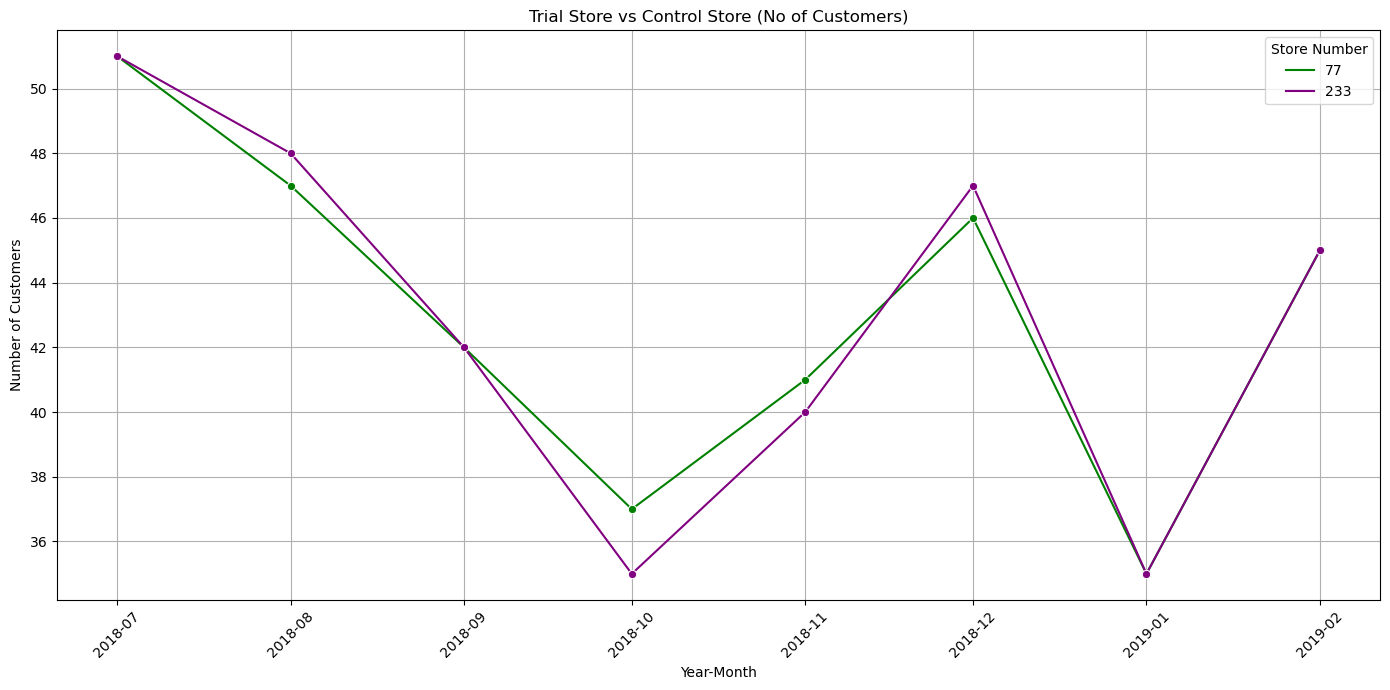

In [118]:
vizNumber(77,233)

Our visualization clearly proves we have made the right choice concerning store 77 as we see that both stores are even more alike in their number of customers per month, we'll now select a corresponding control store for the rest of our trial stores.

In [105]:
#Let's find the control store for trial store 86
print(selectControl(store1,store2,trial1,trial2,86))

155


So as we did before, we want to visualize the trend of total sales to determine accuracy

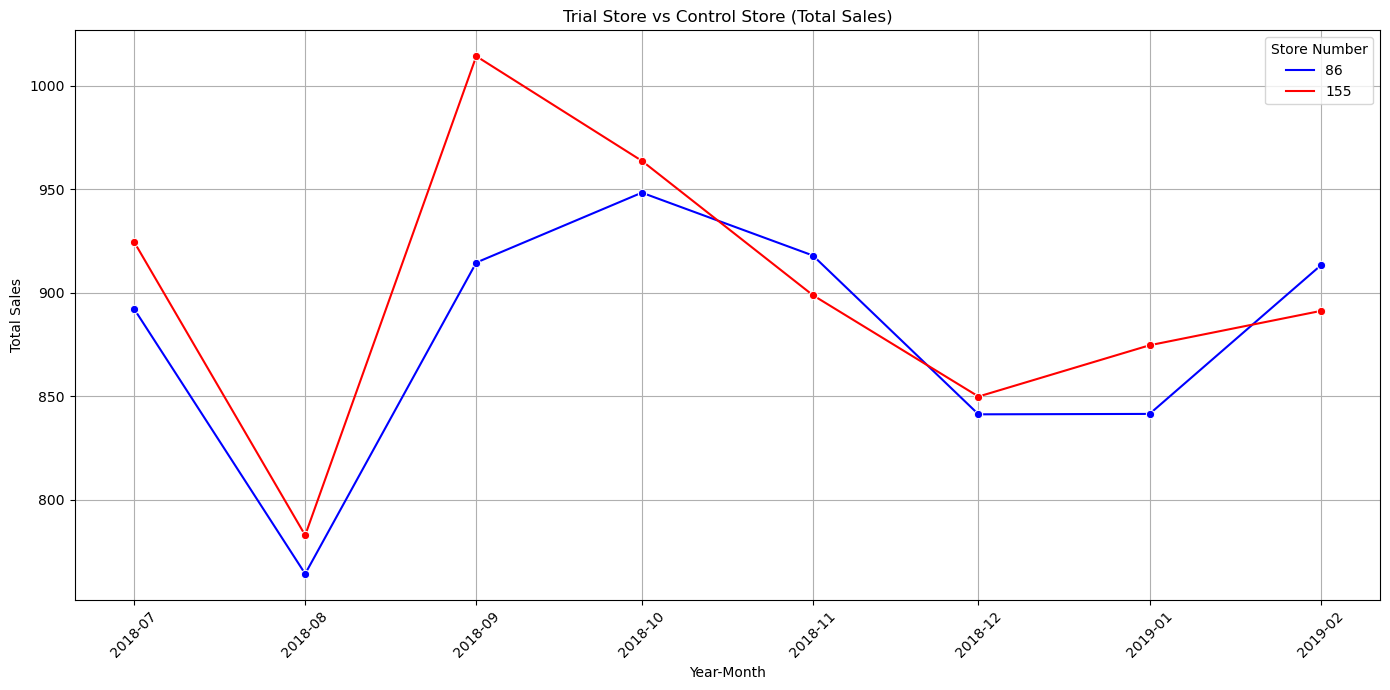

In [120]:
vizTotalSale(86,155)

Once again, we see that the trends of both stores with respect to total sales is quite similar with one store having their sales rise as the other one follows suit and vice versa.

Next we want to check if this is the same occurence with respect to number of customers.


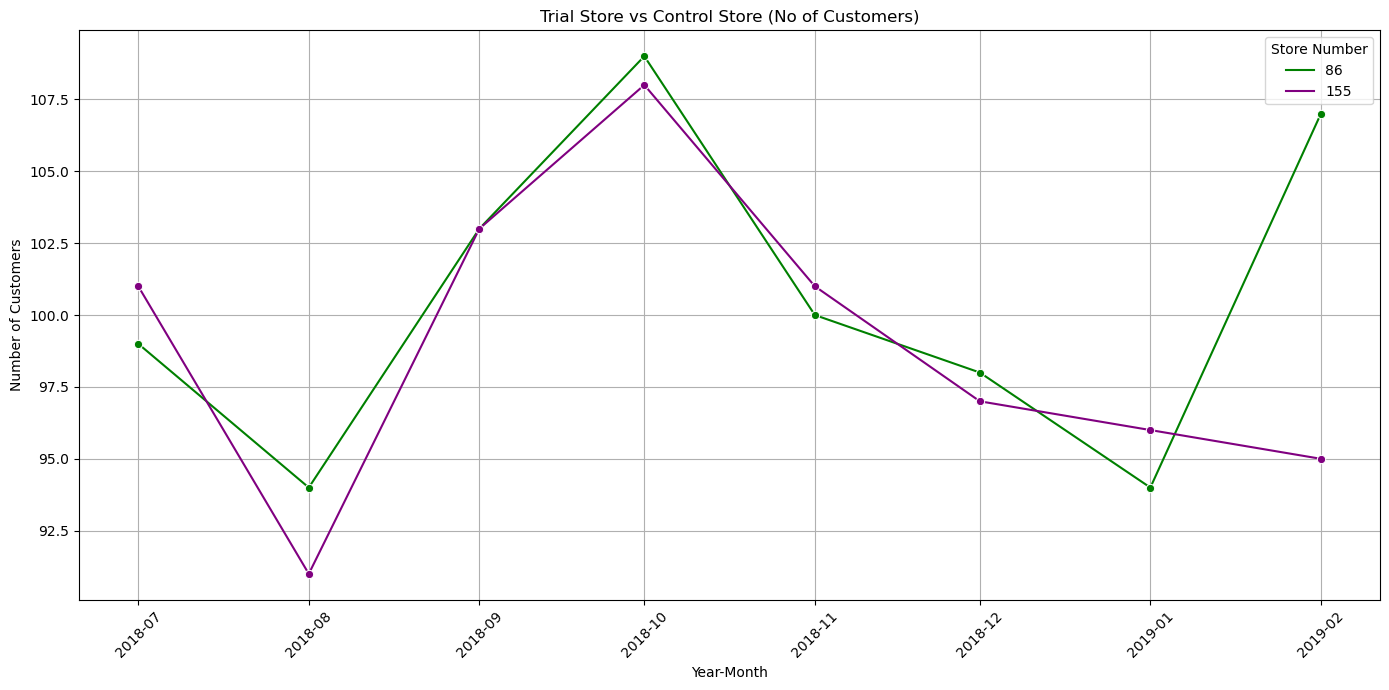

In [121]:
vizNumber(86,155)

Well that proves it, our selection turned out to be the correct one, let's move on to the last trial store

In [109]:
print(selectControl(store1,store2,trial1,trial2,88))

237


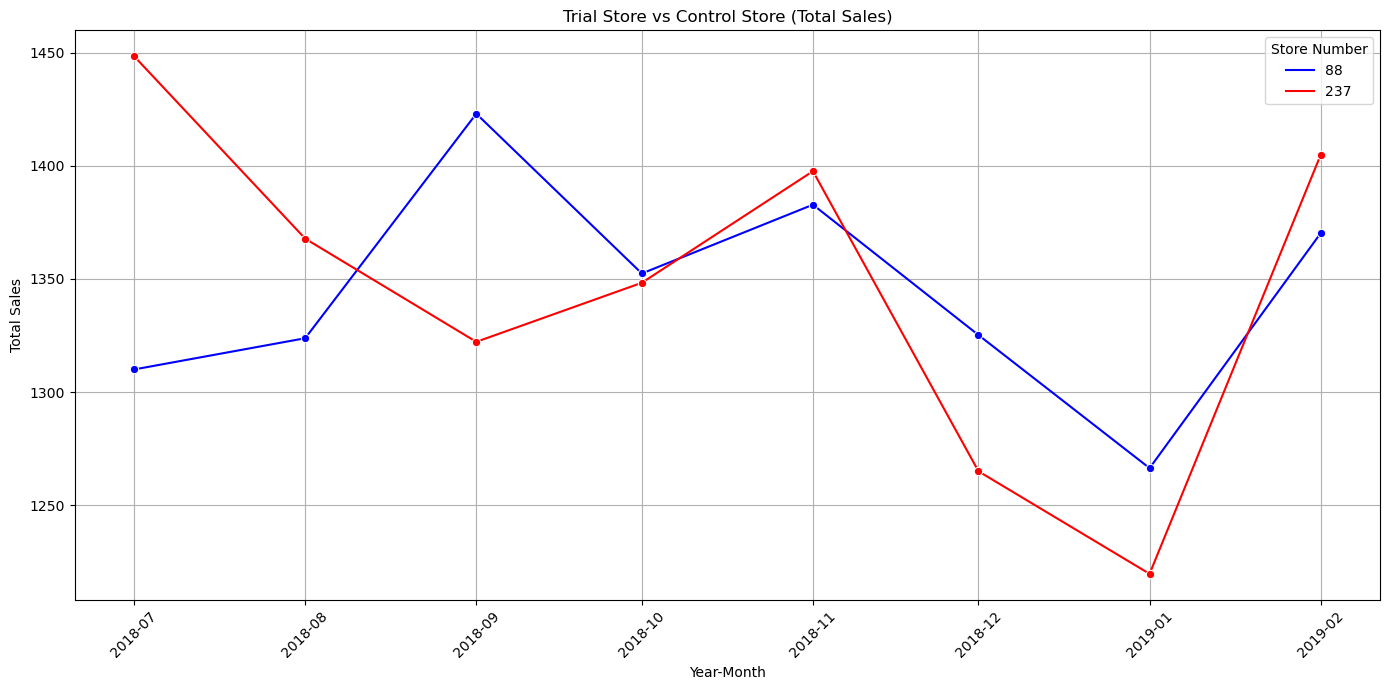

In [122]:
vizTotalSale(88,237)

Stores 88 and 237 show a trend similar to that of other stores, albeit with a few opposing trends in the first three months.

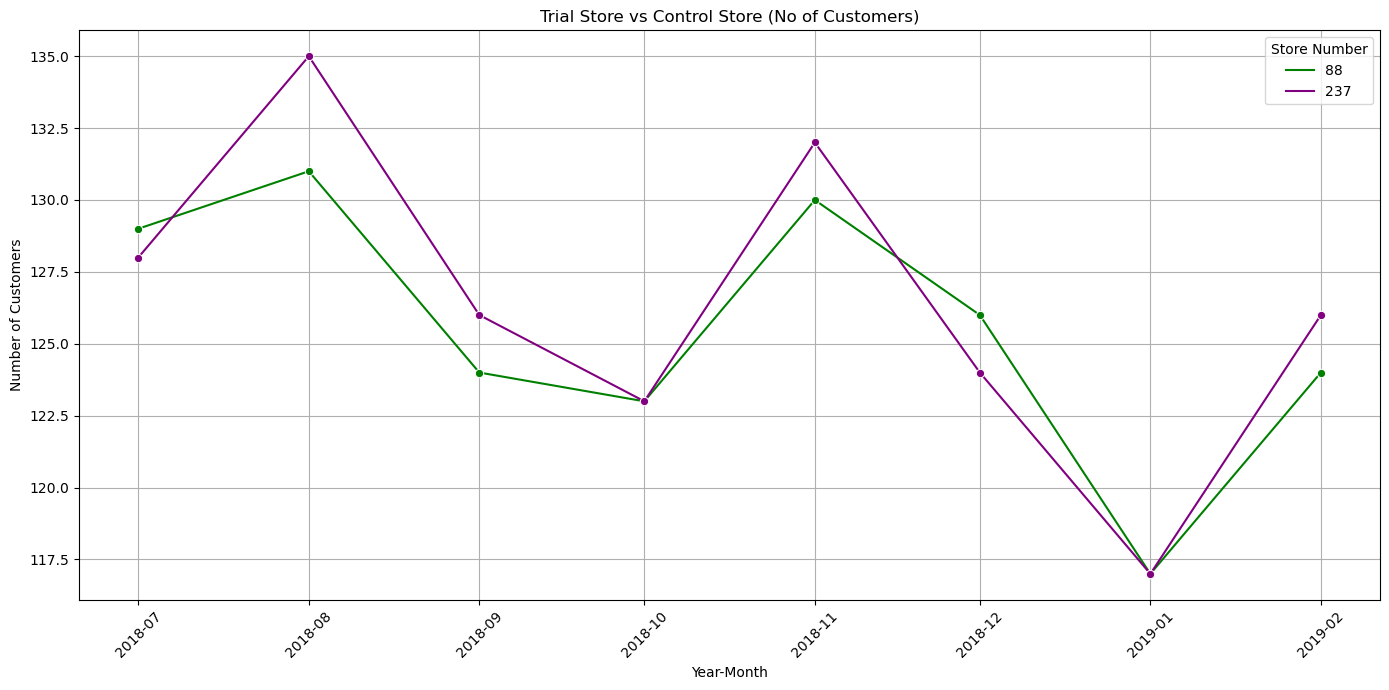

In [123]:
vizNumber(88,237)

Our trial-control store pair show no irregularities in their number of customers reinforcing our decision in store 237 as our control store for 88.

## Trial Assessment

We've identified the control-trial store pairs as stores (77,233), (86,155) and (88,237). The next phase of our project involves assessing the performance of control and trial stores. The evalutaion will be based on metrics determined during the trial period, which occurred from March 2019 to June 2019.

### Objectives

1. **Evaluate Metrics**: Determine and evaluate the metrics used for assessment to ensure they accurately reflect the performance of the trial and control stores during the trial period.  
2. **Assessing Performance**: Evaluating how each pair performed according to our metrics.

### Trial Period

- **Start Date**: March 2019
- **End Date**: June 2019

The metrics we'll be looking at include:
*    Total sales revenue
*    Total number of customers
*    Average Transaction Per Customer

### Creating our Evaluation Functions

In [158]:
def vizSale(num1,num2):

    stores_of_interest = [num1, num2]
    sub = df[(df['STORE_NBR'].isin(stores_of_interest)) & (df.DATE > '2019-03-01')]

    # Aggregate data by Year-Month for each store
    monthly_sales = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('TOT_SALES', 'sum')).reset_index()

    # Convert Year-Month to datetime for plotting
    monthly_sales['YMONTH'] = monthly_sales['YMONTH'].dt.to_timestamp()
    
    palette = {num1: 'blue', num2: 'orange'}

    # Plotting
    plt.figure(figsize=(14, 7))

    # Plot the sales data for each store
    sns.lineplot(data=monthly_sales, x='YMONTH', y='Total', hue='STORE_NBR',marker='o',palette=palette)

    # Customize plot
    plt.title('Trial Store vs Control Store (Total Sales)')
    plt.xlabel('Year-Month')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Store Number')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [172]:
def vizNum(num1,num2):
    
    stores_of_interest = [num1, num2]
    sub = df[(df['STORE_NBR'].isin(stores_of_interest)) & (df.DATE > '2019-03-01')]

    # Aggregate data by Year-Month for each store
    monthly_sales = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('CARD_NBR', 'nunique')).reset_index()

    # Convert Year-Month to datetime for plotting
    monthly_sales['YMONTH'] = monthly_sales['YMONTH'].dt.to_timestamp()
    
    palette = {num1: 'purple', num2: 'yellow'}

    # Plotting
    plt.figure(figsize=(14, 7))

    # Plot the sales data for each store
    sns.lineplot(data=monthly_sales, x='YMONTH', y='Total', hue='STORE_NBR',marker='o',palette=palette)

    # Customize plot
    plt.title('Trial Store vs Control Store (No of Customers)')
    plt.xlabel('Year-Month')
    plt.ylabel('Number of Customers')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend(title='Store Number')
    plt.tight_layout()

    # Show the plot
    plt.show()

In [161]:
def Sales(num1,num2):
    sub = df[(df['STORE_NBR'].isin([num1,num2])) & (df.DATE > '2019-03-01')]
    monthly_sales = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('TOT_SALES', 'sum')).reset_index()
    print(monthly_sales)
    
def Num(num1,num2):
    sub = df[(df['STORE_NBR'].isin([num1,num2])) & (df.DATE > '2019-03-01')]
    month = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('CARD_NBR', 'nunique')).reset_index()
    print(month)

### Store 77 vs 233

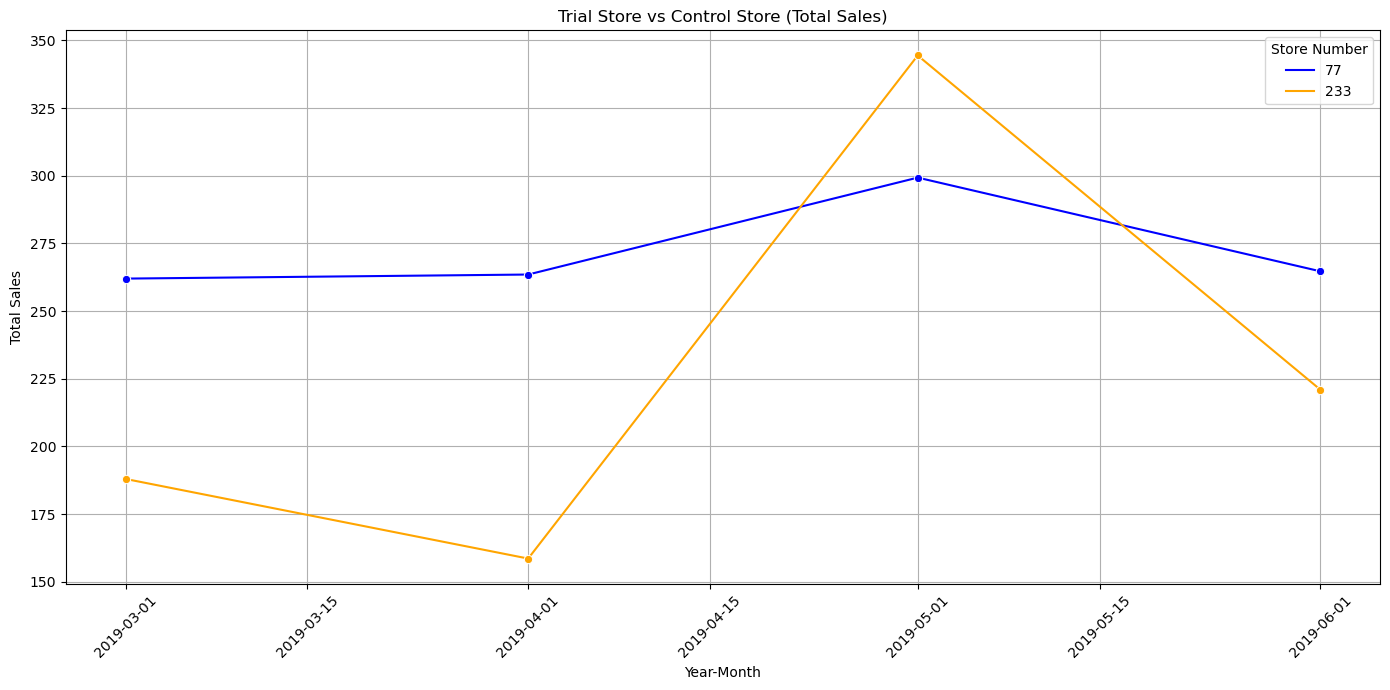

In [164]:
# Trial Assessment for Store 77 and 233 (Total Sales)
vizSale(77,233)

Notice the trend here, our trial store seems to have a higher total sale in the first trial month then our control store slightly overtakes in april but store 77 gains the upper hand once more, it shows our trial store doing better in terms of total sales in 3 out of the 4 trial months, i've always particularly preferred numbers so a simple table showing the total sales of each month should be more convincing than our chart.

In [170]:
Sales(77,233)

   STORE_NBR   YMONTH  Total
0         77  2019-03  262.0
1         77  2019-04  263.5
2         77  2019-05  299.3
3         77  2019-06  264.7
4        233  2019-03  188.0
5        233  2019-04  158.6
6        233  2019-05  344.4
7        233  2019-06  221.0


As seen with our chart, our trial store does better in terms of total sales in 3 out of 4 trial months with the only exception in May 2019.

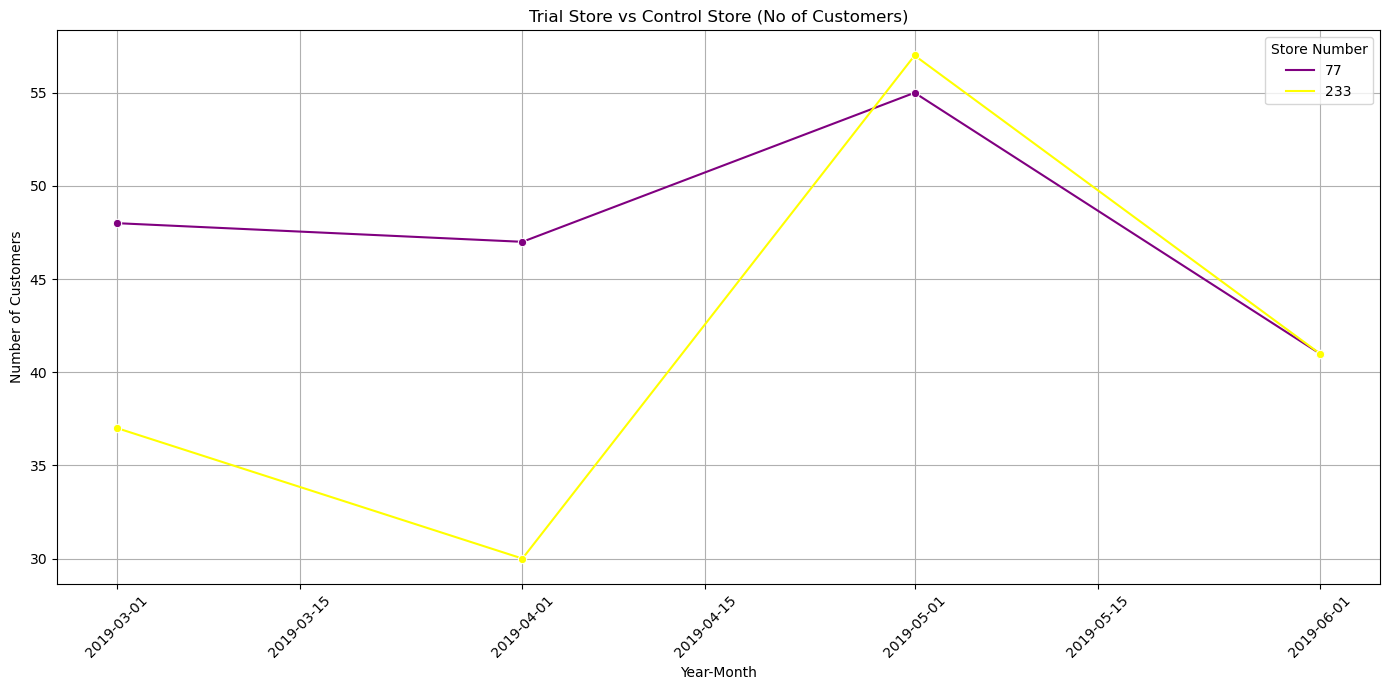

In [173]:
# Trial Assessment for Store 77 and 233 (Number of Customers)
vizNum(77,233)

No surprise here that our findings are similar to that of total sale, let's check it out in a table.

In [174]:
Num(77,233)

   STORE_NBR   YMONTH  Total
0         77  2019-03     48
1         77  2019-04     47
2         77  2019-05     55
3         77  2019-06     41
4        233  2019-03     37
5        233  2019-04     30
6        233  2019-05     57
7        233  2019-06     41


The difference between number of customers for each month considering both stores is not that high in comparison to total sales which might suggest an increase in the number of transactions of customer and of course with the exception of May. Overall the new layout shows a positive result, let's move on to our next store.

### Trial Store 86 vs 155

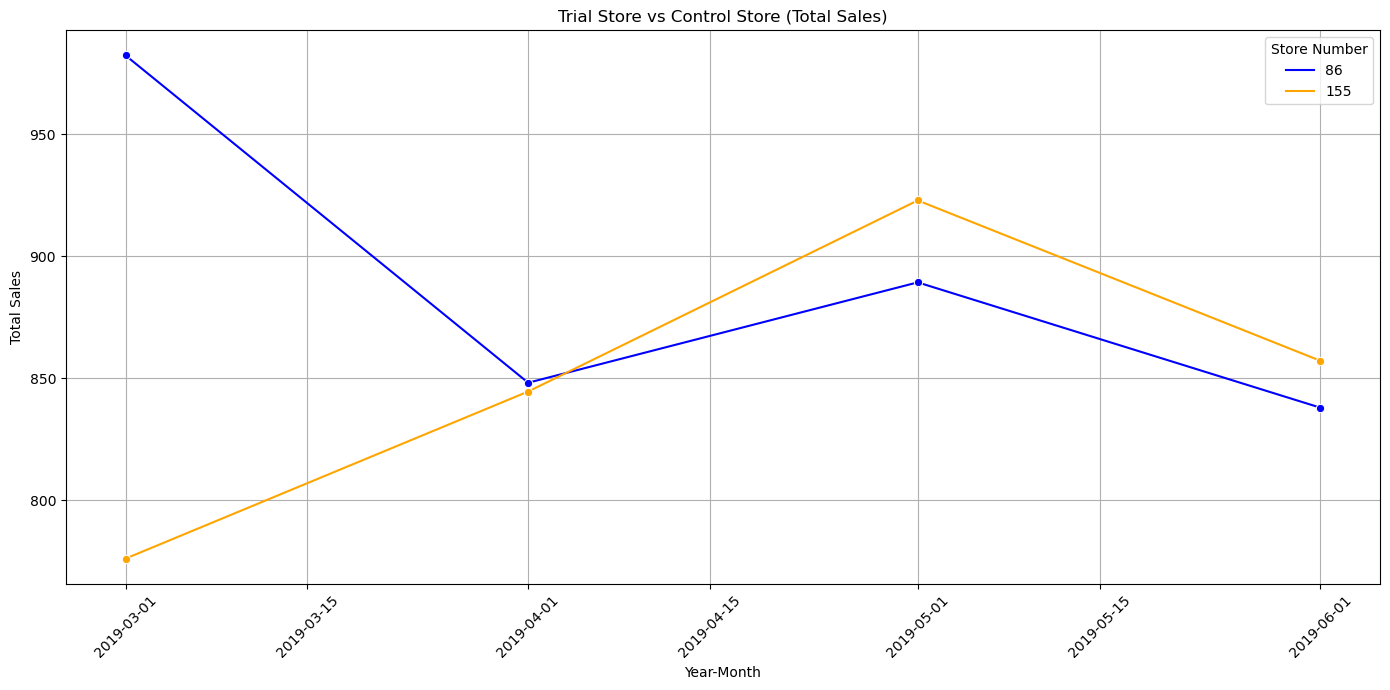

In [175]:
# Trial Assessment for Store 86 and 155 (Total Sales)
vizSale(86,155)

Well this is an interesting one, it seems whatever layout was conducted in store 86 only showed a significantly positive result in the first month then store 155 does significantly better in the following months when compared to its trial store, there doesn't seem to be a significant difference when considering all 4 months to conclude the layout had a positive impact, as before we'll reaffirm our beliefs by viewing our data using numbers.

In [177]:
Sales(86,155)

   STORE_NBR   YMONTH   Total
0         86  2019-03  982.20
1         86  2019-04  848.20
2         86  2019-05  889.30
3         86  2019-06  838.00
4        155  2019-03  776.20
5        155  2019-04  844.60
6        155  2019-05  922.85
7        155  2019-06  857.20


Let's check out our stores with respect to number of customers

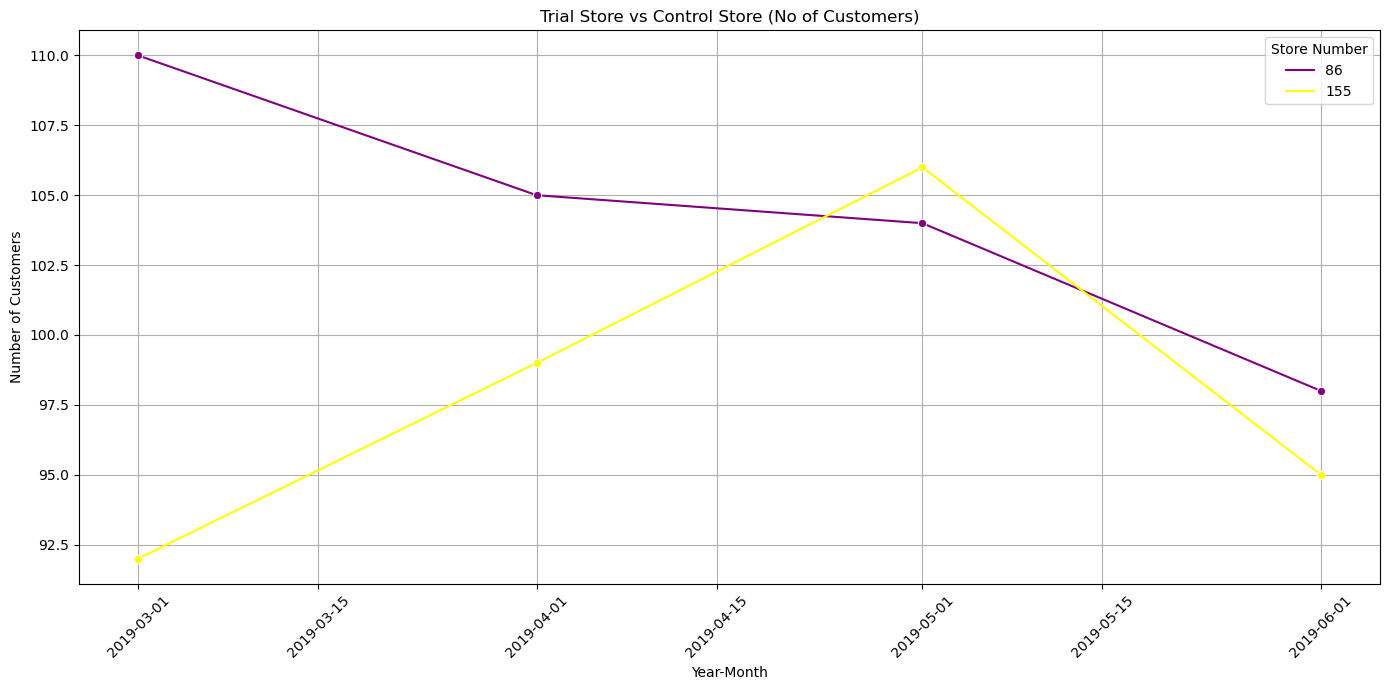

In [179]:
vizNum(86,155)

In [180]:
Num(86,155)

   STORE_NBR   YMONTH  Total
0         86  2019-03    110
1         86  2019-04    105
2         86  2019-05    104
3         86  2019-06     98
4        155  2019-03     92
5        155  2019-04     99
6        155  2019-05    106
7        155  2019-06     95


We see that the trend of the number of customers in comparison with total sales is not quite similar, I'd suggest this is due to higher number of transactions made per customer but let's test that out using numbers.

In [193]:
sub = df[(df['STORE_NBR'].isin([86,155])) & (df.DATE > '2019-03-01')]
month = sub.groupby(['STORE_NBR', 'YMONTH','CARD_NBR']).agg(Total=('TXN_ID', 'nunique')).reset_index()
month[['Total']][month.STORE_NBR == 86].describe()

,Total
count,417.000000
mean,1.213429
std,0.465143
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


In [192]:
month[['Total']][month.STORE_NBR == 155].describe()

,Total
count,392.000000
mean,1.250000
std,0.483751
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000


  Let me explain what i've just done here, we grouped our data according to customer number for each store to find the total number of transaction for every customer per month in order to view some of its statistical features for store 86 and 155. 
  
  What the standard deviation tells us in both store is that there is very little difference between the mean and each individual value meaning they're not very spread out in terms of range and the 25-75 percentile tells us most of our number of transacions is 1. Let's check out our data altogether.

In [184]:
m = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('TOT_SALES', 'sum')).reset_index()
n = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('CARD_NBR', 'nunique')).reset_index()
test = month.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('Total','mean')).reset_index()
m['CUSTOMER']=n['Total']
m['AVG'] = test['Total']
m

,STORE_NBR,YMONTH,Total,CUSTOMER,AVG
0,86,2019-03,982.20,110,1.218182
1,86,2019-04,848.20,105,1.200000
2,86,2019-05,889.30,104,1.230769
3,86,2019-06,838.00,98,1.204082
4,155,2019-03,776.20,92,1.228261
5,155,2019-04,844.60,99,1.212121
6,155,2019-05,922.85,106,1.283019
7,155,2019-06,857.20,95,1.273684


In the first month of the trial, Store 86 outperforms Store 155. However, in the subsequent month, Store 86 experiences a reduction in both the number of customers and the average transaction value, while Store 155 shows improvements in these metrics. This shift allows Store 155 to close the gap significantly.

By the third month, despite the number of customers at Store 86 continuing to decline, Store 155's customer base grows. The difference in customer number between the two stores remains minor, but Store 155’s higher average transaction value results in greater total sales.

In the final month, although Store 86 has a higher customer base than its counterpart, it falls short of Store 155 in total sales. This is attributed to Store 86's lower average transaction value compared to Store 155, which ultimately impacts overall performance.

* Perhaps Further tests should be carried out with a longer duration to be able determine if there's a significant impact but with what we have now, we can conclude the layout conducted on store 86 wasn't very effective.

### Trial Store 88 vs 237

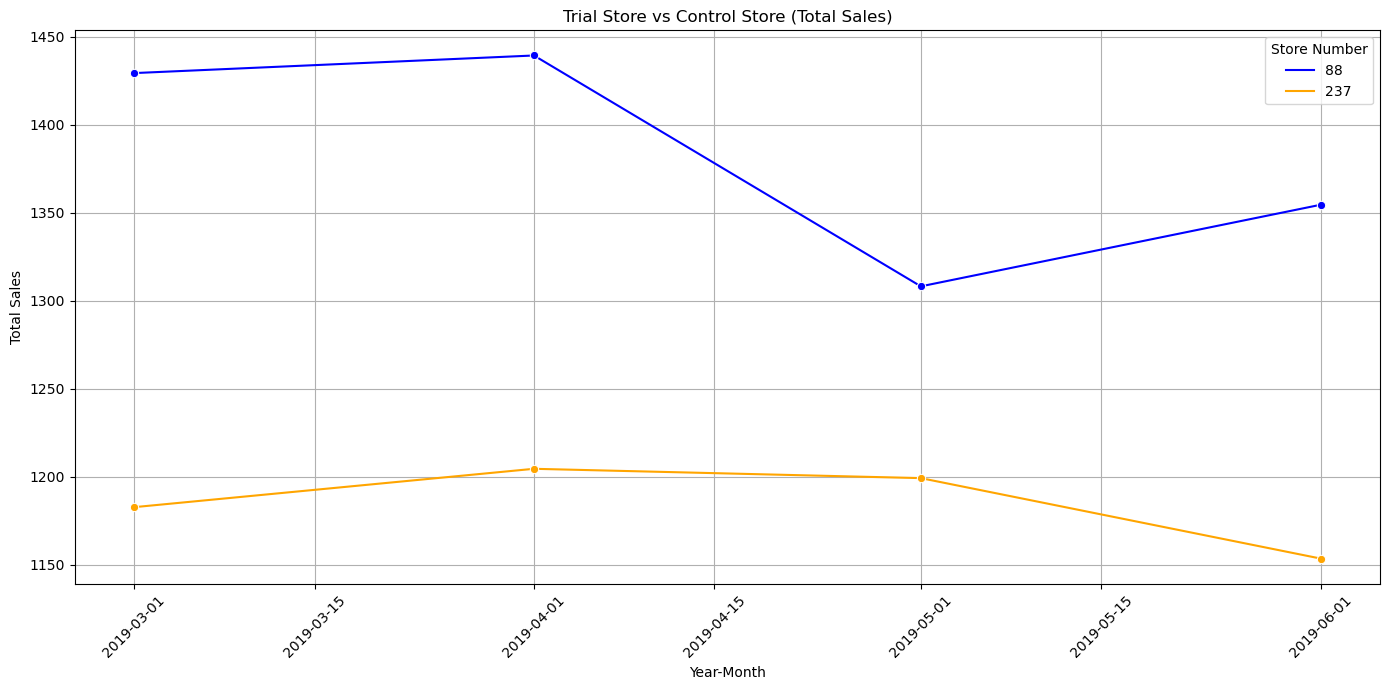

In [194]:
# Trial Assessment for Store 88 and 237 (Total Sales)
vizSale(88,237)

In [195]:
Sales(88,237)

   STORE_NBR   YMONTH    Total
0         88  2019-03  1429.40
1         88  2019-04  1439.40
2         88  2019-05  1308.25
3         88  2019-06  1354.60
4        237  2019-03  1182.80
5        237  2019-04  1204.60
6        237  2019-05  1199.30
7        237  2019-06  1153.60


The results of this comparison appear to offset any previous disappointments. Our trial store outperforms its control store significantly, with the performance gap being the largest among all pairs compared. While it may be premature to draw a conclusion so early on in our assessment, it seems that the layout implementation for Store 88 was executed flawlessly.

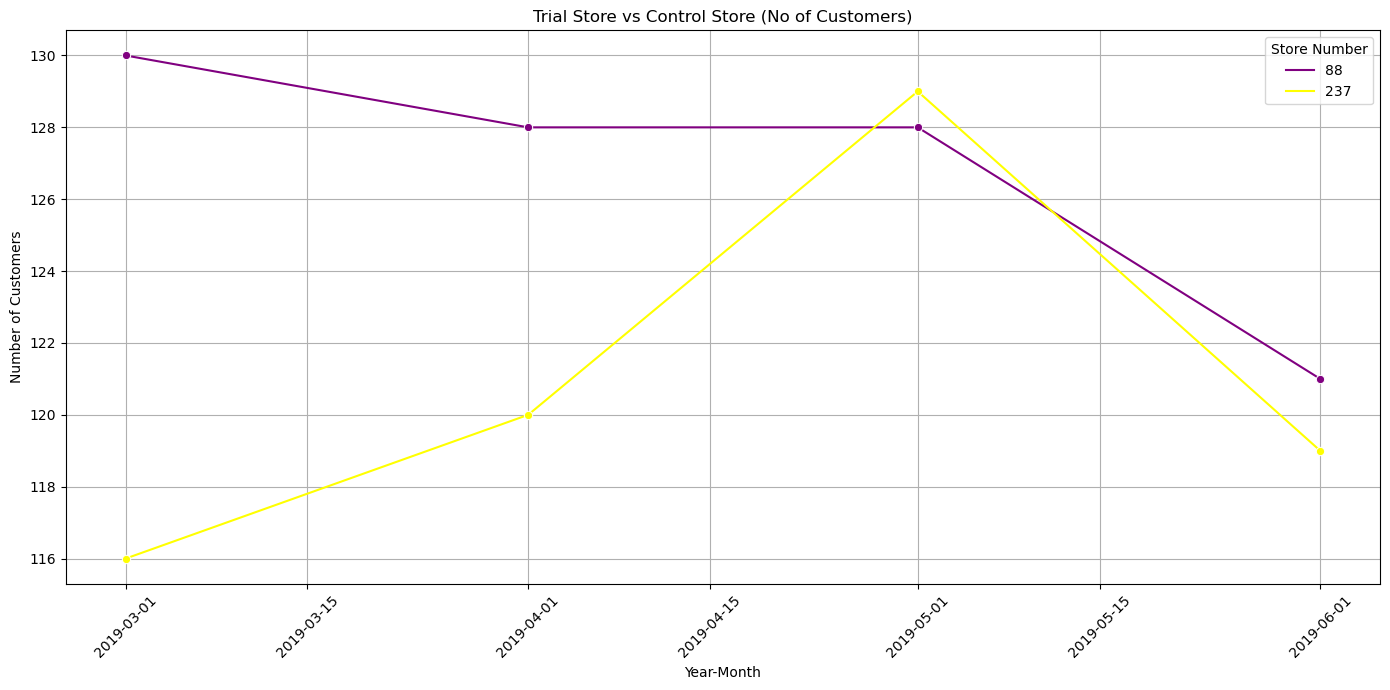

In [196]:
vizNum(88,237)

In [197]:
Num(88,237)

   STORE_NBR   YMONTH  Total
0         88  2019-03    130
1         88  2019-04    128
2         88  2019-05    128
3         88  2019-06    121
4        237  2019-03    116
5        237  2019-04    120
6        237  2019-05    129
7        237  2019-06    119


* Now what do we have here, it seems to me there's something in the air in May that always affects our control stores.  
  
*  Store 88 consistently outperforms its control store in Total Sales across all four months. However, Store 237 has a larger customer base compared to Store 88 in the month of May, though this does not seem to impact Total Sales significantly, potentially due to differences in average transaction values.  
  
* I recommend conducting a more detailed investigation and data collection for the months of April and May to better understand the underlying conditions influencing our data.

As we did before, we'll find the average transaction per month for each store to understand why a higher number of customers did not boost sales.

In [198]:
sub = df[(df['STORE_NBR'].isin([88,237])) & (df.DATE > '2019-03-01')]
month = sub.groupby(['STORE_NBR', 'YMONTH','CARD_NBR']).agg(Total=('TXN_ID', 'nunique')).reset_index()

a = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('TOT_SALES', 'sum')).reset_index()
b = sub.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('CARD_NBR', 'nunique')).reset_index()
test = month.groupby(['STORE_NBR', 'YMONTH']).agg(Total=('Total','mean')).reset_index()

a['CUSTOMER']=b['Total']
a['AVG'] = test['Total']
a

,STORE_NBR,YMONTH,Total,CUSTOMER,AVG
0,88,2019-03,1429.40,130,1.253846
1,88,2019-04,1439.40,128,1.265625
2,88,2019-05,1308.25,128,1.203125
3,88,2019-06,1354.60,121,1.223140
4,237,2019-03,1182.80,116,1.129310
5,237,2019-04,1204.60,120,1.125000
6,237,2019-05,1199.30,129,1.155039
7,237,2019-06,1153.60,119,1.100840


Let's fixate on May, we observe that despite Store 88 and Store 237 having similar customer numbers, Store 88 surpasses Store 237 in Total Sales. This performance difference is attributable to Store 88’s significantly higher average transaction value.

## Insights & Conclusion


**Summary of Insights**

Our trial-store assessment indicates that Store 77 outperforms its control store in 3 out of 4 months, demonstrating superior Total Sales. Store 88 excels even further, outperforming its control store in all 4 months. Unfortunately, Store 86 does not follow this positive trend, which may be attributed to improper conduct of the trial layout or other underlying factors.

**More Key Observations Include:**

- In May, metrics for control stores show significant growth, occasionally surpassing those of the trial stores.
- The average transaction value per customer has a notable impact on Total Sales, often compensating for a lower number of customers.

**Recommendations:**

- **Investigate Seasonal Effects:** Conduct a thorough analysis of April and May to identify factors affecting store performance during these months.
- **Enhance Data Collection:** Despite the success of the trial layout in 2 out of 3 stores, for the sale of being thorough, I recommend further rigorous research and data collection to fully understand the impact of the new layout on sales drivers and customer behavior.  
  
**Conclusion:**  
The trial-store assessment highlights that 2 out of 3 show significant improvements in Total Sales compared to their control stores, with Store 88 leading in all months. Despite some inconsistencies with Store 86, the overall positive impact of the trial layout suggests a successful strategy and the layout may be rolled out to all other stores or you may choose to perform further experimentation.  
